# <h1> <center> 🚀**Spaceship Titanic**🚀 </center> </h1>
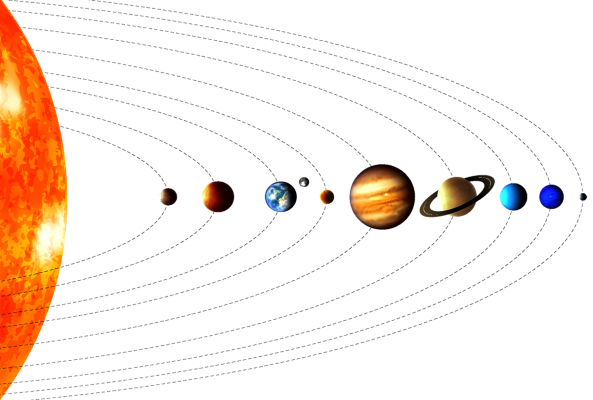


<center><img src =
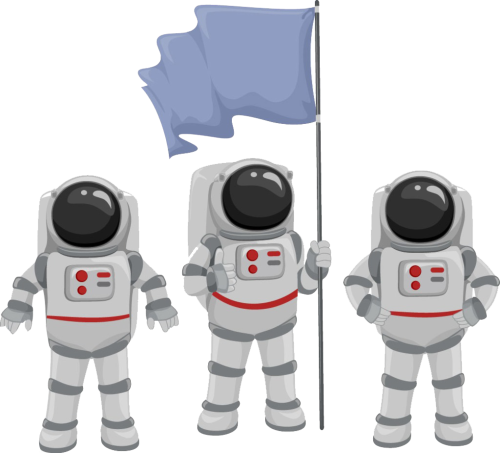


<a id="introduction"></a>
# 1. Introduction

<a id="objective"></a>
## 1.1. Objective

This Spaceship Titanic dataset challenge is a binary classification problem. Predicting if a passenger was sent to another dimension during the Spaceship Titanic's crash with a spacetime anomaly is the objective. Submissions are assessed on Classification Accuracy.

<a id="environment"></a>
## 1.2. Setting up the Environment

In [ ]:
from IPython.display import clear_output
#!pip3 install -U lazypredict
#!pip3 install -U pandas #Upgrading pandas
#!pip install eli5
!pip install catboost
!pip install pycaret
#!pip install termcolor
!pip install xgboost
! pip install lightgbm
!pip install optuna
!pip install shap
!pip install scikit-learn==1.0
#!pip install dython
#! pip install lazypredict
#! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
clear_output()

# Check the offical Documentation of LazyPredict here : https://lazypredict.readthedocs.io

In [ ]:
 import os
 os._exit(00) # To restart environment

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/pipeline-spaceship-titanic

/content/drive/MyDrive/pipeline-spaceship-titanic


In [ ]:
import pandas as pd
pd.options.display.max_rows = 100
pd.options.display.max_seq_items = 100


#import pandas_profiling
#from pandas_profiling import ProfileReport 

import numpy as np
np.random.seed(42)

import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina' # To render higher resolution images
import matplotlib.cm as cm
plt.style.use('ggplot')

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go


params = {
    'text.color': (0.25, 0.25, 0.25),
    'figure.figsize': [18, 6],
   }
plt.rcParams.update(params)


plt.rc('font', size=15)
plt.rc('axes', titlesize=18)  
plt.rc('xtick', labelsize=10)  
plt.rc('ytick', labelsize=10)


TITLE_SIZE = 18
TITLE_PAD = 20

DEFAULT_COLORS = plt.rcParams['axes.prop_cycle'].by_key()['color']

CB91_Blue = '#2CBDFE'
CB91_Green = '#47DBCD'
CB91_Pink = '#F3A0F2'
CB91_Purple = '#9D2EC5'
CB91_Violet = '#661D98'
CB91_Amber = '#F5B14C'

color_list = [CB91_Blue, CB91_Pink, CB91_Green, CB91_Amber,
              CB91_Purple, CB91_Violet]
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=color_list)


import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots


sns.set(style = 'darkgrid',font_scale = 1.2)
sns.set_palette('Set2')
# seaborn
sns.set(font_scale = 1.2)
sns.set_style("whitegrid")
sns.set_palette("Set2", 8, .75)


PALETTE=['lightcoral', 'lightskyblue', 'gold', 'sandybrown', 'navajowhite',
        'khaki', 'lightslategrey', 'turquoise', 'rosybrown', 'thistle', 'pink']
sns.set_palette(PALETTE)
BACKCOLOR = '#f6f5f5'


from IPython.core.display import HTML


import itertools
from termcolor import colored
import time

import warnings
warnings.filterwarnings('ignore')


from sklearn.linear_model import LinearRegression, LogisticRegression,SGDClassifier,RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
import lightgbm as lgb
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

from sklearn.naive_bayes import GaussianNB


from pandas.api.types import is_numeric_dtype, is_categorical_dtype
from scipy.stats import chi2_contingency

from sklearn import set_config
set_config(display="diagram")
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV,RandomizedSearchCV, StratifiedKFold

from sklearn.preprocessing import (StandardScaler, OneHotEncoder, OrdinalEncoder,MinMaxScaler, 
                                  LabelEncoder,FunctionTransformer,KBinsDiscretizer,QuantileTransformer, RobustScaler, PowerTransformer)

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer,make_column_selector

from sklearn.metrics import (accuracy_score, confusion_matrix, recall_score, precision_score, f1_score,
                              roc_auc_score,plot_confusion_matrix,plot_roc_curve,roc_curve,ConfusionMatrixDisplay, RocCurveDisplay,auc,
                             classification_report) 

from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.dummy import DummyClassifier
from sklearn.inspection import permutation_importance

from tqdm.notebook import tqdm # To print progress bar
from tabulate import tabulate

# for interactive tables 
%load_ext google.colab.data_table

# to disable interactive tables
#%unload_ext google.colab.data_table 

## Global variables  <a class="anchor" id="variables"></a>

In [ ]:
TRAIN_PATH = 'data/train.csv'
TEST_PATH = 'data/test.csv'

RANDOM_STATE = 2022
SAMPLE_SIZE = 1.0
TEST_SIZE = 0.3
SIGNICIFANT_LEVEL = 0.05

INDEX = 'PassengerId'
TARGET = 'Transported'
NUM_FOLDS = 3
N_CLUSTERS = 5

SUBMISSION_FILE = 'submissions/submission12.csv'

## Helper Functions  <a class="anchor" id="helper_functions"></a>

In [ ]:
def read_data(train_path=TRAIN_PATH, test_path=TEST_PATH):
    df_train = pd.read_csv(TRAIN_PATH, index_col=INDEX)
    df_test = pd.read_csv(TEST_PATH, index_col=INDEX)
    
    return df_train, df_test

In [ ]:
def bar_percent(ax, N, size=10):
    """
    """
    for p in ax.patches:
        x, height, width = p.get_x(), p.get_height(), p.get_width()
        ax.text(
            x + width / 2, 
            height + 85, 
            f'{height / N * 100:2.1f}%', 
            va='center', 
            ha='center', size=size)

In [ ]:
def multi_table(table_list):
    return HTML(
        f"<table><tr> {''.join(['<td>' + table._repr_html_() + '</td>' for table in table_list])} </tr></table>")

In [ ]:
def cat_dist(data, var, hue, msg_show=True):
    total_cnt = data[var].count()
    f, ax = plt.subplots(1, 2, figsize=(25, 8))
    hues = [None, hue]
    titles = [f"{var}'s distribution", f"{var}'s distribution by {hue}"]

    for i in range(2):
        sns.countplot(data[var], edgecolor='black', hue=hues[i], linewidth=1, ax=ax[i], data=data)
        ax[i].set_xlabel(var, weight='bold', size=13)
        ax[i].set_ylabel('Count', weight='bold', size=13)
        ax[i].set_facecolor(BACKCOLOR)
        ax[i].spines[['top', 'right']].set_visible(False)
        ax[i].set_title(titles[i], size=15, weight='bold')
        for patch in ax[i].patches:
            x, height, width = patch.get_x(), patch.get_height(), patch.get_width()
            if msg_show:
                ax[i].text(x + width / 2, height + 3, f'{height} \n({height / total_cnt * 100:2.2f}%)', va='center', ha='center', size=12, bbox={'facecolor': 'white', 'boxstyle': 'round'})
    plt.show()

In [ ]:
def continuous_dist(data, x, y):
    f, ax = plt.subplots(1, 4, figsize=(35, 10))
    sns.histplot(data=train, x=y, hue=x, ax=ax[0], element='step')
    sns.violinplot(x=data[x], y=data[y], ax=ax[1], edgecolor='black', linewidth=1)
    sns.boxplot(x=data[x], y=data[y], ax=ax[2])
    sns.stripplot(x=data[x], y=data[y], ax=ax[3])
    for i in range(4):
        ax[i].spines[['top','right']].set_visible(False)
        ax[i].set_xlabel(x, weight='bold', size=20)
        ax[i].set_ylabel(y, weight='bold', size=20)
        ax[i].set_facecolor(BACKCOLOR)
    f.suptitle(f"{y}'s distribution by {x}", weight='bold', size=25)
    plt.show()

<a id="1.4"></a>
## Column Descriptions

|Variable|Definition|
|------|---|
|PassengerId|A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.||
|HomePlanet|The planet the passenger departed from, typically their planet of permanent residence.|
|CryoSleep|Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.HomePlanet||
|Cabin|The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.||
|Destination|The planet the passenger will be debarking to.||
|Age|The age of the passenger.||
|VIP|Whether the passenger has paid for special VIP service during the voyage.||
|RoomService, FoodCourt, ShoppingMall, Spa, VRDeck|Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.||
|Name|The first and last names of the passenger.||
|Transported|Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.||

<a id="2 "></a>
#  2. Data Exploration

<a id="2.1"></a>
## Data Loading

In [ ]:
df_train, df_test = read_data()

In [ ]:
print('df_train set shape:', df_train.shape)
print('df_test set shape:', df_test.shape)
df_train.head()


df_train set shape: (8693, 13)
df_test set shape: (4277, 12)


HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
PassengerId                                                         
0001_01         Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
0002_01          Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
0003_01         Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
0003_02         Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
0004_01          Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

             RoomService  FoodCourt  ShoppingMall     Spa  VRDeck  \
PassengerId                                                         
0001_01              0.0        0.0           0.0     0.0     0.0   
0002_01            109.0        9.0          25.0   549.0    44.0   
0003_01             43.0     3576.0           0.0  6715.0    49.0   
0003_02              0.0     1283.0         371.0  3329.0   193.0   
0004_01            303.0       70.0         151.0   565.0     2.0   

                          Name  Transported  
PassengerId                                  
0001_01        Maham Ofracculy        False  
0002_01           Juanna Vines         True  
0003_01          Altark Susent        False  
0003_02           Solam Susent        False  
0004_01      Willy Santantines         True

In [ ]:
#profile = ProfileReport(df, title="data set", html={'style' : {'full_width':True}})
#profile.to_file(output_file="profile_report_combined_data.html") 

## Types of columns

In [ ]:
df_train.dtypes

HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

## Duplicates

In [ ]:

all_data = pd.concat([df_train, df_test], axis=0)
print(f'Duplicates in df_train set: {df_train.duplicated().sum()}, ({np.round(100*df_train.duplicated().sum()/len(df_train),1)}%)')
print(f'Duplicates in df_test set: {df_test.duplicated().sum()}, ({np.round(100*df_test.duplicated().sum()/len(df_test),1)}%)')
print(f"Duplicates in combined data set: {all_data.duplicated().sum()},({np.round(100*all_data.duplicated().sum()/len(all_data),1)}%)")


Duplicates in df_train set: 0, (0.0%)
Duplicates in df_test set: 0, (0.0%)
Duplicates in combined data set: 0,(0.0%)


## Number of items per columns

In [ ]:
multi_table([pd.DataFrame(all_data[i].value_counts()) for i in all_data.columns if i != 'Age'])

## Missing Values

In [ ]:

print(f"The combined data set contains a total of {all_data.shape[0]:,.0f} samples with {all_data.shape[1]} features.")
print(f"There are {all_data.select_dtypes('number').shape[1]} numerical and {all_data.select_dtypes('object').shape[1]} categorical features")

The combined data set contains a total of 12,970 samples with 13 features.
There are 6 numerical and 7 categorical features


In [ ]:
missing = [(col, all_data[col].isna().mean()*100) for col in all_data.drop("Transported", axis=1)]
missing_df_train = [(col, df_train[col].isna().mean()*100) for col in df_train]
missing_df_test = [(col, df_test[col].isna().mean()*100) for col in df_test]

missing = pd.DataFrame(missing, columns=["column_name", "full_data"])
missing_df_train = pd.DataFrame(missing_df_train, columns=["column_name", "df_train_data"])
missing_df_test = pd.DataFrame(missing_df_test, columns=["column_name", "df_test_data"])
missing = pd.concat([missing, missing_df_train.df_train_data, missing_df_test.df_test_data], axis=1)

missing = missing[missing["full_data"] > 0].sort_values("full_data", ascending=False)
print("Percentage of missing values")
print(tabulate(missing, floatfmt=".1f", showindex=False, headers="keys"))

Percentage of missing values
column_name      full_data    df_train_data    df_test_data
-------------  -----------  ---------------  --------------
CryoSleep              2.4              2.5             2.2
ShoppingMall           2.4              2.4             2.3
Cabin                  2.3              2.3             2.3
VIP                    2.3              2.3             2.2
Name                   2.3              2.3             2.2
FoodCourt              2.2              2.1             2.5
HomePlanet             2.2              2.3             2.0
Spa                    2.2              2.1             2.4
Destination            2.1              2.1             2.2
Age                    2.1              2.1             2.1
VRDeck                 2.1              2.2             1.9
RoomService            2.0              2.1             1.9


💡 **Insight**
*  Almost every feature has missing data. How we deal with this is important.
*  We will first clean the columns, explore the data to see how we impute the missing variables.

## Correlation

In [ ]:
INDEX = 'PassengerId'
TARGET = 'Transported'
FEATURES = [col for col in df_train.columns if col != TARGET]
text_cols = ['Cabin','Name','PassengerId']
categ_cols =  [col for col in FEATURES if df_train[col].nunique() < 25 and col not in text_cols]
numerical_cols = [col for col in FEATURES if df_train[col].nunique() >= 25 and col not in text_cols]

expense_cols = ["FoodCourt", "ShoppingMall", "RoomService", "Spa", "VRDeck"]

#features = [col for col in df_train.columns if col not in ['PassengerId','Transported']]

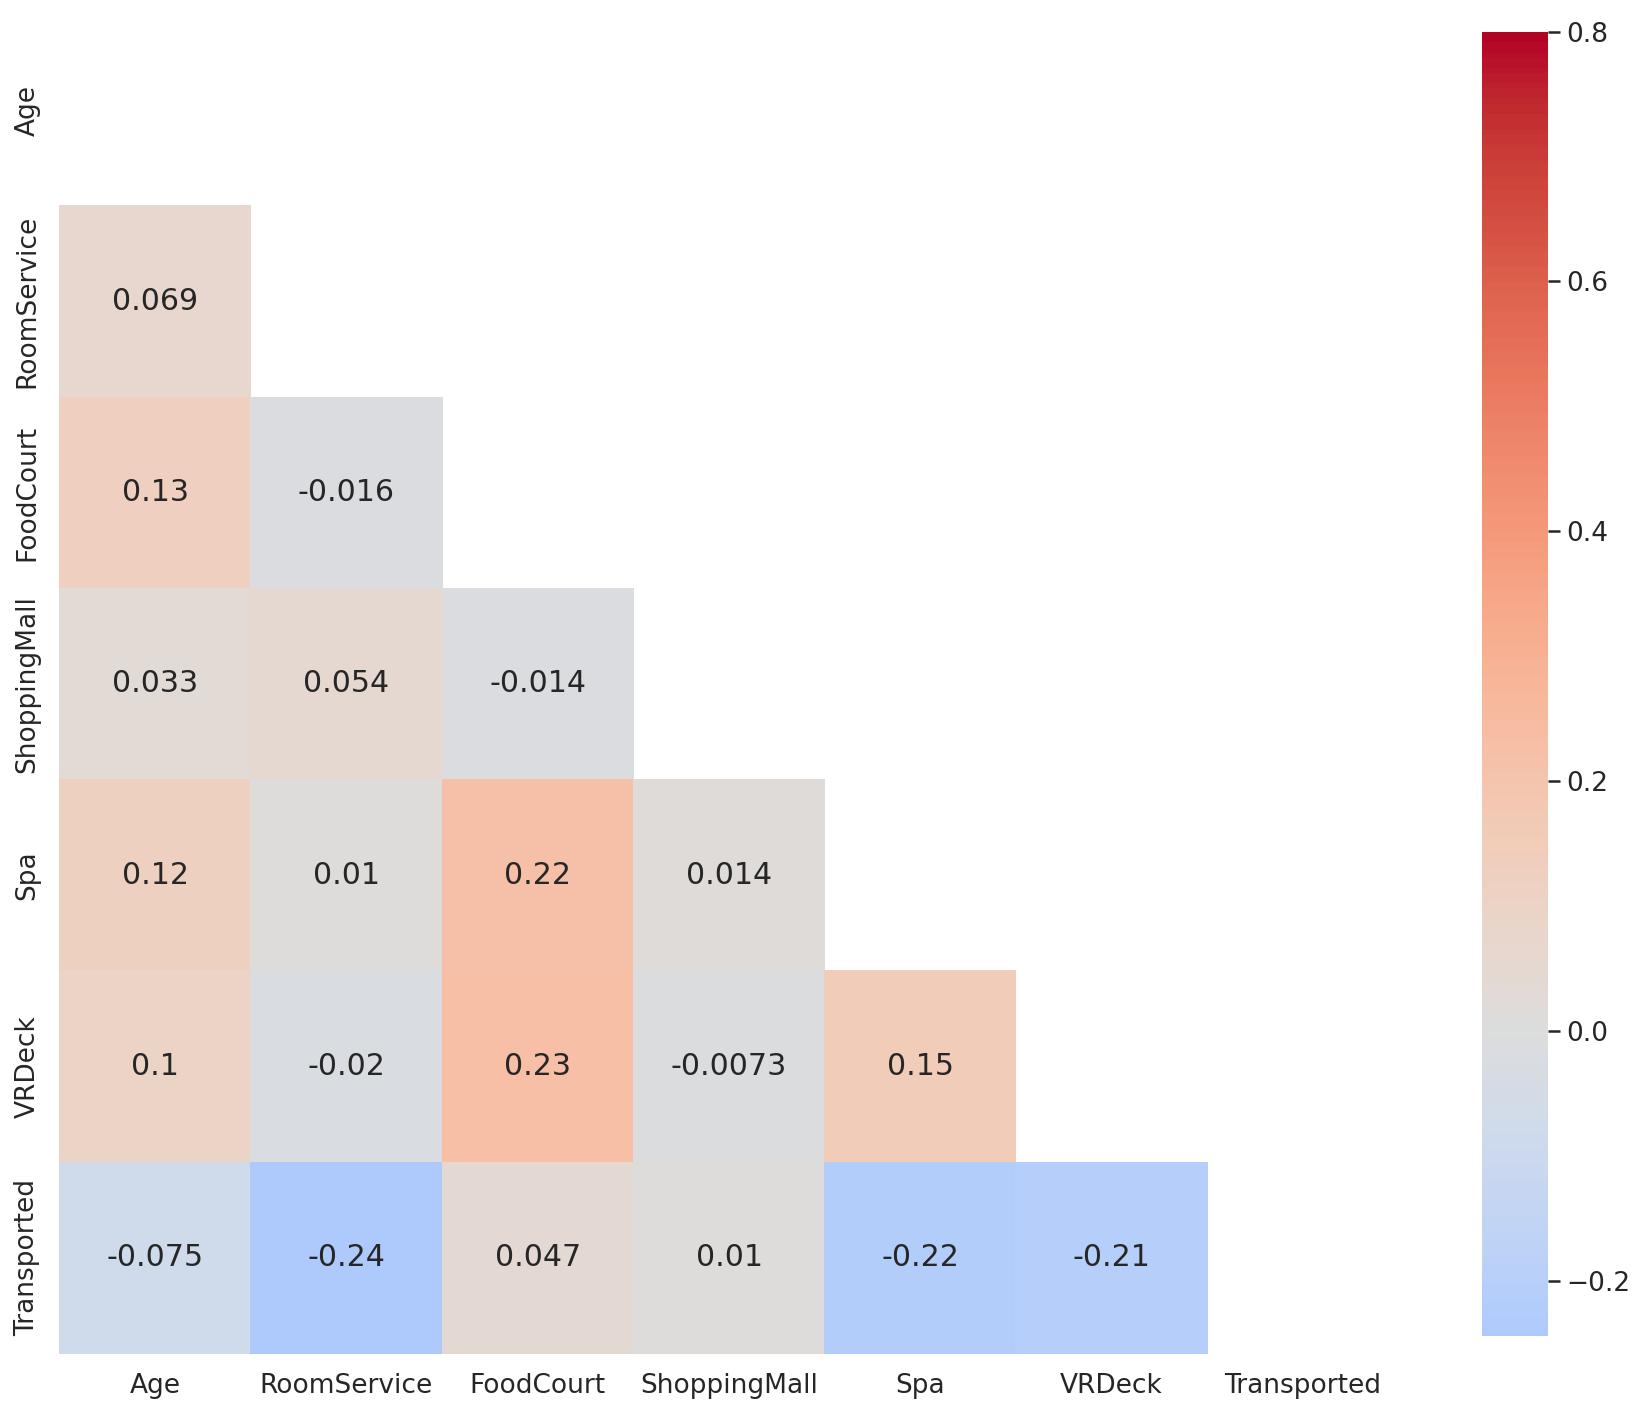

In [ ]:
corrmat = df_train.corr()
mask = np.triu(corrmat)
fig, axes = plt.subplots(figsize = (15,15))
sns.heatmap(corrmat,vmax=0.8,square=True,mask = mask, center=0, annot=True, annot_kws={"size": 15}, cbar_kws={"shrink": .8},
            cmap=plt.cm.coolwarm);

💡 **Insight**
* Age is not highly correlated with any feature therefore it is a significant feature.
* RoomService is slightly correlated to Shopping Mall (check if good to put both)
*  Goodcourt is correlated with SPA and VRDeck.

## Number of 0s per column

In [ ]:
for col in FEATURES:
    print(f'Sum of 0 values in {col}: {(df_train[col] == 0).sum()}')

Sum of 0 values in HomePlanet: 0
Sum of 0 values in CryoSleep: 5439
Sum of 0 values in Cabin: 0
Sum of 0 values in Destination: 0
Sum of 0 values in Age: 178
Sum of 0 values in VIP: 8291
Sum of 0 values in RoomService: 5577
Sum of 0 values in FoodCourt: 5456
Sum of 0 values in ShoppingMall: 5587
Sum of 0 values in Spa: 5324
Sum of 0 values in VRDeck: 5495
Sum of 0 values in Name: 0


<a id="3"></a>
# 3. Exploratory Data Analysis & Data Ceaning 

## Target Variable

Text(0.5, 1.0, 'Target distribution')

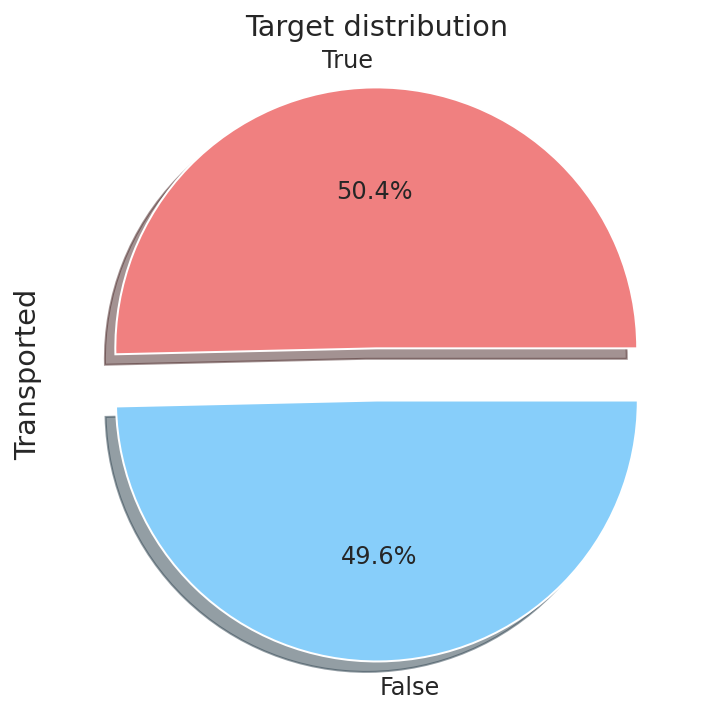

In [ ]:
plt.figure(figsize=(6,6))

df_train[TARGET].value_counts().plot.pie(explode=[0.1,0.1], 
                                             autopct='%1.1f%%', 
                                             shadow=True, 
                                             textprops={'fontsize':12}).set_title("Target distribution")

💡**Insights**
* The target variable is highly balanced, so we can use the `accuracy`as a valid metric and do not have to consider techniques like under/over-sampling.

## Categorical Variables

In [ ]:
categ_cols =  [col for col in FEATURES if df_train[col].nunique() < 25 and col not in text_cols]
categ_cols

['HomePlanet', 'CryoSleep', 'Destination', 'VIP']

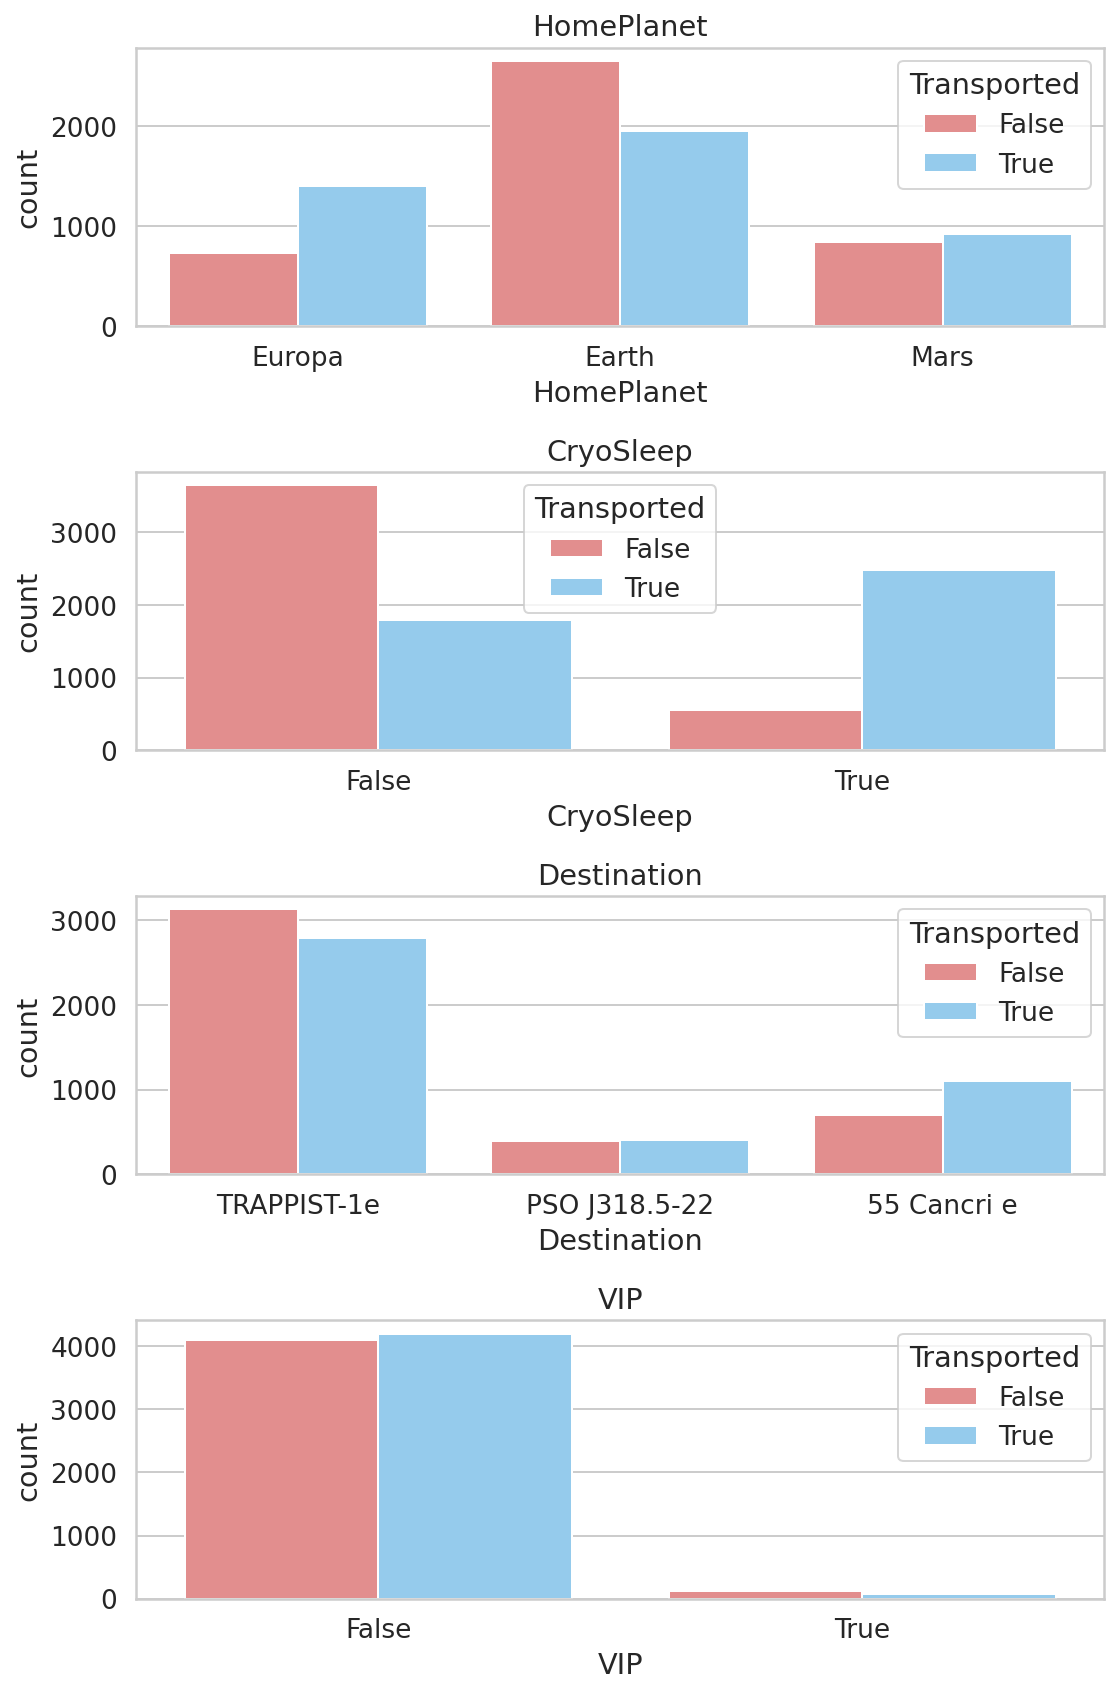

In [ ]:
# Plot categorical features
fig=plt.figure(figsize=(8,12))

for i, var_name in enumerate(categ_cols):
    ax=fig.add_subplot(4,1,i+1)
    sns.countplot(data=df_train, x=var_name, axes=ax, hue='Transported')
    ax.set_title(var_name)
fig.tight_layout()  # Improves appearance a bit
plt.show()

 💡 **Insights** 
* There appears to be a greater likelihood of passengers that departed from (or from) Europe and Mars than passengers that departed from (or from) Earth.
* CyroSleep seems to be a very useful feature as it is highly positively correlated with Transported - i.e. those that were confined in their cabines were more likely to be transported.
* Based on the plot, the planet where the passenger was debarking to/going, we cansee that the destination `TRAPPIST-1e` has a negative correlation with Transported- therefore less likely to be transported. On the other hand, the other two destinations exhibit a positive corelation with passengers, being `55 Cancri e`the strongest one.
* Given that the target split is essentially equal, VIP does not seem to be a beneficial feature. In essence, it is false that VIP passengers have a higher chance of being transported.



## Text Columns

In [ ]:
text_cols = ['Cabin','Name','PassengerId']

In [ ]:
df_train.reset_index()[text_cols].head()

Cabin               Name PassengerId
0  B/0/P    Maham Ofracculy     0001_01
1  F/0/S       Juanna Vines     0002_01
2  A/0/S      Altark Susent     0003_01
3  A/0/S       Solam Susent     0003_02
4  F/1/S  Willy Santantines     0004_01

 💡 **Insights**
* The PassengerId feature allows us to extract the group and group size.
* The cabin function allows us to extract the deck, number, and side. 
* To identify families, we might extract the surname from the name feature.


### Split `Cabin` into `CabinDeck`, `CabinNumber`and `CabinSide`

* Cabin is written as deck/num/side, where side might be P for Port or S for Starboard.
* The cabin function allows us to extract the deck, number, and side. 

In [ ]:
def split_cabin(data):
  # Replace NaN's with outliers for now (so we can split feature)
  data['Cabin'].fillna('Z/9999/Z', inplace=True)
  data['CabinDeck'] = data['Cabin'].apply(lambda x: x.split('/')[0])
  data['CabinNumber'] = data['Cabin'].apply(lambda x: x.split('/')[1]).astype('float').astype('Int64')
  #data['CabinNumber'] = data['CabinNumber'].astype(int)
  data['CabinSide'] = data['Cabin'].apply(lambda x: x.split('/')[2])

  

  # Put Nan's back in (we will fill these later)
  data.loc[data['Cabin']=='Z/9999/Z', 'Cabin']=np.nan
  data.loc[data['CabinDeck']=='Z', 'CabinDeck']=np.nan
  data.loc[data['CabinNumber']==9999, 'CabinNumber']=np.nan
  data.loc[data['CabinSide']=='Z', 'CabinSide']=np.nan
  

  # Drop Cabin (we don't need it anymore)
  data.drop('Cabin', axis=1, inplace=True)
  return data


In [ ]:
cabin_transformer = FunctionTransformer(split_cabin,validate=False)
df_train, df_test = read_data()
df_train = cabin_transformer.fit_transform(df_train)
df_train[['CabinSide','CabinDeck','CabinNumber']]

CabinSide CabinDeck  CabinNumber
PassengerId                                 
0001_01             P         B            0
0002_01             S         F            0
0003_01             S         A            0
0003_02             S         A            0
0004_01             S         F            1
...               ...       ...          ...
9276_01             P         A           98
9278_01             S         G         1499
9279_01             S         G         1500
9280_01             S         E          608
9280_02             S         E          608

[8693 rows x 3 columns]

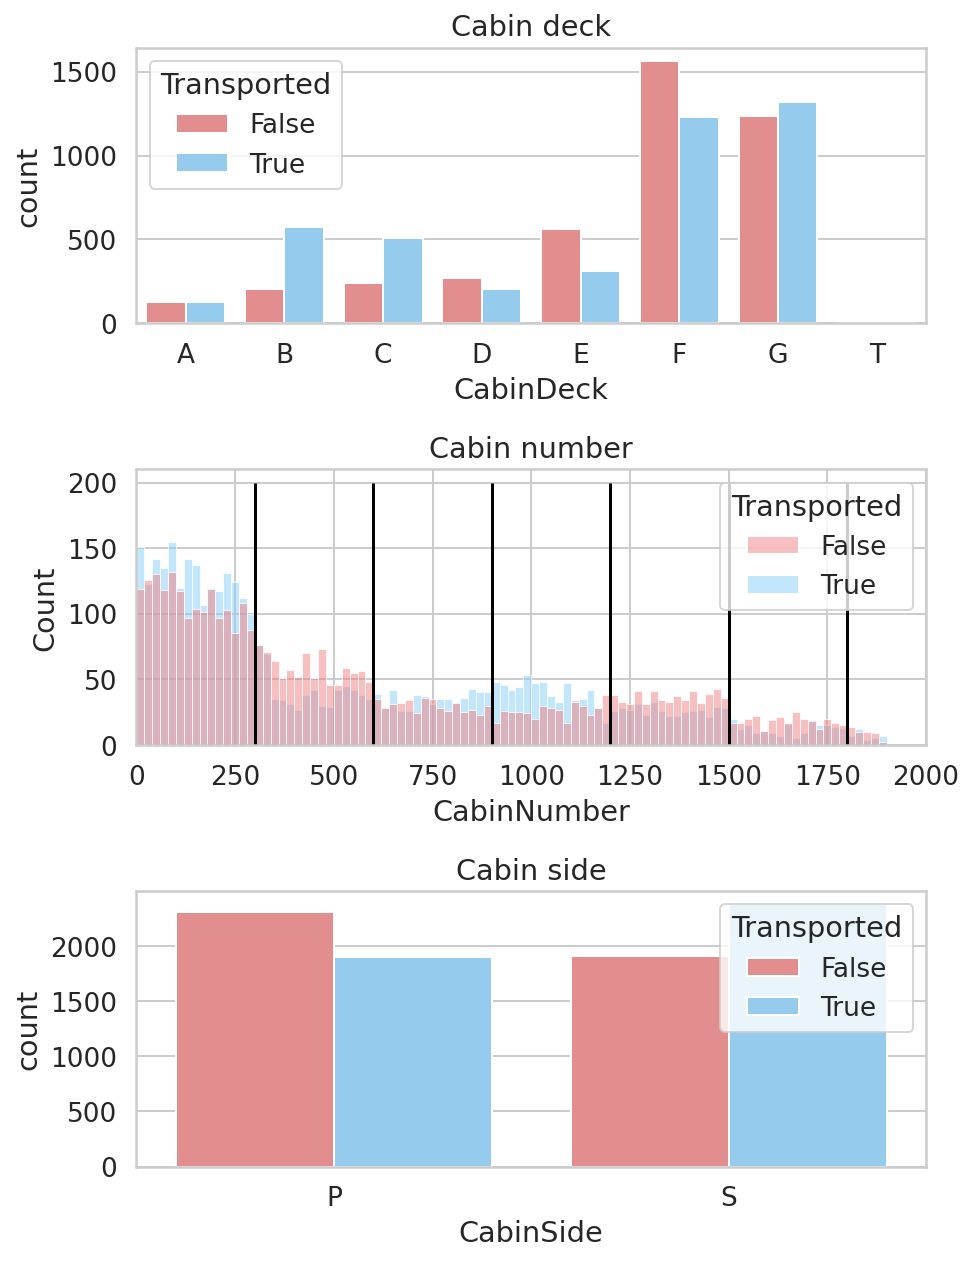

In [ ]:
# Plot distribution of new features
fig=plt.figure(figsize=(7,9))
plt.subplot(3,1,1)
sns.countplot(data=df_train, x='CabinDeck', hue='Transported', order=['A','B','C','D','E','F','G','T'])
plt.title('Cabin deck')

plt.subplot(3,1,2)
sns.histplot(data=df_train, x='CabinNumber', hue='Transported',binwidth=20)
plt.vlines(300, ymin=0, ymax=200, color='black')
plt.vlines(600, ymin=0, ymax=200, color='black')
plt.vlines(900, ymin=0, ymax=200, color='black')
plt.vlines(1200, ymin=0, ymax=200, color='black')
plt.vlines(1500, ymin=0, ymax=200, color='black')
plt.vlines(1800, ymin=0, ymax=200, color='black')
plt.title('Cabin number')
plt.xlim([0,2000])

plt.subplot(3,1,3)
sns.countplot(data=df_train, x='CabinSide', hue='Transported')
plt.title('Cabin side')
fig.tight_layout()

💡 **Insights**
* `CabinNumber`appears to be grouped in chunks of around 250 cabins, we could compress this feature into one which indicates which chunk the passenger is in. 
* `CabinDeck` *T* is an outlier with only 5 samples.

### Add `cabin_region`

In [ ]:
 def add_cabin_region(data): 
  data['Cabin_region1']=(data['CabinNumber']<300).astype(np.float).astype("Int32")   # one-hot encoding
  data['Cabin_region2']=((data['CabinNumber']>=300) & (data['CabinNumber']<600)).astype(np.float).astype("Int32")
  data['Cabin_region3']=((data['CabinNumber']>=600) & (data['CabinNumber']<900)).astype(np.float).astype("Int32")
  data['Cabin_region4']=((data['CabinNumber']>=900) & (data['CabinNumber']<1200)).astype(np.float).astype("Int32")
  data['Cabin_region5']=((data['CabinNumber']>=1200) & (data['CabinNumber']<1500)).astype(np.float).astype("Int32")
  data['Cabin_region6']=((data['CabinNumber']>=1500) & (data['CabinNumber']<1800)).astype(np.float).astype("Int32")
  data['Cabin_region7']=(data['CabinNumber']>=1800).astype(np.float).astype("Int32")
  return data

In [ ]:
cabin_region_transformer = FunctionTransformer(add_cabin_region,validate=False)

In [ ]:
df_train = cabin_region_transformer.fit_transform(df_train)
cabin_filter = [col for col in df_train if col.startswith('Cabin')]
df_train[cabin_filter]
#df_train[['Cabin', 'Cabin_deck', 'Cabin_num', 'Cabin_side']]

CabinDeck  CabinNumber CabinSide  Cabin_region1  Cabin_region2  \
PassengerId                                                                  
0001_01             B            0         P              1              0   
0002_01             F            0         S              1              0   
0003_01             A            0         S              1              0   
0003_02             A            0         S              1              0   
0004_01             F            1         S              1              0   
...               ...          ...       ...            ...            ...   
9276_01             A           98         P              1              0   
9278_01             G         1499         S              0              0   
9279_01             G         1500         S              0              0   
9280_01             E          608         S              0              0   
9280_02             E          608         S              0              0   

             Cabin_region3  Cabin_region4  Cabin_region5  Cabin_region6  \
PassengerId                                                               
0001_01                  0              0              0              0   
0002_01                  0              0              0              0   
0003_01                  0              0              0              0   
0003_02                  0              0              0              0   
0004_01                  0              0              0              0   
...                    ...            ...            ...            ...   
9276_01                  0              0              0              0   
9278_01                  0              0              1              0   
9279_01                  0              0              0              1   
9280_01                  1              0              0              0   
9280_02                  1              0              0              0   

             Cabin_region7  
PassengerId                 
0001_01                  0  
0002_01                  0  
0003_01                  0  
0003_02                  0  
0004_01                  0  
...                    ...  
9276_01                  0  
9278_01                  0  
9279_01                  0  
9280_01                  0  
9280_02                  0  

[8693 rows x 10 columns]

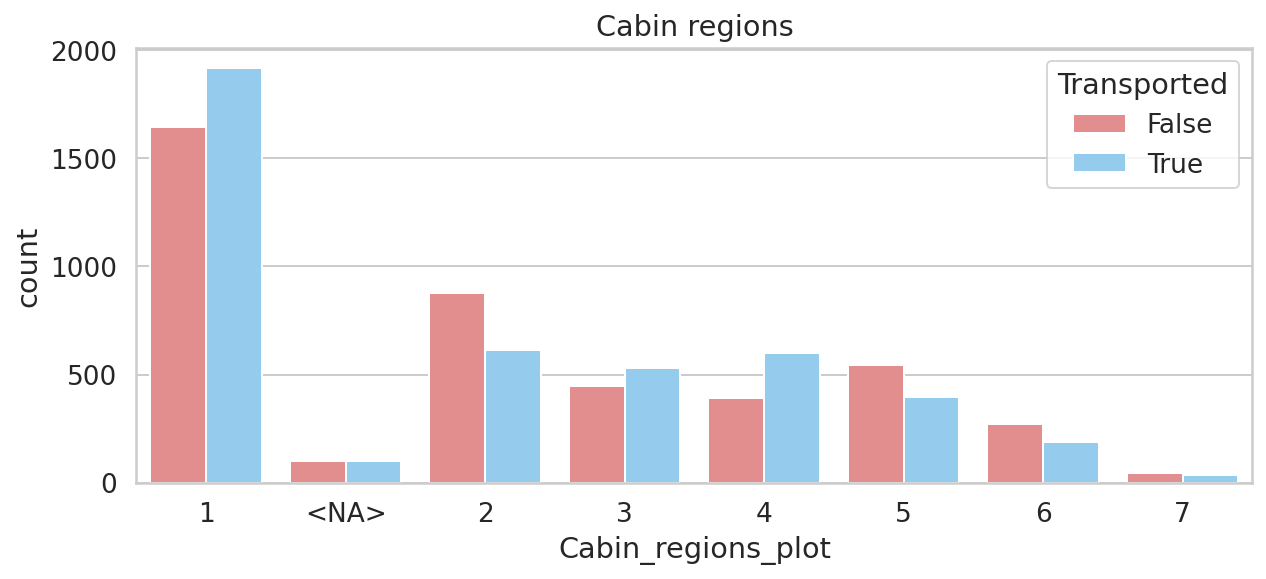

In [ ]:
# Plot distribution of new features
plt.figure(figsize=(10,4))
df_train['Cabin_regions_plot']=(df_train['Cabin_region1']+2*df_train['Cabin_region2']+3*df_train['Cabin_region3']+4*df_train['Cabin_region4']+5*df_train['Cabin_region5']+6*df_train['Cabin_region6']+7*df_train['Cabin_region7']).astype('str')
sns.countplot(data=df_train, x='Cabin_regions_plot', hue='Transported')
plt.title('Cabin regions')
df_train.drop('Cabin_regions_plot', axis=1, inplace=True)

### Split `PassengerID`

PassengerId has the format gggg pp, where gggg represents the group the passenger is traveling with and pp represents their position inside the group. 

In [ ]:
def split_passenger(data, inplace=True):
    """Split the feature `PassengerId` into `Group` and `Number`
    """
    df = data if inplace else data.copy()

    df['PassengerGroup'] = df.index.map(lambda x: x[0:4]).astype(int)
    df['PassengerNumber'] = df.index.map(lambda x: x[5:7]).map(np.int16)
    df['PassengerNumber'] = df['PassengerNumber'].astype(int)
    
    return df

In [ ]:
split_passenger_transformer = FunctionTransformer(split_passenger,validate=False)
df_train = split_passenger_transformer.fit_transform(df_train)

In [ ]:
df_train[['PassengerGroup', 'PassengerNumber']].head()

PassengerGroup  PassengerNumber
PassengerId                                 
0001_01                   1                1
0002_01                   2                1
0003_01                   3                1
0003_02                   3                2
0004_01                   4                1

💡 **Insights**
* The PassengerId feature allows us to extract the group and group size.
* The cabin function allows us to extract the deck, number, and side. 
* To identify families, we might extract the surname from the name feature.

In [ ]:
#df_train[['PassengerGroup', 'PassengerNumber']].dtypes

### Add `GroupSize` from `PassengerGroup`

In [ ]:
def add_group_size(data):
    data.drop(['GroupSize'], axis=1, inplace=True, errors='ignore')
    
    df = data[['PassengerGroup', 'PassengerNumber']].groupby(by='PassengerGroup').max()
    df.columns = ['GroupSize']

    df = data.reset_index().merge(df, 
        how='left', 
        left_on='PassengerGroup', 
        right_on='PassengerGroup')

    return df.set_index(INDEX)


In [ ]:
add_group_size_transformer = FunctionTransformer(add_group_size)

In [ ]:
df_train = add_group_size(df_train)
df_train[['PassengerGroup', 'GroupSize']].head()

PassengerGroup  GroupSize
PassengerId                           
0001_01                   1          1
0002_01                   2          1
0003_01                   3          2
0003_02                   3          2
0004_01                   4          1

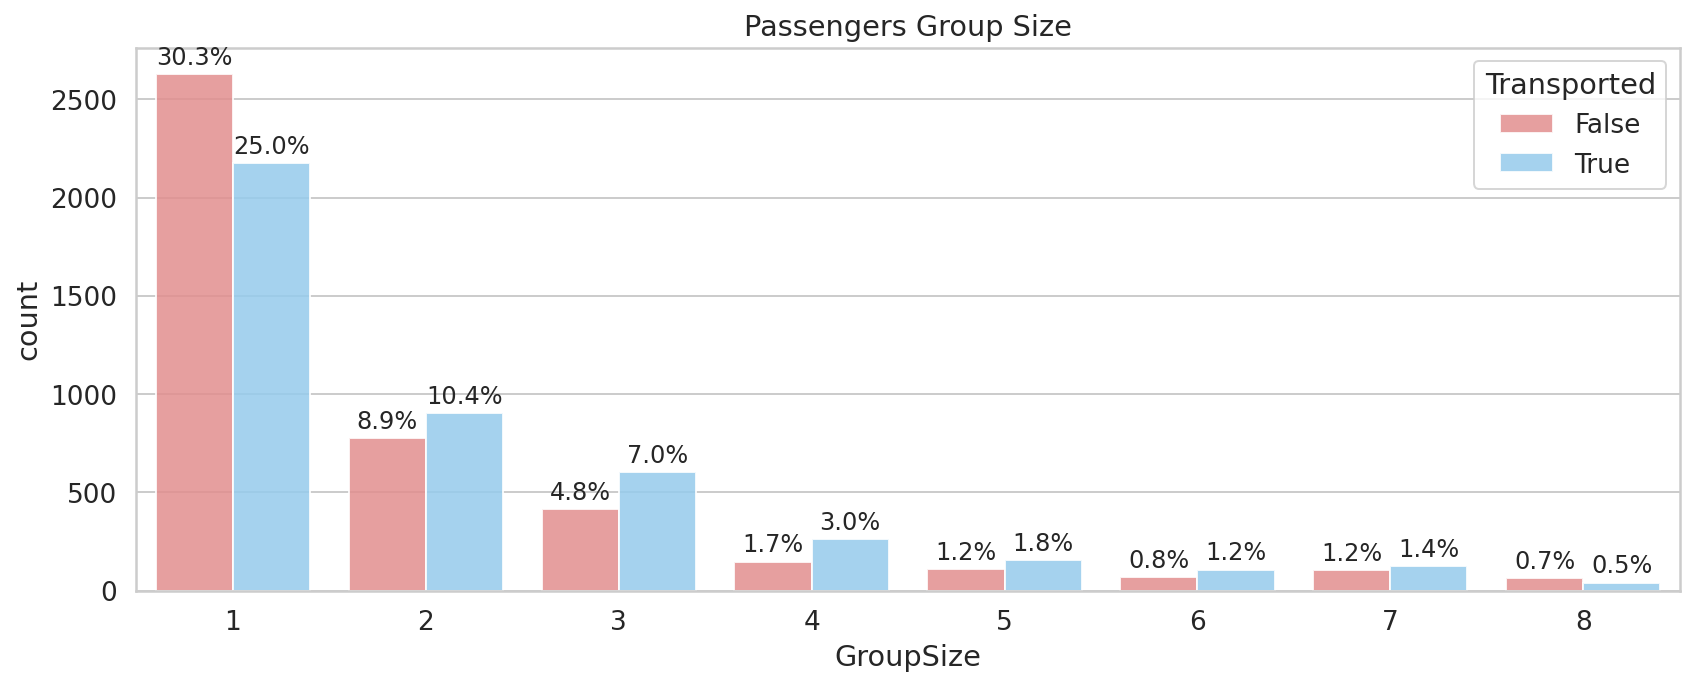

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12, 5))
sns.countplot(data=df_train, x='GroupSize',hue=TARGET,alpha=0.85,ax=ax)
bar_percent(ax, N=len(df_train), size=12)
ax.set_title('Passengers Group Size')
plt.tight_layout()
plt.show()

There is a problem with using the Group feature in our models because it has a large cardinality (6217). This would lead to an explosion in the number of dimensions with one-hot encoding. The size of a group is a useful feature. We can further compress the feature by tracking whether someone is travelling on their own or not. The data shows that groups of one are less likely to be transported than groups of more than one.

### Add `Solo`Feature

In [ ]:
def add_solo(data,inplace = True):
  df = data if inplace else data.copy()
  df['Solo']=(df['GroupSize']==1).astype(int)
  return data

In [ ]:
solo_transformer = FunctionTransformer(add_solo)
df_train = solo_transformer.fit_transform(df_train)

(0.0, 3000.0)

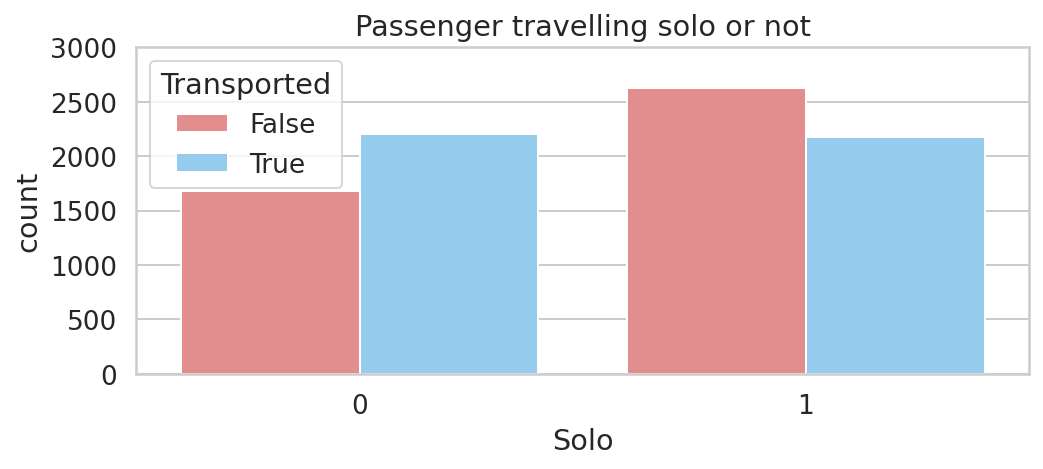

In [ ]:
plt.figure(figsize=(8,3))
sns.countplot(data=df_train, x='Solo', hue='Transported')
plt.title('Passenger travelling solo or not')
plt.ylim([0,3000])

### Split `Name`Feature

To identify families, we might extract the surname from the name feature.

In [ ]:
def split_name(data):
    data['Name'].fillna('Unknown Unknown', inplace=True)
    data['Firstname'] = data['Name'].str.split().str[0]
    data['Surname'] = data['Name'].str.split().str[-1]

    data.loc[data['Name']=='Unknown Unknown','Name']=np.nan
    #data.loc[data['Firstname']=='Unknown','Firstname']=np.nan
    #data.loc[data['Surname']=='Unknown','Surname']=np.nan
    
    
    return data

name_transformer = FunctionTransformer(split_name)

In [ ]:
df_train = name_transformer.fit_transform(df_train)
df_train[['Name', 'Firstname', 'Surname']].head()

Name Firstname      Surname
PassengerId                                          
0001_01        Maham Ofracculy     Maham    Ofracculy
0002_01           Juanna Vines    Juanna        Vines
0003_01          Altark Susent    Altark       Susent
0003_02           Solam Susent     Solam       Susent
0004_01      Willy Santantines     Willy  Santantines

### Add `Family Size`Feature from Surname

In [ ]:
def add_family_size(data):
  data['FamilySize']=data['Surname'].map(lambda x: data['Surname'].value_counts()[x])

  data.loc[data['Firstname']=='Unknown','Firstname']=np.nan
  data.loc[data['Surname']=='Unknown','Surname']=np.nan
  data.loc[data['FamilySize']>100,'FamilySize'] = np.nan

  return data


In [ ]:
family_size_transformer = FunctionTransformer(add_family_size)
df_train = family_size_transformer.fit_transform(df_train)

In [ ]:
df_train[['Surname','FamilySize']].sort_values(by = 'FamilySize',ascending = False)

Surname  FamilySize
PassengerId                       
2940_01      Casonston        18.0
3995_03      Casonston        18.0
2650_01      Casonston        18.0
2561_01      Casonston        18.0
5679_01      Casonston        18.0
...                ...         ...
9205_02            NaN         NaN
9208_01            NaN         NaN
9218_01            NaN         NaN
9230_01            NaN         NaN
9246_01            NaN         NaN

[8693 rows x 2 columns]

Text(0.5, 1.0, 'Family size')

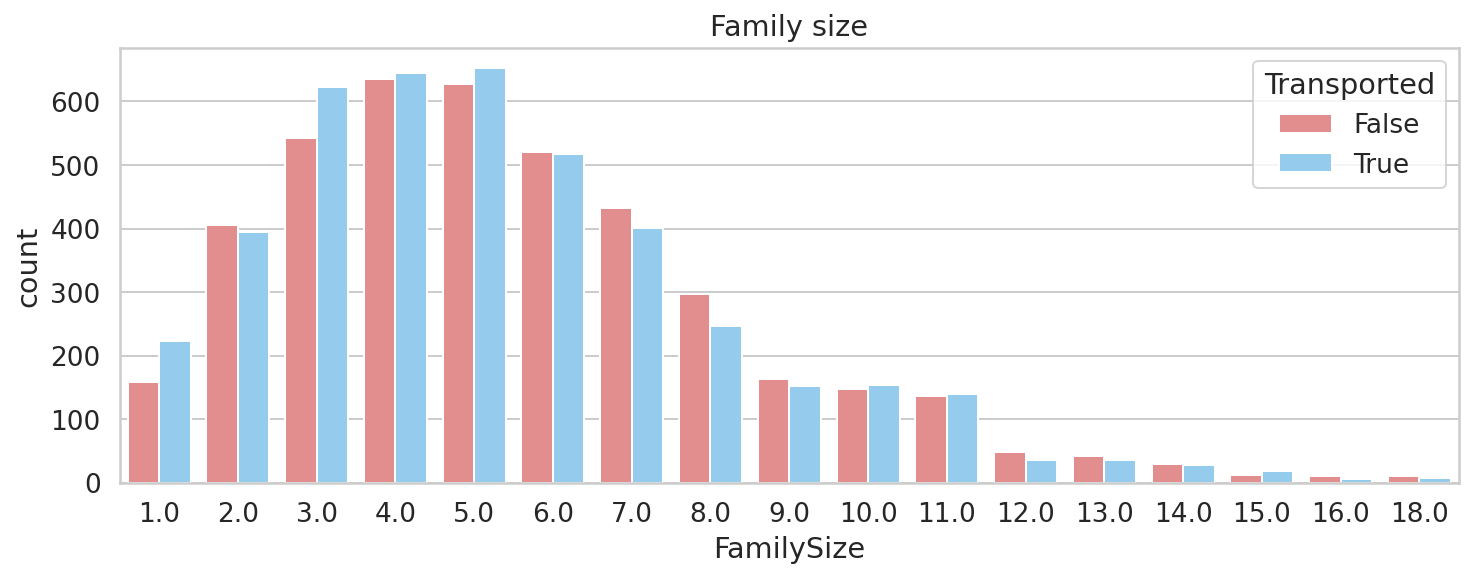

In [ ]:
# New feature distribution
plt.figure(figsize=(12,4))
sns.countplot(data=df_train, x='FamilySize', hue='Transported')
plt.title('Family size')

## Numerical Columns

### `TotalExpenditure` and  `NoExpenditure`

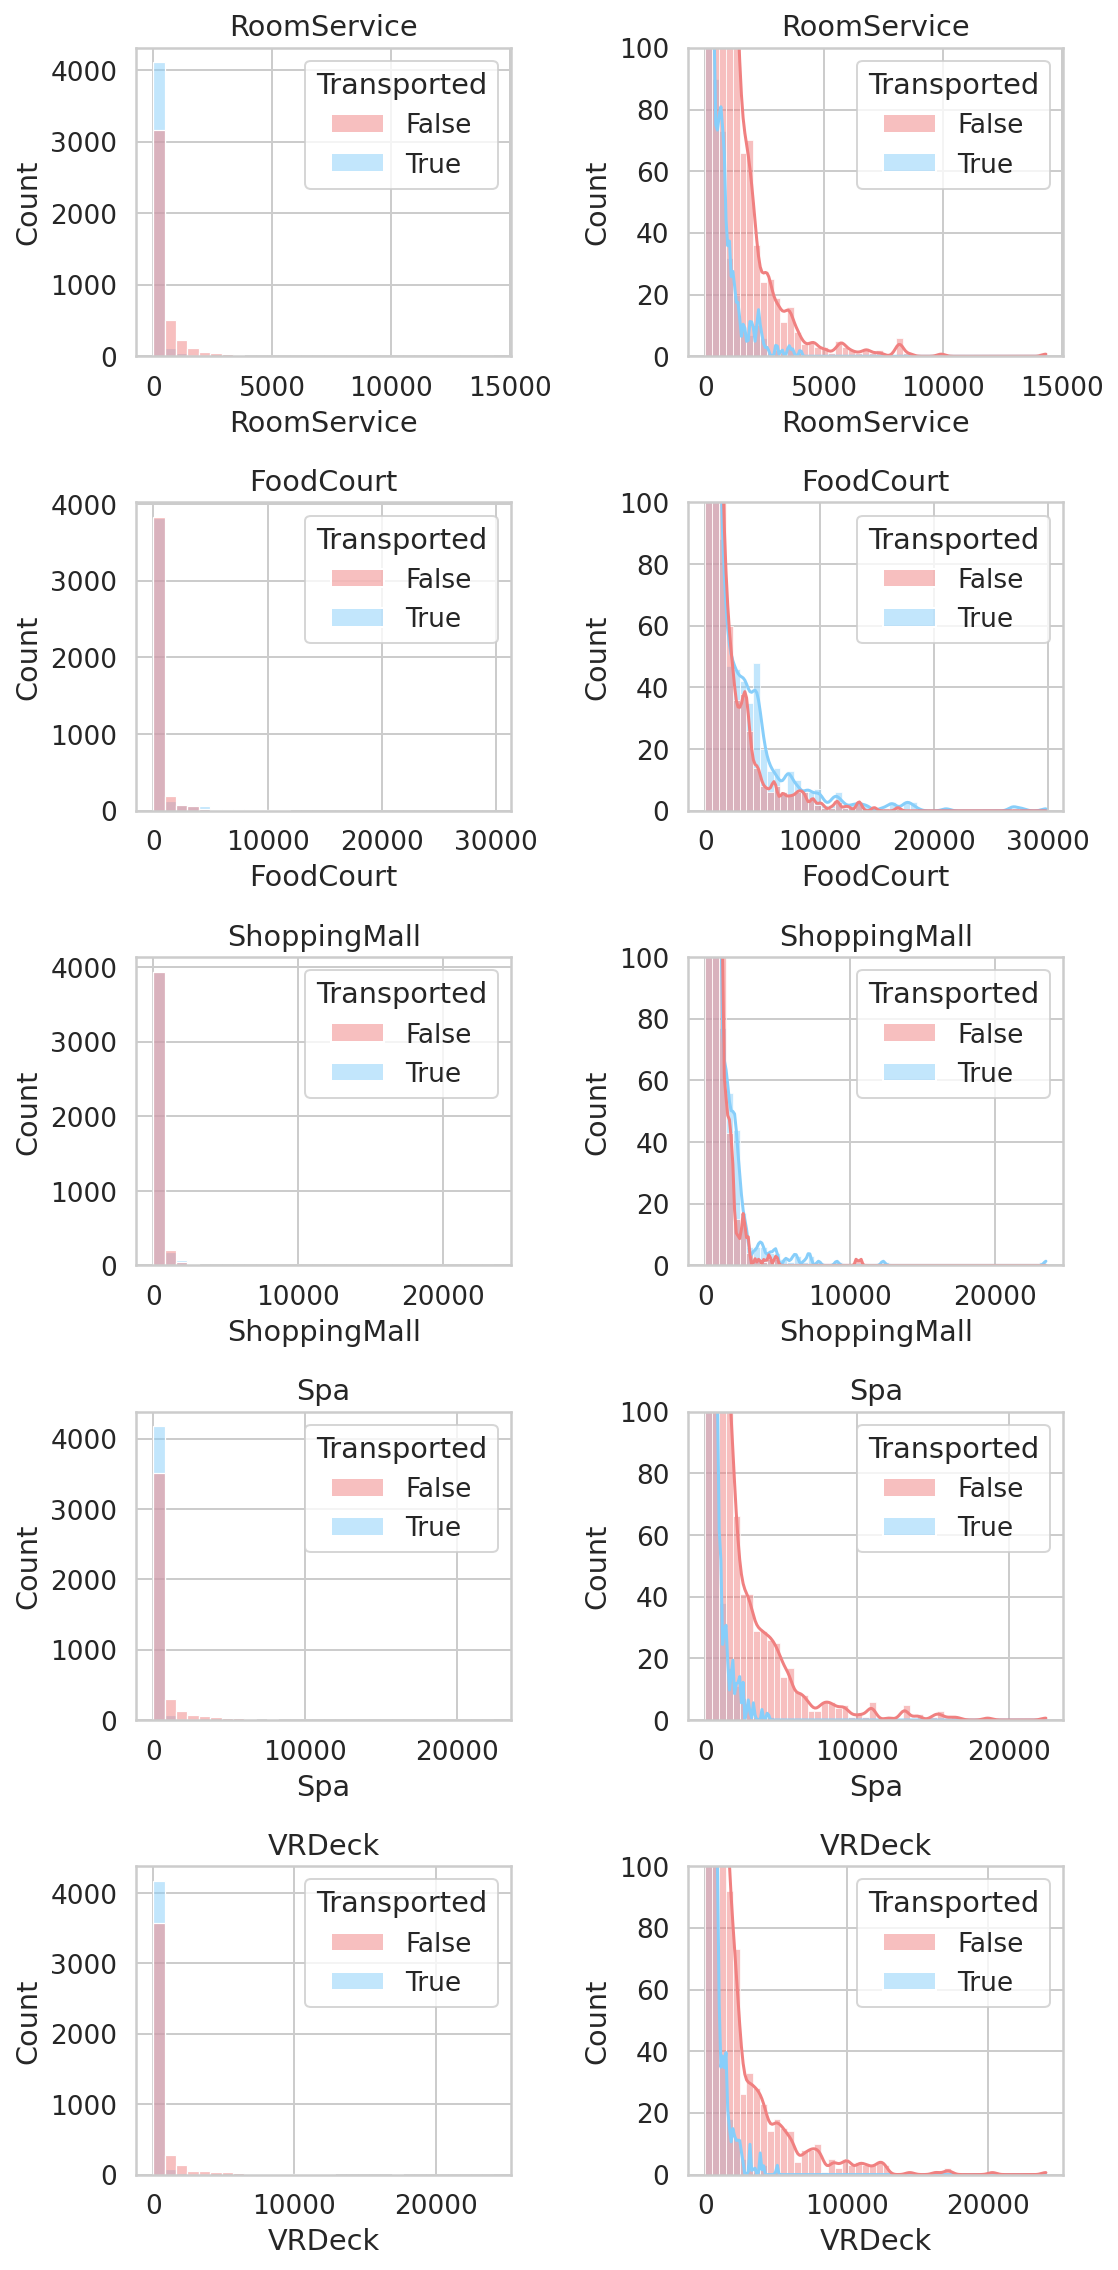

In [ ]:
# Expenditure features
expenditure_cols=['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']


fig=plt.figure(figsize=(8,16))
for i, var in enumerate(expenditure_cols):
    # Left plot
    ax=fig.add_subplot(5,2,2*i+1)
    sns.histplot(data=df_train, x=var, axes=ax, bins=30, kde=False, hue=TARGET)
    ax.set_title(var)
    
    # Right plot (truncated)
    ax=fig.add_subplot(5,2,2*i+2)
    sns.histplot(data=df_train, x=var, axes=ax, bins=50, kde=True, hue=TARGET)
    plt.ylim([0,100])
    ax.set_title(var)
fig.tight_layout()  
plt.show()

💡**Insights**

* From the plots on the left we can see that the majority of the people didn't spend any money.
* From the plots on the right, we can see that the distribution of spending decays exponentially.
* There are not many outliers.
* Those that were transported tended to spend less.
RoomService, Spa, and VRDeck (luxury expenditures) are distributed differently than FoodCourt and ShoppingMall (basic expenditures)
* Create new feature that monitors the overall cost of all five facilities.
* Create new feature that monitors **luxury expenditures** (RoomService, SPA and VRDeck) and **basic expenditures** (FoodCourt, ShoppingMall)
* Create binary feature to indicate whether or not the individual has spent anything.
* To decrease skew, use log transform.

In [ ]:
def add_totalexpenditure(data):
  expenditure_cols=['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
  data['Total_Expenditure'] = data[expenditure_cols].sum(axis = 1)
  data['No_Expenditure']=(data['Total_Expenditure']==0).astype(int)
  return data 

In [ ]:
total_expenditure_transformer = FunctionTransformer(add_totalexpenditure)

In [ ]:

df_train = total_expenditure_transformer.fit_transform(df_train)
df_train[['Total_Expenditure', 'No_Expenditure']].head()

Total_Expenditure  No_Expenditure
PassengerId                                   
0001_01                    0.0               1
0002_01                  736.0               0
0003_01                10383.0               0
0003_02                 5176.0               0
0004_01                 1091.0               0

### `Luxury_Expenditure`and `BasicExpenditure`

In [ ]:
def add_luxury_basic_expenditure(data):
  expenditure_cols=['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
  data['Luxury_Expenditure'] = data[['RoomService','Spa','VRDeck']].sum(axis = 1)
  data['Basic_Expenditure'] = data[['FoodCourt','ShoppingMall']].sum(axis = 1)
  return data 

In [ ]:
basic_luxury_transformer = FunctionTransformer(add_luxury_basic_expenditure)
df_train = basic_luxury_transformer.fit_transform(df_train)
df_train[['Luxury_Expenditure', 'Basic_Expenditure']].head()

Luxury_Expenditure  Basic_Expenditure
PassengerId                                       
0001_01                     0.0                0.0
0002_01                   702.0               34.0
0003_01                  6807.0             3576.0
0003_02                  3522.0             1654.0
0004_01                   870.0              221.0

### Age Binner

Text(0, 0.5, 'Age')

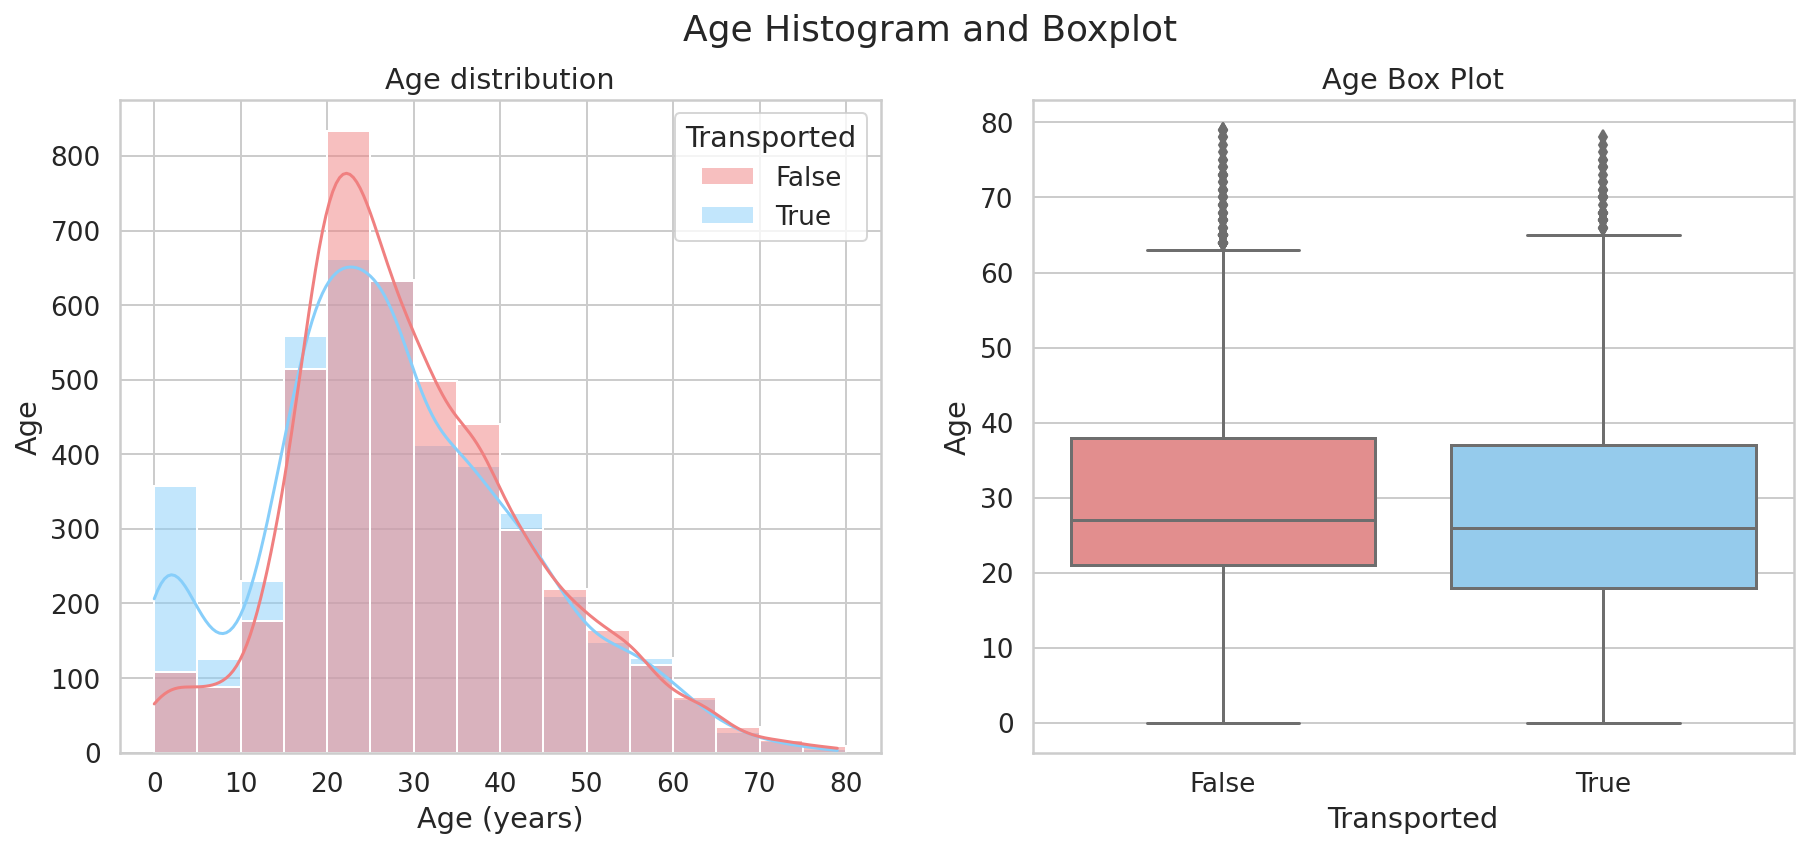

In [ ]:
#plt.figure(figsize=(10,4))
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
fig.suptitle('Age Histogram and Boxplot', size=18)

sns.histplot(data=df_train, x='Age', hue=TARGET, binwidth=5, kde=True,ax =ax1,bins = 100)
ax1.set_title('Age distribution')
ax1.set_xlabel('Age (years)')

sns.boxplot(data = df_train, x = TARGET,y = 'Age',ax = ax2)
ax2.set_title('Age Box Plot')
ax2.set_xlabel('Transported')
ax1.set_ylabel('Age')

💡**Insights**
* We can see that the youngest are the most likely of being transported.
*  Those in their 20s are the least likely of being transported.
* Passengers over 40 were about equally likely to be trnasported than not.

In [ ]:
# def age_binner(data):
#     bins =  [0,6,16,21,31,41,51, np.inf],
#     labels =['Babies','Kid','Teen', 'Twenties','Thirties','Fourties','Senior']
#     age_transformer = FunctionTransformer(pd.cut, kw_args={'bins':bins,'labels':labels, 'retbins':False})
#     data['AgeClass']= age_transformer.fit_transform(data['Age'])
#     return data

In [ ]:
def discretization_age(data):
    bins = [-np.inf, 2, 13, 21, 60, np.inf]
    labels = ['Baby', 'Kid', 'Teen', 'Adult', 'Senior']

    age_transformer = FunctionTransformer(
        pd.cut, kw_args={'bins': bins, 'labels': labels, 'retbins': False}
    )
    data['AgeClass'] = age_transformer.fit_transform(data['Age'])
    return data
  

In [ ]:
age_transformer = FunctionTransformer(discretization_age)
df_train = age_transformer.fit_transform(df_train)
df_train[['Age', 'AgeClass']].head()

Age AgeClass
PassengerId               
0001_01      39.0    Adult
0002_01      24.0    Adult
0003_01      58.0    Adult
0003_02      33.0    Adult
0004_01      16.0     Teen

In [ ]:
def plot_count(data, feature, target=TARGET, ax=None, percent=True):
    if ax is None:
        ax = plt.gca()

    sns.countplot(
        data=data, 
        x=feature,
        hue=target,
        #palette='rocket', 
        alpha=0.75,
        ax=ax)
    
    if percent:
        bar_percent(ax, N=len(data))    
        
    ax.set_title(f'Count {feature}')

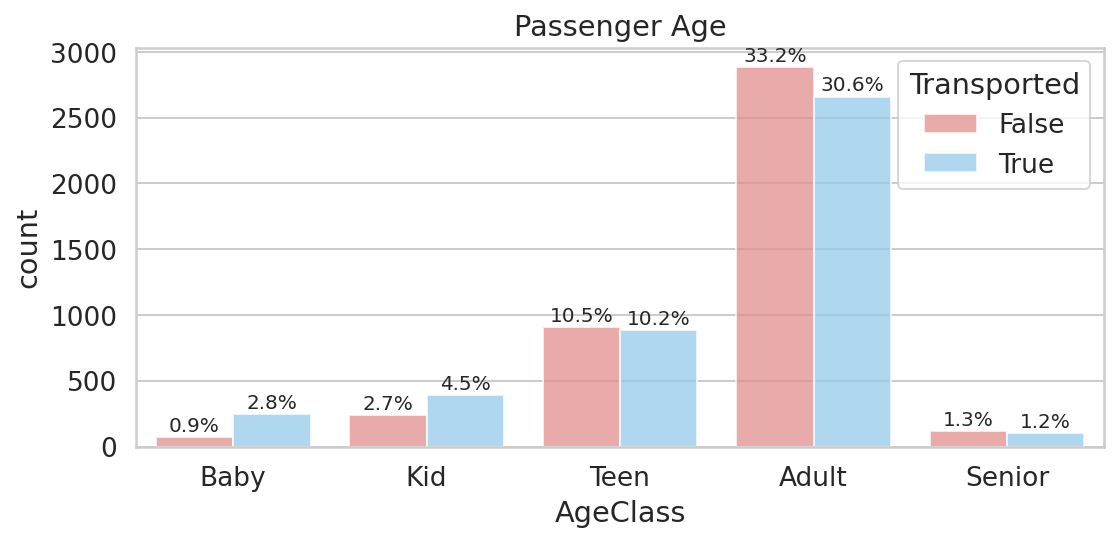

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))

plot_count(df_train, 'AgeClass', ax=ax)
ax.set_title('Passenger Age')

plt.tight_layout()
plt.show()

## Data Cleaning pipeline

In [ ]:
data_cleaning_pipeline = make_pipeline(
    cabin_transformer,
    cabin_region_transformer,
    split_passenger_transformer,
    add_group_size_transformer,
    solo_transformer,
    name_transformer,
    family_size_transformer,
    total_expenditure_transformer,
    basic_luxury_transformer,
    age_transformer)

In [ ]:
df_train, df_test = read_data()
df_train = data_cleaning_pipeline.fit_transform(df_train)
df_test = data_cleaning_pipeline.transform(df_test)

# 4. Missing Values

In [ ]:
# Labels and features
y=df_train['Transported'].copy().astype(int)
X=df_train.drop('Transported', axis=1).copy()

# Concatenate dataframes
data=pd.concat([X, df_test], axis=0).reset_index(drop=False)

In [ ]:
data.head()
print(data.shape)

(12970, 34)


In [ ]:
na_cols=data.columns[data.isna().any()].tolist()

mv=pd.DataFrame(data[na_cols].isna().sum(), columns=['Number_missing'])
mv['Percentage_missing']=np.round(100*mv['Number_missing']/len(data),2)
mv

Number_missing  Percentage_missing
HomePlanet                288                2.22
CryoSleep                 310                2.39
Destination               274                2.11
Age                       270                2.08
VIP                       296                2.28
RoomService               263                2.03
FoodCourt                 289                2.23
ShoppingMall              306                2.36
Spa                       284                2.19
VRDeck                    268                2.07
Name                      294                2.27
CabinDeck                 299                2.31
CabinNumber               299                2.31
CabinSide                 299                2.31
Cabin_region1             299                2.31
Cabin_region2             299                2.31
Cabin_region3             299                2.31
Cabin_region4             299                2.31
Cabin_region5             299                2.31
Cabin_region6             299                2.31
Cabin_region7             299                2.31
Firstname                 294                2.27
Surname                   294                2.27
FamilySize                200                1.54
AgeClass                  270                2.08

Text(0.5, 1.0, 'Heatmap of missing values')

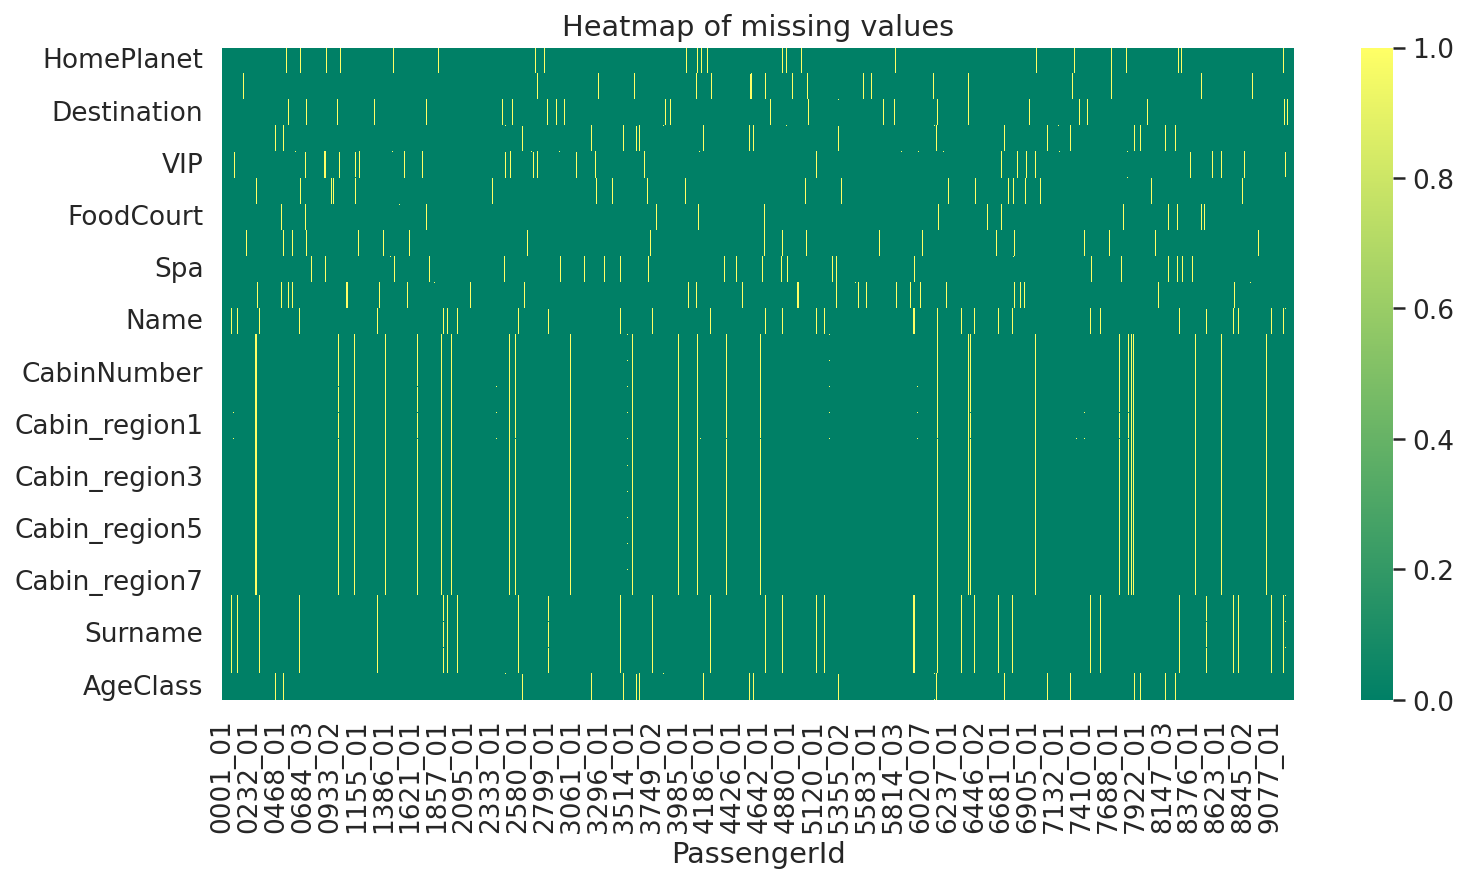

In [ ]:
# Heatmap of missing values
plt.figure(figsize=(12,6))
sns.heatmap(df_train[na_cols].isna().T, cmap='summer')
plt.title('Heatmap of missing values')

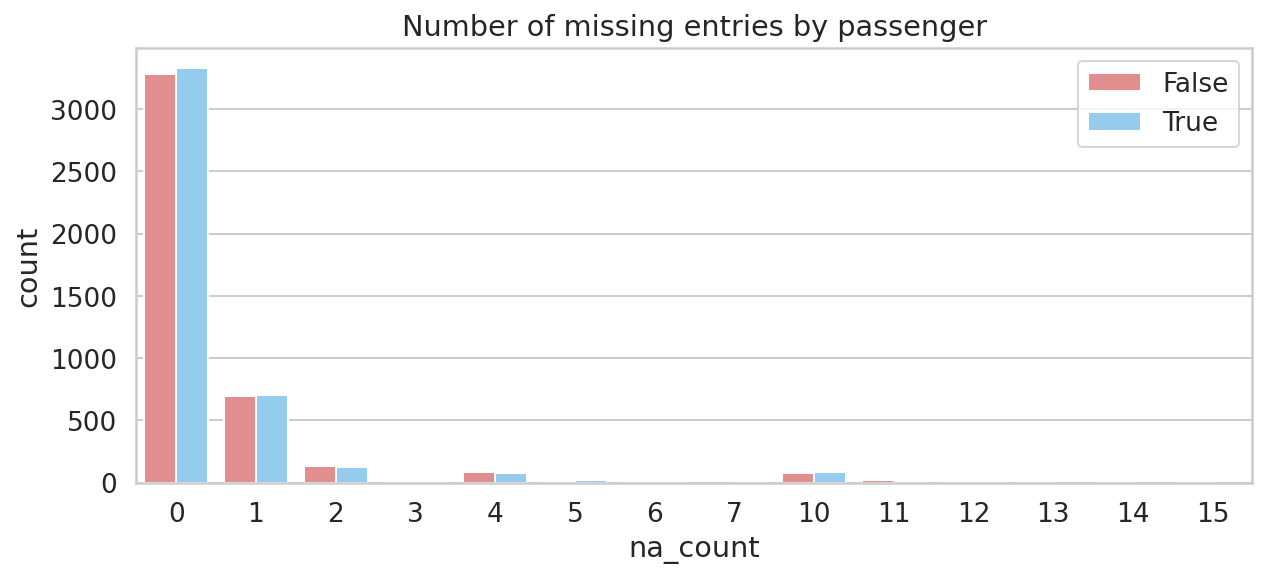

In [ ]:
# Countplot of number of missing values by passenger
df_train['na_count']=df_train.isna().sum(axis=1)
plt.figure(figsize=(10,4))
sns.countplot(data=df_train, x='na_count', hue='Transported')
plt.title('Number of missing entries by passenger')
plt.legend(loc = 'upper right')
df_train.drop('na_count', axis=1, inplace=True)

## Filling HomePlanet Missing Values

### Group and HomePlanet

In [ ]:
data.groupby(['PassengerGroup']).filter(lambda x: x['HomePlanet'].nunique()>1)

Empty DataFrame
Columns: [PassengerId, HomePlanet, CryoSleep, Destination, Age, VIP, RoomService, FoodCourt, ShoppingMall, Spa, VRDeck, Name, CabinDeck, CabinNumber, CabinSide, Cabin_region1, Cabin_region2, Cabin_region3, Cabin_region4, Cabin_region5, Cabin_region6, Cabin_region7, PassengerGroup, PassengerNumber, GroupSize, Solo, Firstname, Surname, FamilySize, Total_Expenditure, No_Expenditure, Luxury_Expenditure, Basic_Expenditure, AgeClass]
Index: []

[0 rows x 34 columns]

In [ ]:
GHP_ct = pd.crosstab(data.PassengerGroup, data.HomePlanet)
GHP_ct.head()

HomePlanet      Earth  Europa  Mars
PassengerGroup                     
1                   0       1     0
2                   1       0     0
3                   0       2     0
4                   1       0     0
5                   1       0     0

https://pbpython.com/pandas-crosstab.html

Text(0.5, 1.0, 'Number of unique home planets per group')

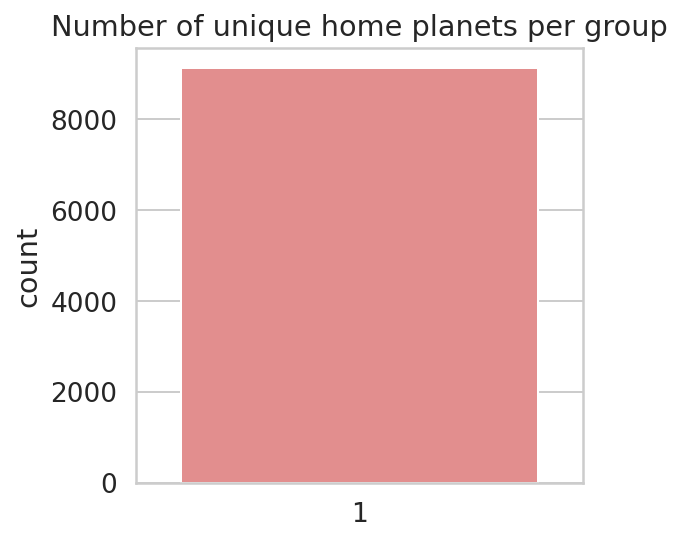

In [ ]:
plt.figure(figsize=(4,4))
sns.countplot((GHP_ct>0).sum(axis = 1))
plt.title('Number of unique home planets per group')

💡**Insight**
* There are no group of passengers travelling with passengers from different planets, therefore I will impute missing values for `HomePlanet`within a known `PassengerGroup`, the `HomePlanet`of that `PassengerGroup`.

In [ ]:
# Missing values before
HP_bef=data['HomePlanet'].isna().sum()

# Passengers with missing HomePlanet and in a PassengerGroup with known HomePlanet
GHP_index=data[data['HomePlanet'].isna()][(data[data['HomePlanet'].isna()]['PassengerGroup']).isin(GHP_ct.index)].index

# Fill corresponding missing values
data.loc[GHP_index,'HomePlanet']=data.iloc[GHP_index,:]['PassengerGroup'].map(lambda x: GHP_ct.idxmax(axis=1)[x])

# Print number of missing values left
print('#HomePlanet missing values before:',HP_bef)
print('#HomePlanet missing values after:',data['HomePlanet'].isna().sum())


#HomePlanet missing values before: 288
#HomePlanet missing values after: 157


### HomePlanet and CabinDeck

In [ ]:
#data.groupby(['CabinDeck']).filter(lambda x: x['HomePlanet'].nunique()>1)

In [ ]:
CDHP_ct = pd.crosstab(data.CabinDeck, data.HomePlanet)
CDHP_ct.T.head()


CabinDeck     A     B     C    D    E     F     G   T
HomePlanet                                           
Earth         0     0     0    0  589  2437  3731   0
Europa      352  1137  1096  301  199     0     0  10
Mars          0     0     0  410  515  1742     0   0

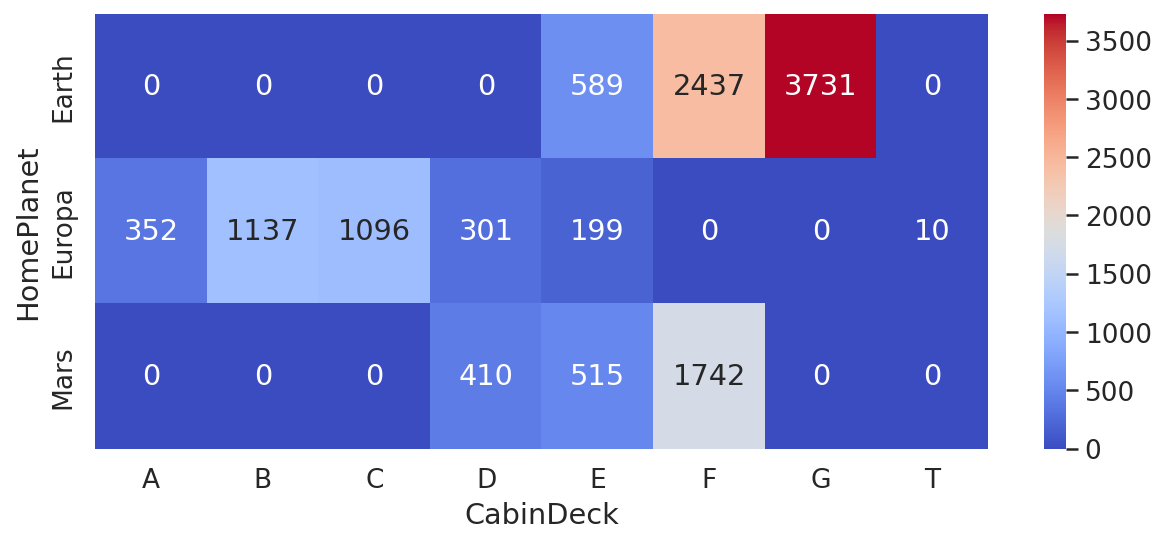

In [ ]:
plt.figure(figsize=(10,4))
sns.heatmap(CDHP_ct.T, annot = True, fmt = 'g', cmap = 'coolwarm')

💡**Insights**
* Passengers on decks A, B, C or T came from Europa.
* Passengers on deck G came from Earth.
* Passengers on decks D, E or F came from multiple planets.

In [ ]:
# Missing values before
HP_bef=data['HomePlanet'].isna().sum()

# Decks A, B, C or T came from Europa
data.loc[(data['HomePlanet'].isna()) & (data['CabinDeck'].isin(['A', 'B', 'C', 'T'])), 'HomePlanet']='Europa'

# Deck G came from Earth
data.loc[(data['HomePlanet'].isna()) & (data['CabinDeck']=='G'), 'HomePlanet']='Earth'

# Print number of missing values left
print('#HomePlanet missing values before:',HP_bef)
print('#HomePlanet missing values after:',data['HomePlanet'].isna().sum())


#HomePlanet missing values before: 157
#HomePlanet missing values after: 94


### Families and HomePlanet

In [ ]:
data.groupby(['Surname']).filter(lambda x: x['HomePlanet'].nunique()>1)

Empty DataFrame
Columns: [PassengerId, HomePlanet, CryoSleep, Destination, Age, VIP, RoomService, FoodCourt, ShoppingMall, Spa, VRDeck, Name, CabinDeck, CabinNumber, CabinSide, Cabin_region1, Cabin_region2, Cabin_region3, Cabin_region4, Cabin_region5, Cabin_region6, Cabin_region7, PassengerGroup, PassengerNumber, GroupSize, Solo, Firstname, Surname, FamilySize, Total_Expenditure, No_Expenditure, Luxury_Expenditure, Basic_Expenditure, AgeClass]
Index: []

[0 rows x 34 columns]

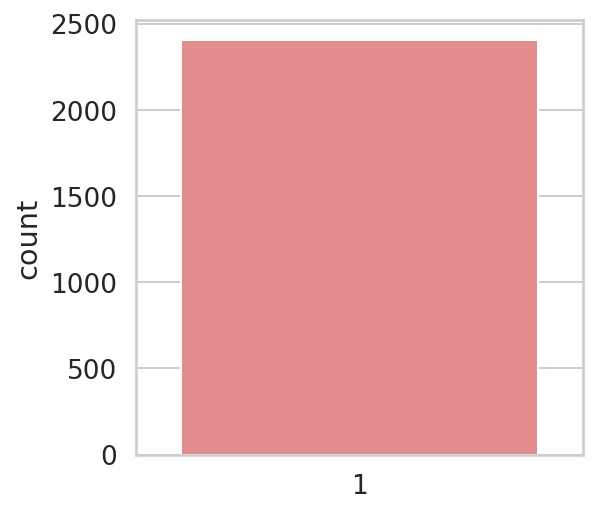

In [ ]:
FZHP_ct = pd.crosstab(data.Surname, data.HomePlanet)
plt.figure(figsize=(4,4))
sns.countplot((FZHP_ct>0).sum(axis =1))

💡 **Insight**
* There are no families with a different homeplanet; we can therefore fill homeplanet missing values according to that.

In [ ]:
# Missing values before
HP_bef=data['HomePlanet'].isna().sum()

# Passengers with missing HomePlanet and in a family with known HomePlanet
FZHP_index=data[data['HomePlanet'].isna()][(data[data['HomePlanet'].isna()]['Surname']).isin(FZHP_ct.index)].index

# Fill corresponding missing values
data.loc[FZHP_index,'HomePlanet']=data.iloc[FZHP_index,:]['Surname'].map(lambda x: FZHP_ct.idxmax(axis=1)[x])

# Print number of missing values left
print('#HomePlanet missing values before:',HP_bef)
print('#HomePlanet missing values after:',data['HomePlanet'].isna().sum())

#HomePlanet missing values before: 94
#HomePlanet missing values after: 10


In [ ]:
# Only 10 HomePlanet missing values left - let's look at them
data[data['HomePlanet'].isna()][['HomePlanet','Destination']]

HomePlanet  Destination
2274         NaN  TRAPPIST-1e
2631         NaN  TRAPPIST-1e
3091         NaN  TRAPPIST-1e
4548         NaN  TRAPPIST-1e
5762         NaN  TRAPPIST-1e
8969         NaN  TRAPPIST-1e
10583        NaN  TRAPPIST-1e
11913        NaN  TRAPPIST-1e
12551        NaN  TRAPPIST-1e
12725        NaN  TRAPPIST-1e

💡**Insights**
* Everyone left is heading towards TRAPPIST-1e. So let's look at the joint distribution of HomePlanet and Destination.

### HomePlanet and Destination

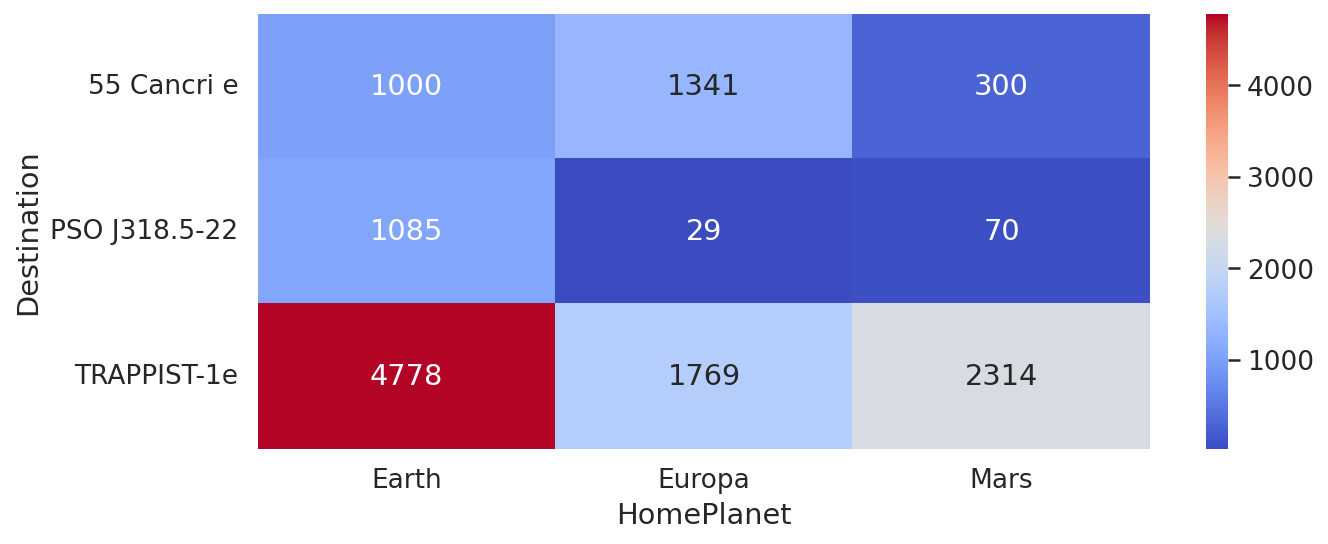

In [ ]:
# Joint distribution of HomePlanet and Destination
HPD_gb=data.groupby(['HomePlanet','Destination'])['Destination'].size().unstack().fillna(0)

# Heatmap of missing values
plt.figure(figsize=(10,4))
sns.heatmap(HPD_gb.T, annot=True, fmt='g', cmap='coolwarm')

💡**Insights**
* Most people heading towards TRAPPIST-1e came from Earth so it makes sense to guess they came from there. But remember from earlier, no one on deck D came from Earth so we need to filter these out.

In [ ]:
# Missing values before
HP_bef=data['HomePlanet'].isna().sum()

# Fill remaining HomePlanet missing values with Earth (if not on deck D) or Mars (if on Deck D)
data.loc[(data['HomePlanet'].isna()) & ~(data['CabinDeck']=='D'), 'HomePlanet']='Earth'
data.loc[(data['HomePlanet'].isna()) & (data['CabinDeck']=='D'), 'HomePlanet']='Mars'

# Print number of missing values left
print('#HomePlanet missing values before:',HP_bef)
print('#HomePlanet missing values after:',data['HomePlanet'].isna().sum())

#HomePlanet missing values before: 10
#HomePlanet missing values after: 0


## Filling Destination Missing Values

💡**Insight**
* From the correlation matrix (above)`Destination`is highly correlated to `CabinDeck`and `Surname`after `HomePlanet`.

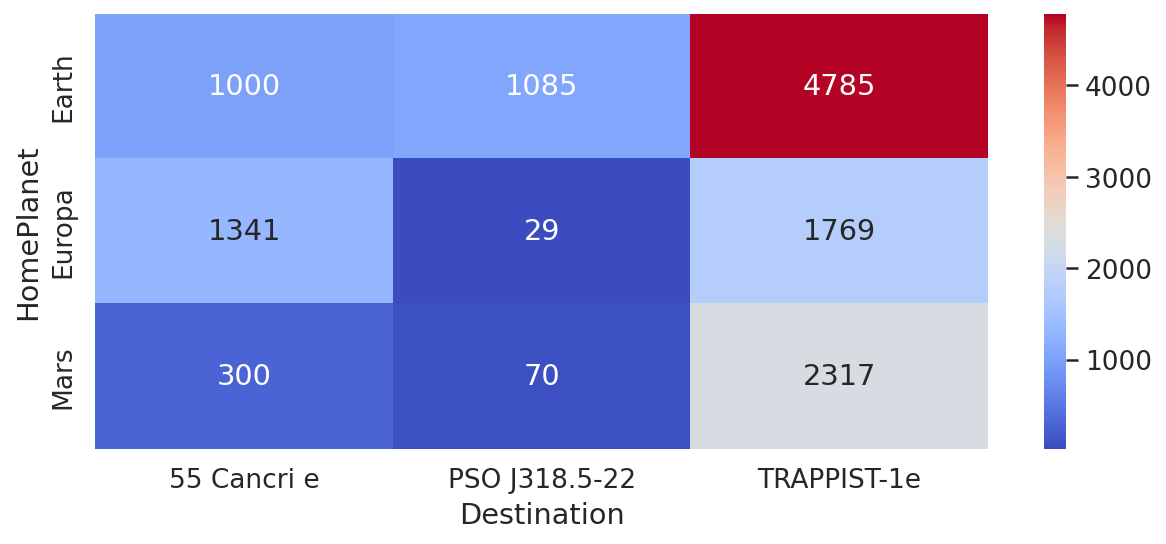

In [ ]:
DD_gb=data.groupby(['Destination','HomePlanet'])['HomePlanet'].size().unstack().fillna(0)

plt.figure(figsize=(10,4))
sns.heatmap(DD_gb.T, annot=True, fmt='g', cmap='coolwarm')

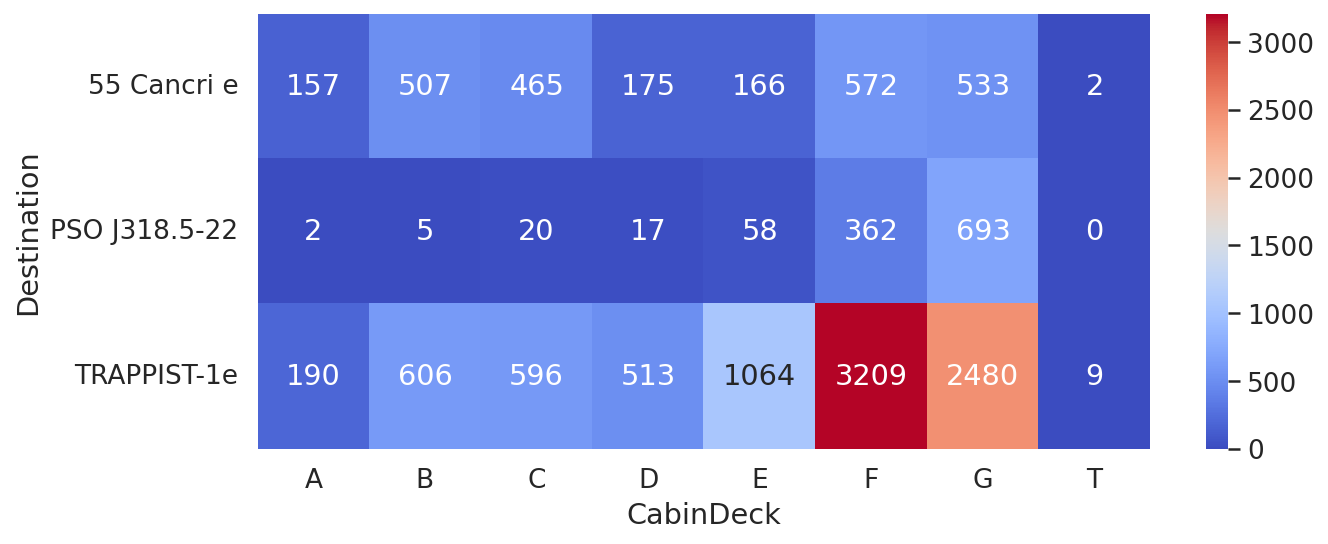

In [ ]:
DD_ct = pd.crosstab(data.CabinDeck, data.Destination)
plt.figure(figsize=(10,4))
sns.heatmap(DD_ct.T, annot=True, fmt='g', cmap='coolwarm')

💡**Insight**
* On all, the majority of passengers are heading towards "TRAPPIST-1e" therefore lets just impute the mode.

In [ ]:
# Missing values before
D_bef=data['Destination'].isna().sum()

# Fill missing Destination values with mode
data.loc[(data['Destination'].isna()), 'Destination']='TRAPPIST-1e'

# Print number of missing values left
print('#Destination missing values before:',D_bef)
print('#Destination missing values after:',data['Destination'].isna().sum())

#Destination missing values before: 274
#Destination missing values after: 0


## Filling Surname Missing Values

We're filling in missing surnames since we'll require them later to fill in missing data for other features. It also ensures that we can increase the accuracy of the family size feature.

### Surname and Group

Text(0.5, 1.0, 'Number of unique surnames by group')

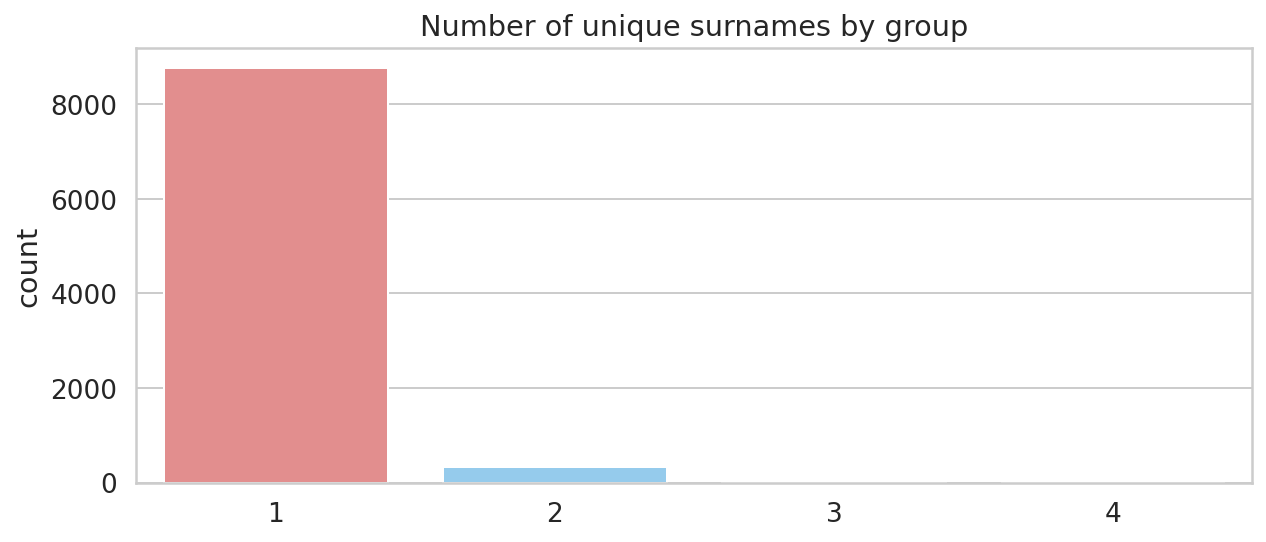

In [ ]:
# Joint distribution of Group and Surname
GSN_ct=pd.crosstab(data.PassengerGroup,data.Surname)
# Countplot of unique values
plt.figure(figsize=(10,4))
sns.countplot((GSN_ct>0).sum(axis=1))
plt.title('Number of unique surnames by group')

💡**Insights**
* The majority (83%) of groups contain only 1 family. So let's fill missing surnames according to the majority surname in that group.

In [ ]:
# Missing values before
SN_bef=data['Surname'].isna().sum()

# Passengers with missing Surname and in a PassengerGroup with known majority Surname
GSN_index=data[data['Surname'].isna()][(data[data['Surname'].isna()]['PassengerGroup']).isin(GSN_ct.index)].index

# Fill corresponding missing values
data.loc[GSN_index,'Surname']=data.iloc[GSN_index,:]['PassengerGroup'].map(lambda x: GSN_ct.idxmax(axis=1)[x])

# Print number of missing values left
print('#Surname missing values before:',SN_bef)
print('#Surname missing values after:',data['Surname'].isna().sum())

#Surname missing values before: 294
#Surname missing values after: 155


In [ ]:
# Replace NaN's with outliers (so we can use map)
data['Surname'].fillna('Unknown', inplace=True)

# Update family size feature
data['FamilySize']=data['Surname'].map(lambda x: data['Surname'].value_counts()[x])

# Put NaN's back in place of outliers
data.loc[data['Surname']=='Unknown','Surname']=np.nan

# Say unknown surname means no family
data.loc[data['FamilySize']>100,'FamilySize']=0

## Filling Cabin Missing Values

### Cabin Side and Group

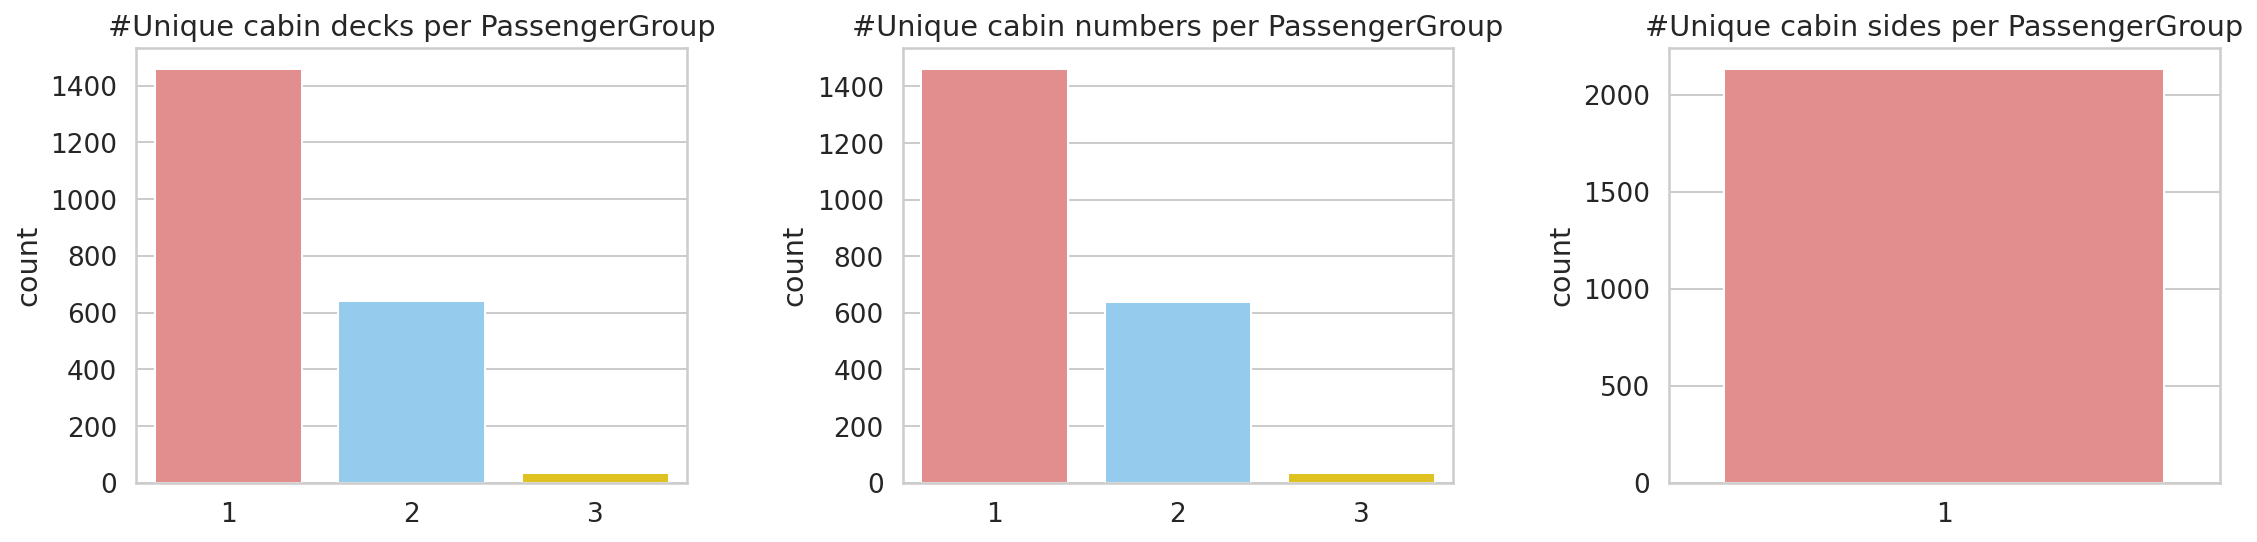

In [ ]:

# Joint distribution of PassengerGroup and Cabin features
GCD_gb=pd.crosstab(data[data['GroupSize']>1].PassengerGroup,data[data['GroupSize']>1].CabinDeck)
GCN_gb= pd.crosstab(data[data['GroupSize']>1].PassengerGroup,data[data['GroupSize']>1].CabinNumber)
GCS_gb =pd.crosstab(data[data['GroupSize']>1].PassengerGroup,data[data['GroupSize']>1].CabinSide)    

# Countplots
fig=plt.figure(figsize=(16,4))
plt.subplot(1,3,1)
sns.countplot((GCD_gb>0).sum(axis=1))
plt.title('#Unique cabin decks per PassengerGroup')

plt.subplot(1,3,2)
sns.countplot((GCN_gb>0).sum(axis=1))
plt.title('#Unique cabin numbers per PassengerGroup')

plt.subplot(1,3,3)
sns.countplot((GCS_gb>0).sum(axis=1))
plt.title('#Unique cabin sides per PassengerGroup')
fig.tight_layout()


💡**Insight**
* Everyone in the same PassengerGroup is also on the same CabinSide. 
* For CabinDeck and CabinNumber there is also a fairly good but not perfect correlation.

In [ ]:
# Missing values before
CS_bef=data['CabinSide'].isna().sum()

# Passengers with missing Cabin side and in a PassengerGroup with known Cabin side
GCS_index=data[data['CabinSide'].isna()][(data[data['CabinSide'].isna()]['PassengerGroup']).isin(GCS_gb.index)].index

# Fill corresponding missing values
data.loc[GCS_index,'CabinSide']=data.iloc[GCS_index,:]['PassengerGroup'].map(lambda x: GCS_gb.idxmax(axis=1)[x])

# Print number of missing values left
print('#CabinSide missing values before:',CS_bef)
print('#CabinSide missing values after:',data['CabinSide'].isna().sum())

#CabinSide missing values before: 299
#CabinSide missing values after: 162


### CabinSide and Surname

Text(0.5, 1.0, 'Ratio of cabin side by surname')

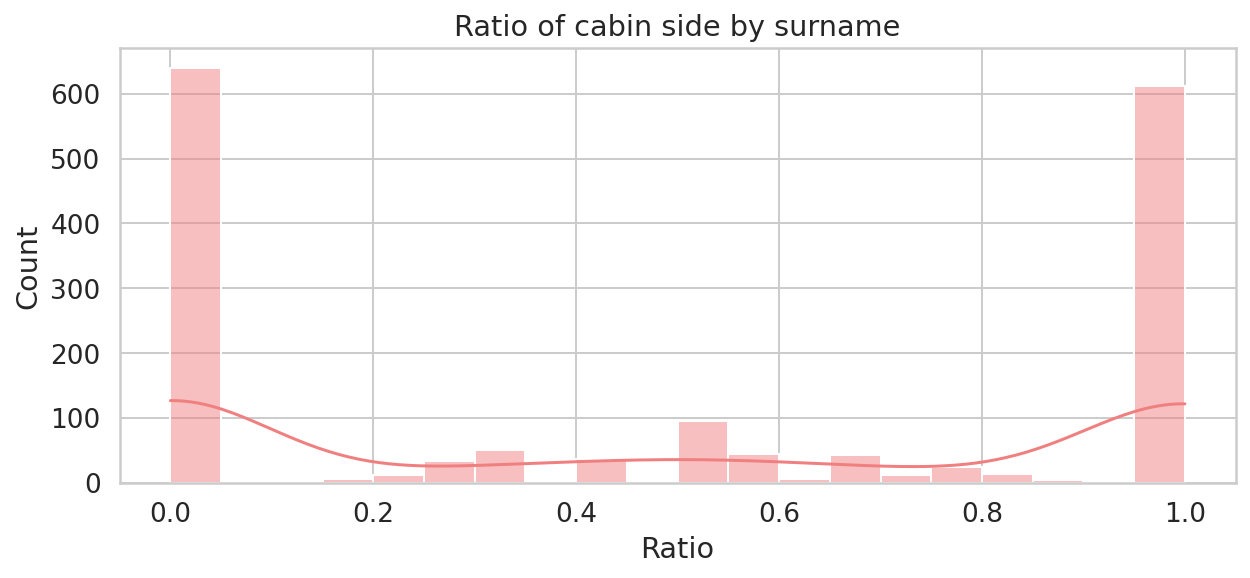

In [ ]:
SCS_gb=pd.crosstab(data[data['GroupSize']>1].Surname,data[data['GroupSize']>1].CabinSide)

# Ratio of sides
SCS_gb['Ratio']=SCS_gb['P']/(SCS_gb['P']+SCS_gb['S'])

# Histogram of ratio
plt.figure(figsize=(10,4))
sns.histplot(SCS_gb['Ratio'], kde=True, binwidth=0.05)
plt.title('Ratio of cabin side by surname')

In [ ]:
# Print proportion
print('Percentage of families all on the same cabin side:', 100*np.round((SCS_gb['Ratio'].isin([0,1])).sum()/len(SCS_gb),3),'%')

# Another view of the same information
SCS_gb.head()

Percentage of families all on the same cabin side: 76.7 %


CabinSide   P  S  Ratio
Surname                
Acobson     0  3    0.0
Acobsond    3  0    1.0
Adavisons   6  0    1.0
Admingried  0  4    0.0
Aginge      3  0    1.0

💡**Insights**
* This demonstrates that families prefer to be on the same cabin side (in fact, 77% of families are totally on the same side).

In [ ]:
# Missing values before
CS_bef=data['CabinSide'].isna().sum()

# Drop ratio column
SCS_gb.drop('Ratio', axis=1, inplace=True)

# Passengers with missing Cabin side and in a family with known Cabin side
SCS_index=data[data['CabinSide'].isna()][(data[data['CabinSide'].isna()]['Surname']).isin(SCS_gb.index)].index

# Fill corresponding missing values
data.loc[SCS_index,'CabinSide']=data.iloc[SCS_index,:]['Surname'].map(lambda x: SCS_gb.idxmax(axis=1)[x])

# Drop surname (we don't need it anymore)
#data.drop('Surname', axis=1, inplace=True)

# Print number of missing values left
print('#CabinSide missing values before:',CS_bef)
print('#CabinSide missing values after:',data['CabinSide'].isna().sum())

#CabinSide missing values before: 162
#CabinSide missing values after: 66


In [ ]:
# Value counts
data['CabinSide'].value_counts()

S    6504
P    6400
Name: CabinSide, dtype: int64

An outlier will be used to fill in the last few missing data. This is due to the fact that we are genuinely unsure of which of the two (balanced) sides to allocate.

In [ ]:
# Missing values before
CS_bef=data['CabinSide'].isna().sum()

# Fill remaining missing values with outlier
data.loc[data['CabinSide'].isna(),'CabinSide']='Z'

# Print number of missing values left
print('#CabinSide missing values before:',CS_bef)
print('#CabinSide missing values after:',data['CabinSide'].isna().sum())

#CabinSide missing values before: 66
#CabinSide missing values after: 0


SInce groups tend do be on the same cabin deck:

Text(0.5, 1.0, '#Unique cabin decks per PassengerGroup')

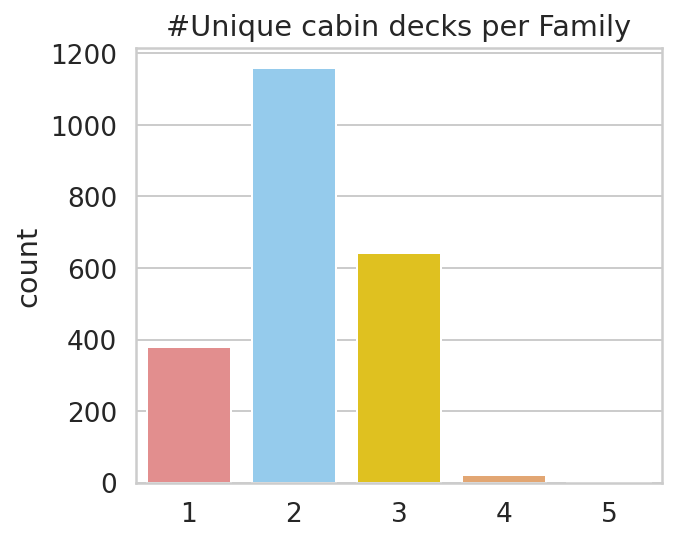

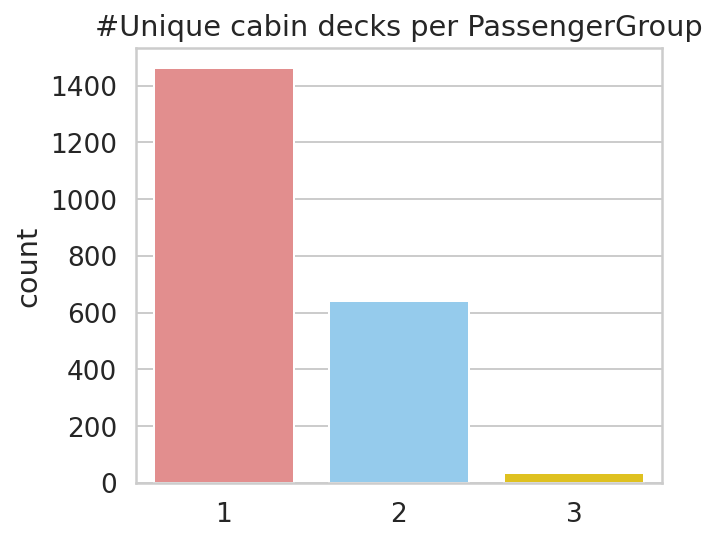

In [ ]:
GCD_gb01=pd.crosstab(data[data['FamilySize']>1].Surname,data[data['FamilySize']>1].CabinDeck)
GCD_gb02=pd.crosstab(data[data['GroupSize']>1].PassengerGroup,data[data['GroupSize']>1].CabinDeck)

fig=plt.figure(figsize=(16,4))
plt.subplot(1,3,1)
sns.countplot((GCD_gb01>0).sum(axis=1))
plt.title('#Unique cabin decks per Family')

fig=plt.figure(figsize=(16,4))
plt.subplot(1,3,2)
sns.countplot((GCD_gb02>0).sum(axis=1))
plt.title('#Unique cabin decks per PassengerGroup')

In [ ]:
# Missing values before
CD_bef=data['CabinDeck'].isna().sum()

# Passengers with missing Cabin deck and in a PassengerGroup with known majority Cabin deck
GCD_index=data[data['CabinDeck'].isna()][(data[data['CabinDeck'].isna()]['PassengerGroup']).isin(GCD_gb.index)].index

# Fill corresponding missing values
data.loc[GCD_index,'CabinDeck']=data.iloc[GCD_index,:]['PassengerGroup'].map(lambda x: GCD_gb.idxmax(axis=1)[x])

# Print number of missing values left
print('#CabinDeck missing values before:',CD_bef)
print('#CabinDeck missing values after:',data['CabinDeck'].isna().sum())

#CabinDeck missing values before: 299
#CabinDeck missing values after: 162


### CabinDeck and HomePlanet

In [ ]:
pd.crosstab([data.HomePlanet, data.Destination, data.Solo],data.CabinDeck )

CabinDeck                        A    B    C    D    E     F     G  T
HomePlanet Destination   Solo                                        
Earth      55 Cancri e   0       0    0    0    0   20    90   272  0
                         1       0    0    0    0   47   289   269  0
           PSO J318.5-22 0       0    0    0    0   18    67   230  0
                         1       0    0    0    0   25   262   466  0
           TRAPPIST-1e   0       0    0    0    0  133   438  1075  0
                         1       0    0    0    0  358  1350  1509  0
Europa     55 Cancri e   0      96  377  313   59   35     0     0  2
                         1      67  141  159   46   34     0     0  0
           PSO J318.5-22 0       2    5   11    0    0     0     0  0
                         1       0    0   10    0    0     0     0  0
           TRAPPIST-1e   0     152  459  428  120   53     0     0  1
                         1      44  179  201   84   82     0     0  8
Mars       55 Cancri e   0       0    0    0   32   15   104     0  0
                         1       0    0    0   40   16    92     0  0
           PSO J318.5-22 0       0    0    0    8    9    14     0  0
                         1       0    0    0    9    7    21     0  0
           TRAPPIST-1e   0       0    0    0  168  219   798     0  0
                         1       0    0    0  164  263   743     0  0

In [ ]:
pd.crosstab([data.HomePlanet, data.Destination, data.Solo],data.CabinDeck ).loc['Mars'].sum(axis = 0).to_frame()

0
CabinDeck      
A             0
B             0
C             0
D           421
E           529
F          1772
G             0
T             0

💡**Insights**
* Passengers from Mars are most likely in deck F.

In [ ]:
# Joint distribution
data.groupby(['HomePlanet','Solo','CabinDeck'])['CabinDeck'].size().unstack().fillna(0).loc['Europa']

CabinDeck      A      B      C      D      E    F    G    T
Solo                                                       
0          250.0  841.0  752.0  179.0   88.0  0.0  0.0  3.0
1          111.0  320.0  370.0  130.0  116.0  0.0  0.0  8.0

💡**Insights**
* Passengers from Europa are (more or less) most likely in deck C if travelling solo and deck B otherwise.

In [ ]:

pd.crosstab([data.HomePlanet, data.Destination, data.Solo],data.CabinDeck ).loc['Earth'].sum(axis = 0)

CabinDeck
A       0
B       0
C       0
D       0
E     601
F    2496
G    3821
T       0
dtype: int64

💡**Insights**
* Passengers from Earth are (more or less) most likely in deck G

In [ ]:
# Missing values before
CD_bef=data['CabinDeck'].isna().sum()

# Fill missing values using the mode
na_rows_CD=data.loc[data['CabinDeck'].isna(),'CabinDeck'].index
data.loc[data['CabinDeck'].isna(),'CabinDeck']=data.groupby(['HomePlanet','Destination','Solo'])['CabinDeck'].transform(lambda x: x.fillna(pd.Series.mode(x)[0]))[na_rows_CD]

# Print number of missing values left
print('#CabinDeck missing values before:',CD_bef)
print('#CabinDeck missing values after:',data['CabinDeck'].isna().sum())

#CabinDeck missing values before: 162
#CabinDeck missing values after: 0


### CabinNumber and CabinDeck

Text(0.5, 1.0, 'CabinNumber vs group coloured by group')

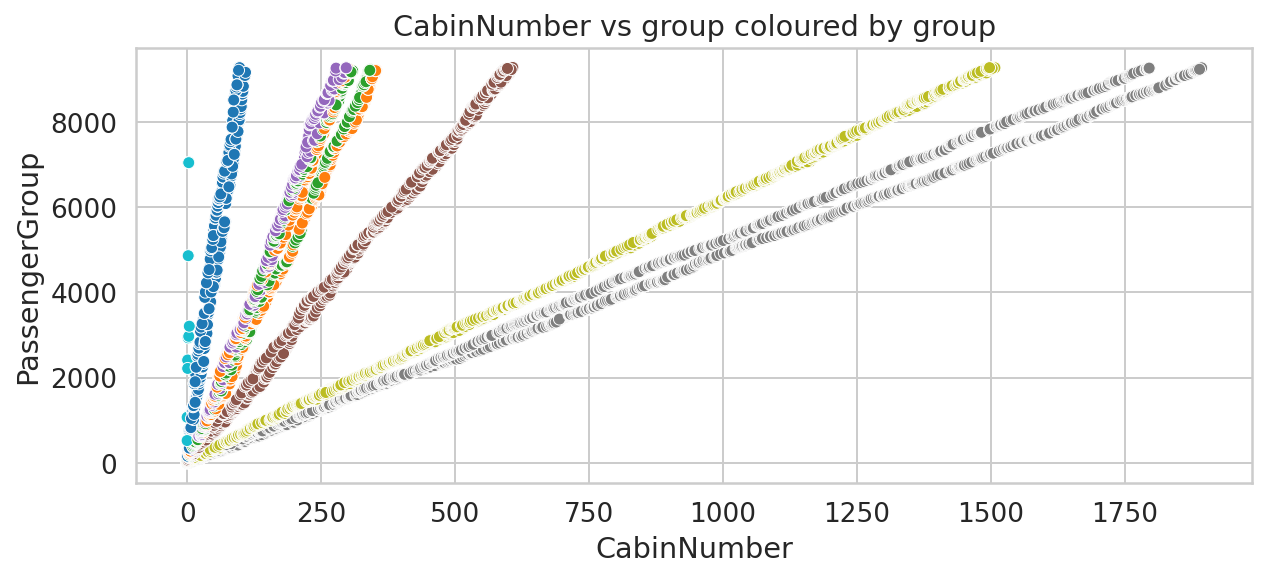

In [ ]:
# Scatterplot
plt.figure(figsize=(10,4))
sns.scatterplot(x=data['CabinNumber'], y=data['PassengerGroup'], c=LabelEncoder().fit_transform(data.loc[~data['CabinNumber'].isna(),'CabinDeck']), cmap='tab10')
plt.title('CabinNumber vs group coloured by group')

💡**Insight**
* On a deck-by-deck basis, there is a linear relationship between the cabin number and group number. In order to obtain a rough cabin number, we may extrapolate the missing cabin numbers using linear regression on a deck-by-deck basis.

In [ ]:
# Missing values before
CN_bef=data['CabinNumber'].isna().sum()

# Extrapolate linear relationship on a deck by deck basis
for deck in ['A', 'B', 'C', 'D', 'E', 'F', 'G']:
    # Features and labels
    X_CN=data.loc[~(data['CabinNumber'].isna()) & (data['CabinDeck']==deck),'PassengerGroup']
    y_CN=data.loc[~(data['CabinNumber'].isna()) & (data['CabinDeck']==deck),'CabinNumber']
    X_test_CN=data.loc[(data['CabinNumber'].isna()) & (data['CabinDeck']==deck),'PassengerGroup']

    # Linear regression
    model_CN=LinearRegression()
    model_CN.fit(X_CN.values.reshape(-1, 1), y_CN)
    preds_CN=model_CN.predict(X_test_CN.values.reshape(-1, 1))
    
    # Fill missing values with predictions
    data.loc[(data['CabinNumber'].isna()) & (data['CabinDeck']==deck),'CabinNumber']=preds_CN.astype(int)

# Print number of missing values left
print('#CabinNumber missing values before:',CN_bef)
print('#CabinNumber missing values after:',data['CabinNumber'].isna().sum())

#CabinNumber missing values before: 299
#CabinNumber missing values after: 0


In [ ]:
 #One-hot encode cabin regions
data['Cabin_region1']=(data['CabinNumber']<300).astype(int)
data['Cabin_region2']=((data['CabinNumber']>=300) & (data['CabinNumber']<600)).astype(int)
data['Cabin_region3']=((data['CabinNumber']>=600) & (data['CabinNumber']<900)).astype(int)
data['Cabin_region4']=((data['CabinNumber']>=900) & (data['CabinNumber']<1200)).astype(int)
data['Cabin_region5']=((data['CabinNumber']>=1200) & (data['CabinNumber']<1500)).astype(int)
data['Cabin_region6']=((data['CabinNumber']>=1500) & (data['CabinNumber']<1800)).astype(int)
data['Cabin_region7']=(data['CabinNumber']>=1800).astype(int)

## Filling VIP Missing Values

### VIP and AgeClass

In [ ]:
pd.crosstab(data.AgeClass,data.VIP)

VIP       False  True
AgeClass             
Baby        457     0
Kid         888     0
Teen       2675     5
Adult      7814   255
Senior      308    11

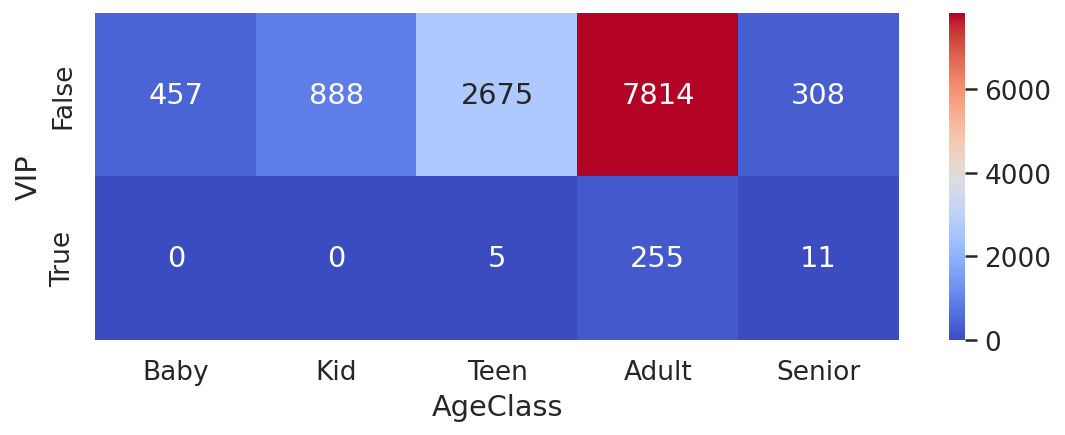

In [ ]:
plt.figure(figsize=(9,3))
sns.heatmap(pd.crosstab(data.AgeClass,data.VIP).T, annot = True, fmt = 'g',cmap = 'coolwarm')

In [ ]:
# Missing values before
V_bef=data['VIP'].isna().sum()

data.loc[(data['VIP'].isna()) & (data['AgeClass'].isin(['Baby', 'Kid', 'Teen', 'Senior'])), 'VIP']=False

#V_index = data[data['VIP'].isna()][(data[data['VIP'].isna()])[''].isin(V_bef.index)].index
# Fill missing values with mode
#data.loc[data['VIP'].isna(),'VIP']=False

# Print number of missing values left
print('#VIP missing values before:',V_bef)
print('#VIP missing values after:',data['VIP'].isna().sum())

#VIP missing values before: 296
#VIP missing values after: 193


### VIP and HomePlanet

In [ ]:
pd.crosstab(data.HomePlanet,data.VIP,margins = True).round(3)

VIP         False  True    All
HomePlanet                    
Earth        6937     0   6937
Europa       2953   179   3132
Mars         2614    94   2708
All         12504   273  12777

💡**Insight**
* No passengers coming from Earth are VIP.

In [ ]:
# Missing values before
V_bef=data['VIP'].isna().sum()

data.loc[(data['VIP'].isna()) & (data['HomePlanet'].isin(['Earth'])), 'VIP']=False

#V_index = data[data['VIP'].isna()][(data[data['VIP'].isna()])[''].isin(V_bef.index)].index
# Fill missing values with mode
#data.loc[data['VIP'].isna(),'VIP']=False

# Print number of missing values left
print('#VIP missing values before:',V_bef)
print('#VIP missing values after:',data['VIP'].isna().sum())

#VIP missing values before: 193
#VIP missing values after: 111


In [ ]:
len(data[(data['VIP'].isna())&(data['No_Expenditure'])==True])

51

In [ ]:
data.groupby(['VIP'])[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','Total_Expenditure',	'No_Expenditure',	'Luxury_Expenditure',	'Basic_Expenditure']].mean().round(2)

RoomService  FoodCourt  ShoppingMall     Spa   VRDeck  \
VIP                                                            
False       216.30     415.33        173.34  291.28   283.13   
True        486.35    1793.65        273.68  932.85  1207.20   

       Total_Expenditure  No_Expenditure  Luxury_Expenditure  \
VIP                                                            
False            1349.33            0.43              773.99   
True             4595.54            0.13             2574.65   

       Basic_Expenditure  
VIP                       
False             575.34  
True             2020.89

💡**Insight**
* Most VIP customers have spent something.

In [ ]:
# Missing values before
V_bef=data['VIP'].isna().sum()

data.loc[(data['VIP'].isna()) & (data['No_Expenditure'] == True), 'VIP']=False



# Print number of missing values left
print('#VIP missing values before:',V_bef)
print('#VIP missing values after:',data['VIP'].isna().sum())

#VIP missing values before: 111
#VIP missing values after: 60


In [ ]:
pd.crosstab(data.PassengerNumber,data.VIP)

VIP              False  True
PassengerNumber             
1                 9057   183
2                 2061    58
3                  821    17
4                  325    11
5                  183     1
6                  105     3
7                   66     0
8                   19     0

💡**Insight**:
* Most VIP passangers have PassengerNum 1, or 2.

In [ ]:
# Missing values before
V_bef=data['VIP'].isna().sum()

data.loc[(data['VIP'].isna()) & (data['PassengerNumber'].isin([1,2,3,4])), 'VIP']=True



#V_index = data[data['VIP'].isna()][(data[data['VIP'].isna()])[''].isin(V_bef.index)].index
# Fill missing values with mode
#data.loc[data['VIP'].isna(),'VIP']=False

# Print number of missing values left
print('#VIP missing values before:',V_bef)
print('#VIP missing values after:',data['VIP'].isna().sum())

#VIP missing values before: 60
#VIP missing values after: 0


## Filling Age Missing Values

In [ ]:
# Joint distribution
data.groupby(['HomePlanet','No_Expenditure','Solo','CabinDeck'])['Age'].median().unstack().fillna(0)

CabinDeck                          A     B     C     D     E     F     G     T
HomePlanet No_Expenditure Solo                                                
Earth      0              0      0.0   0.0   0.0   0.0  24.0  25.0  28.0   0.0
                          1      0.0   0.0   0.0   0.0  25.0  24.0  26.0   0.0
           1              0      0.0   0.0   0.0   0.0   7.0  16.0   8.0   0.0
                          1      0.0   0.0   0.0   0.0  21.0  21.5  23.0   0.0
Europa     0              0     35.0  34.0  33.0  33.0  34.0   0.0   0.0  44.0
                          1     35.0  36.0  35.5  34.0  35.0   0.0   0.0  35.0
           1              0     30.0  27.0  28.5  27.0  28.0   0.0   0.0   0.0
                          1     37.5  34.0  35.0  31.0  33.0   0.0   0.0   0.0
Mars       0              0      0.0   0.0   0.0  30.0  29.0  29.0   0.0   0.0
                          1      0.0   0.0   0.0  31.0  28.5  30.0   0.0   0.0
           1              0      0.0   0.0   0.0  29.5  26.0  18.0   0.0   0.0
                          1      0.0   0.0   0.0  33.0  30.0  29.5   0.0   0.0

💡**Insights**
* We will impute missing values based on the median of these subgroups because age varies across various characteristics, including HomePlanet, group size, spending, and cabin deck.

In [ ]:
expense_cols = ['FoodCourt', 'ShoppingMall', 'RoomService', 'Spa', 'VRDeck']

In [ ]:
# Missing values before
A_bef=data[expense_cols].isna().sum().sum()

# Fill missing values using the median
na_rows_A=data.loc[data['Age'].isna(),'Age'].index
data.loc[data['Age'].isna(),'Age']=data.groupby(['HomePlanet','No_Expenditure','Solo','CabinDeck'])['Age'].transform(lambda x: x.fillna(x.median()))[na_rows_A]

# Print number of missing values left
print('#Age missing values before:',A_bef)
print('#Age missing values after:',data['Age'].isna().sum())

#Age missing values before: 1410
#Age missing values after: 0


In [ ]:
data = discretization_age(data)

## Filling CyroSleep Missing Values

### CyroSleep and No_Expenditure

Makes sense that passengers that were confined, did not spend anything.

In [ ]:
pd.crosstab(data.No_Expenditure,data.CryoSleep)

CryoSleep       False  True
No_Expenditure             
0                7339     0
1                 740  4581

In [ ]:
# Missing values before
CSL_bef=data['CryoSleep'].isna().sum()

# Fill missing values using the mode
na_rows_CSL=data.loc[data['CryoSleep'].isna(),'CryoSleep'].index
data.loc[data['CryoSleep'].isna(),'CryoSleep']=data.groupby(['No_Expenditure'])['CryoSleep'].transform(lambda x: x.fillna(pd.Series.mode(x)[0]))[na_rows_CSL]

# Print number of missing values left
print('#CryoSleep missing values before:',CSL_bef)
print('#CryoSleep missing values after:',data['CryoSleep'].isna().sum())

#CryoSleep missing values before: 310
#CryoSleep missing values after: 0


## Filling Expenditure Missing Values

### Expenditure and CyroSleep

In [ ]:

expense_cols = ["FoodCourt", "ShoppingMall", "RoomService", "Spa", "VRDeck"]

In [ ]:
print('Maximum expenditure of passengers in CryoSleep:',data.loc[data['CryoSleep']==True,expense_cols].sum(axis=1).max())

Maximum expenditure of passengers in CryoSleep: 0.0


In [ ]:
# Missing values before
E_bef=data[expense_cols].isna().sum().sum()

# CryoSleep has no expenditure
for col in expense_cols:
    data.loc[(data[col].isna()) & (data['CryoSleep']==True), col]=0

# Print number of missing values left
print('#Expenditure missing values before:',E_bef)
print('#Expenditure missing values after:',data[expense_cols].isna().sum().sum())

#Expenditure missing values before: 1410
#Expenditure missing values after: 866


### Expenditure and other

In [ ]:
# Joint distribution
data.groupby(['HomePlanet','Solo','AgeClass'])['Total_Expenditure'].mean().unstack().fillna(0).round(1)

AgeClass         Baby     Kid    Teen   Adult  Senior
HomePlanet Solo                                      
Earth      0      0.0    55.3   764.9   763.9   994.5
           1      0.0   385.4   757.3   789.3   885.3
Europa     0      0.0   749.5  1809.0  3666.4  3225.3
           1      0.0     0.0  2401.9  3772.2  3993.5
Mars       0      0.0   256.7  1072.2  1199.6  1617.2
           1      0.0  1106.3  1184.9  1100.9  1113.2

In [ ]:
# Missing values before
E_bef=data[expense_cols].isna().sum().sum()

# Fill remaining missing values using the median
for col in expense_cols:
    na_rows=data.loc[data[col].isna(),col].index
    data.loc[data[col].isna(),col]=data.groupby(['HomePlanet','Solo','AgeClass'])[col].transform(lambda x: x.fillna(x.mean()))[na_rows]
    
# Print number of missing values left
print('#Expenditure missing values before:',E_bef)
print('#Expenditure missing values after:',data[expense_cols].isna().sum().sum())

#Expenditure missing values before: 866
#Expenditure missing values after: 0


In [ ]:
# Update expenditure and no_spending
data = add_totalexpenditure(data)
data = add_luxury_basic_expenditure(data)
#data['Total_Expenditure']=data[expenditure_cols].sum(axis=1)
#data['No_Expenditure']=(data['Total_Expenditure']==0).astype(int)

In [ ]:
data.isna().sum()

PassengerId             0
HomePlanet              0
CryoSleep               0
Destination             0
Age                     0
VIP                     0
RoomService             0
FoodCourt               0
ShoppingMall            0
Spa                     0
VRDeck                  0
Name                  294
CabinDeck               0
CabinNumber             0
CabinSide               0
Cabin_region1           0
Cabin_region2           0
Cabin_region3           0
Cabin_region4           0
Cabin_region5           0
Cabin_region6           0
Cabin_region7           0
PassengerGroup          0
PassengerNumber         0
GroupSize               0
Solo                    0
Firstname             294
Surname               155
FamilySize              0
Total_Expenditure       0
No_Expenditure          0
Luxury_Expenditure      0
Basic_Expenditure       0
AgeClass                0
dtype: int64

# 5. Saving Imputed and Cleaned Data

In [ ]:
data = data.set_index('PassengerId')

In [ ]:
data.to_csv('ready_data/full_data2.csv')

In [ ]:
data.nunique()

HomePlanet                3
CryoSleep                 2
Destination               3
Age                      83
VIP                       2
RoomService            1594
FoodCourt              1973
ShoppingMall           1385
Spa                    1697
VRDeck                 1660
Name                  12629
CabinDeck                 8
CabinNumber            1895
CabinSide                 3
Cabin_region1             2
Cabin_region2             2
Cabin_region3             2
Cabin_region4             2
Cabin_region5             2
Cabin_region6             2
Cabin_region7             2
PassengerGroup         9280
PassengerNumber           8
GroupSize                 8
Solo                      2
Firstname              2883
Surname                2406
FamilySize               20
Total_Expenditure      3463
No_Expenditure            2
Luxury_Expenditure     3229
Basic_Expenditure      2658
AgeClass                  5
dtype: int64

In [ ]:
y=df_train['Transported'].astype('bool').astype(int)
X=data[data.index.isin(df_train.index)].copy()
X_test=data[data.index.isin(df_test.index)].copy()

print(y.shape)
print(X.shape)
print(X_test.shape)

(8693,)
(8693, 33)
(4277, 33)


In [ ]:
# train_data = X
# train_data['Transported'] = y

# test_data = X_test

# print(train_data.shape)
# print(test_data.shape)

In [ ]:
#train_data.to_csv('ready_data/train_data.csv')
#test_data.to_csv('ready_data/test_data.csv')


# 7. Reading the Cleaned Data Sets 


In [ ]:
RANDOM_STATE = 2022
SAMPLE_SIZE = 1.0
TEST_SIZE = 0.3
SIGNICIFANT_LEVEL = 0.05


CLEAN_TRAIN_PATH = 'ready_data/train_data.csv'
CLEAN_TEST_PATH = 'ready_data/test_data.csv'

INDEX = 'PassengerId'
TARGET = 'Transported'
NUM_FOLDS = 3
N_CLUSTERS = 5

SUBMISSION_FILE = 'submissions/submission_12.csv'

In [ ]:
def read_clean_data(clean_train_path = CLEAN_TRAIN_PATH, clean_test_path = CLEAN_TEST_PATH):
  df_train = pd.read_csv(CLEAN_TRAIN_PATH, index_col=INDEX)
  df_test = pd.read_csv(CLEAN_TEST_PATH, index_col=INDEX)
  return df_train, df_test



In [ ]:
df_train, df_test = read_clean_data()

print('df_train set shape:', df_train.shape)
print('df_test set shape:', df_test.shape)
df_train.head()

df_train set shape: (8693, 34)
df_test set shape: (4277, 33)


HomePlanet  CryoSleep  Destination   Age    VIP  RoomService  \
PassengerId                                                                
0001_01         Europa      False  TRAPPIST-1e  39.0  False          0.0   
0002_01          Earth      False  TRAPPIST-1e  24.0  False        109.0   
0003_01         Europa      False  TRAPPIST-1e  58.0   True         43.0   
0003_02         Europa      False  TRAPPIST-1e  33.0  False          0.0   
0004_01          Earth      False  TRAPPIST-1e  16.0  False        303.0   

             FoodCourt  ShoppingMall     Spa  VRDeck  ... Solo Firstname  \
PassengerId                                           ...                  
0001_01            0.0           0.0     0.0     0.0  ...    1     Maham   
0002_01            9.0          25.0   549.0    44.0  ...    1    Juanna   
0003_01         3576.0           0.0  6715.0    49.0  ...    0    Altark   
0003_02         1283.0         371.0  3329.0   193.0  ...    0     Solam   
0004_01           70.0         151.0   565.0     2.0  ...    1     Willy   

                 Surname FamilySize  Total_Expenditure  No_Expenditure  \
PassengerId                                                              
0001_01        Ofracculy          4                0.0               1   
0002_01            Vines          4              736.0               0   
0003_01           Susent          7            10383.0               0   
0003_02           Susent          7             5176.0               0   
0004_01      Santantines          9             1091.0               0   

             Luxury_Expenditure  Basic_Expenditure  AgeClass  Transported  
PassengerId                                                                
0001_01                     0.0                0.0     Adult            0  
0002_01                   702.0               34.0     Adult            1  
0003_01                  6807.0             3576.0     Adult            0  
0003_02                  3522.0             1654.0     Adult            0  
0004_01                   870.0              221.0      Teen            1  

[5 rows x 34 columns]

In [ ]:
df_train_orig = df_train.copy()
df_test_orig = df_test.copy()


# 6. Running the Baseline Model

**FunctionTransformer to convert Binary cools to int**

In [ ]:
def to_bool(series):
  return series.astype('bool').astype(int)

bool_transformer = FunctionTransformer(to_bool)

**Feature Engineering Pipeline**

In [ ]:
droped_features = ['CabinNumber','PassengerGroup',
             'GroupSize','Name', 'Firstname', 'Surname', 'AgeClass']

categorical_features = ['HomePlanet','Destination','CabinDeck','CabinSide']

preprocess_1 = make_column_transformer(
    ("drop",droped_features),
    (OneHotEncoder(handle_unknown="ignore", sparse=False),categorical_features),
    (bool_transformer,['CryoSleep','VIP']),
     remainder = MinMaxScaler(),

)

## **Splitting into train and validation set**

In [ ]:
y=df_train['Transported'].astype('bool').astype(int)
X=df_train.drop(columns='Transported')

X_test=df_test

print(y.shape)
print(X.shape)
print(X_test.shape)

(8693,)
(8693, 33)
(4277, 33)


In [ ]:
X_train, X_val, y_train, y_val = train_test_split(
            X, y, test_size=0.20, random_state=42,stratify=y)
print("The shape of validation data:{} and {} ".format(X_val.shape,y_val.shape))
print("The shape of training data:{} and {} ".format(X_train.shape,y_train.shape))

The shape of validation data:(1739, 33) and (1739,) 
The shape of training data:(6954, 33) and (6954,) 


### Naive Bayes Classifier First Baseline Model 

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
nb_pipe = make_pipeline(
    preprocess_1,
    MultinomialNB()
)

**Tran Valid Split**

In [ ]:
nb_pipe.fit(X_train, y_train)

accuracy_score(y_val, nb_pipe.predict(X_val)).round(3)

0.744

**Cross Validation**

In [ ]:
print("Accuracy using Cross Validation KNN classifier = {0:.3f}".format(
    np.mean(cross_val_score(nb_pipe, X, y, scoring = 'accuracy'))))

Accuracy using Cross Validation KNN classifier = 0.735


💡**Insight**
* As you see, this time we got lucky with the splitting and it leading to inflated peformance metric. Nevertheless, we use this to have a look at the classification report.

In [ ]:
target_names = ['Transported','Not Transported']
labels = [1,0]
report = classification_report(y_val,nb_pipe.predict(X_val),target_names=target_names,labels = labels)
print(report)

                 precision    recall  f1-score   support

    Transported       0.77      0.71      0.73       876
Not Transported       0.72      0.78      0.75       863

       accuracy                           0.74      1739
      macro avg       0.75      0.74      0.74      1739
   weighted avg       0.75      0.74      0.74      1739



In [ ]:
cm = confusion_matrix(y_val,nb_pipe.predict(X_val))
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
cm.diagonal().round(3)

array([0.782, 0.705])

  💡**Insight**
 * Transported are more accurately predicted than those not transported.


### KNN Nearest Nieghbour Classifier

We run the supervised classification non-parametric algorithim KNN, trying different parameters of k. kis a parameter that refers to the number of nearest neighbors to include in the majority of the voting process.

It simply calculates the distance of a new data point to all other training data points. The distance can be of any type e.g Euclidean or Manhattan etc. Therefore, it is important to SCALE, otherwuse algorithim fooled by differences in scales.. It then selects the K-nearest data points, where K can be any integer. Finally it assigns the data point to the class to which the majority of the K data points belong.

How you define the similarity is the main idea (main hyperparameter) and the number of data points (k) you want to consider. The default similarity metric distance metric is minkowski in scikit-learn, and with p=2 is equivalent to the standard Euclidean metric, which is the one that we use.

In [ ]:
knn_pipe = make_pipeline(
    preprocess_1,
    KNeighborsClassifier()
)


**Train Valid Split**

In [ ]:
knn_pipe.fit(X_train, y_train)

accuracy_score(y_val, knn_pipe.predict(X_val)).round(3)

0.741

**Cross Validation**

In [ ]:
print("Accuracy using Cross Validation KNN classifier = {0:.3f}".format(
    np.mean(cross_val_score(knn_pipe, X, y, scoring = 'accuracy'))))

Accuracy using Cross Validation KNN classifier = 0.731


Preliminary model score:
0.748


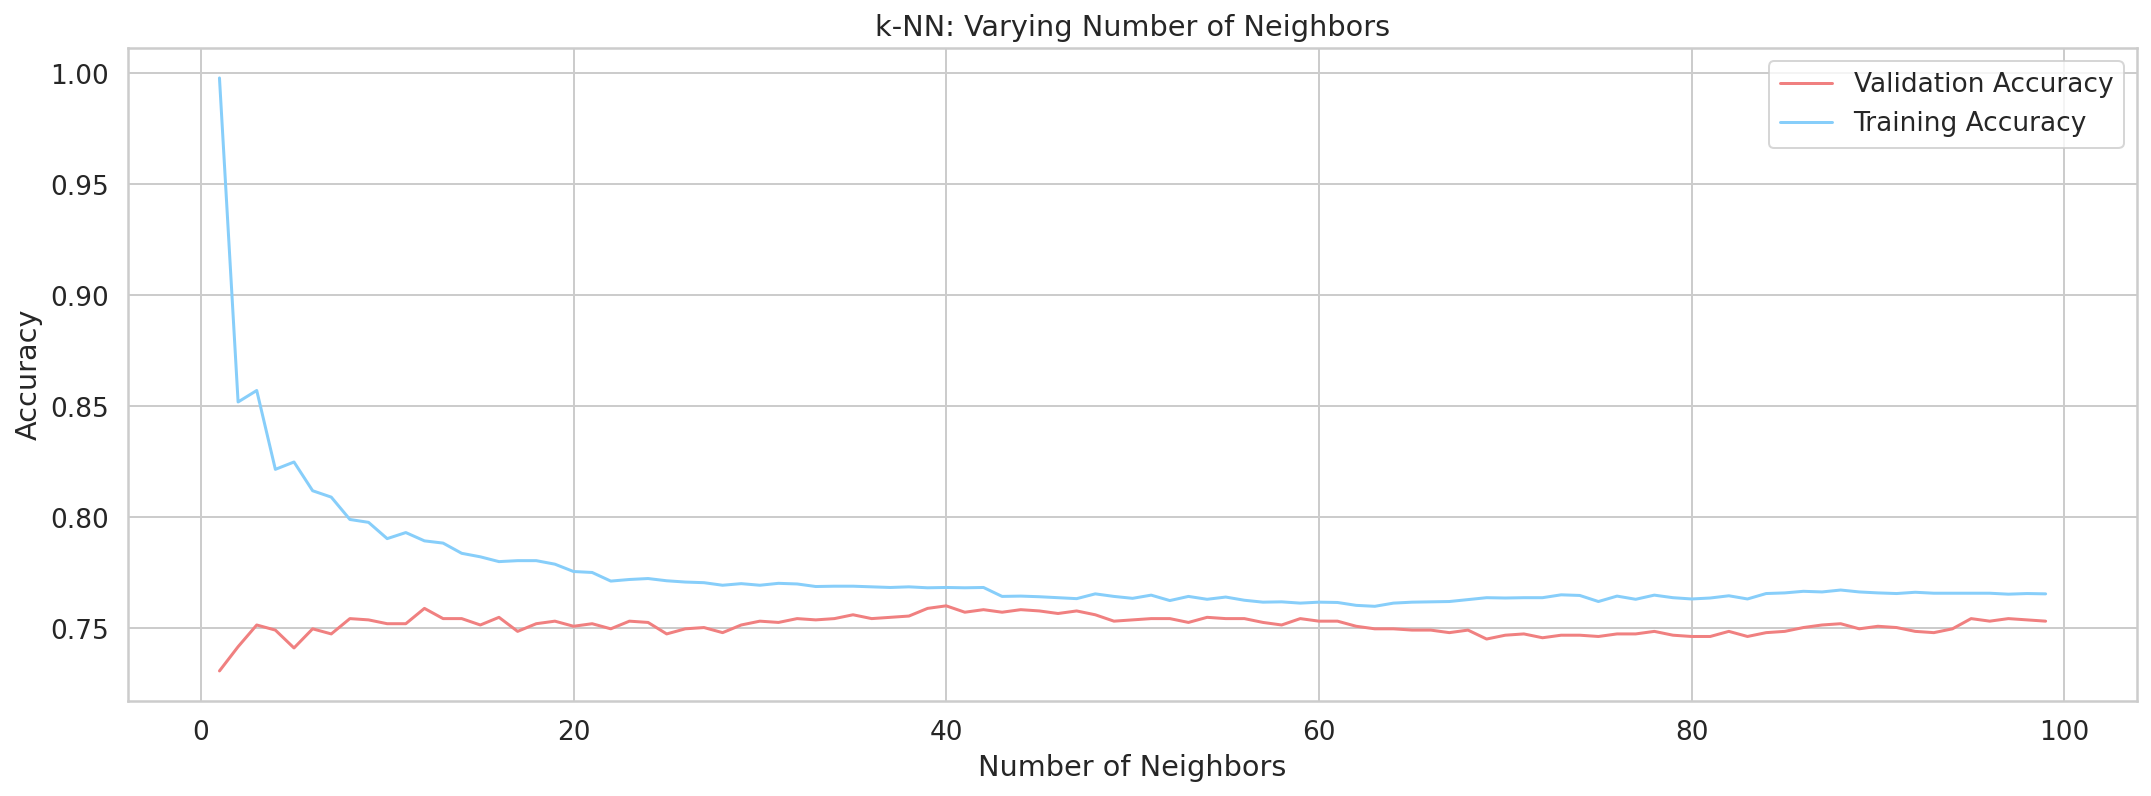

In [ ]:
#Split arrays or matrices into train and valid subsets

 
knn_pipe =   make_pipeline(preprocess_1,KNeighborsClassifier(n_neighbors=7)) 
knn_pipe.fit(X_train,y_train)

print("Preliminary model score:")
print(knn_pipe.score(X_val,y_val).round(3))

no_neighbors = np.arange(1, 100)
train_accuracy = np.empty(len(no_neighbors))
valid_accuracy = np.empty(len(no_neighbors))

for i, k in enumerate(no_neighbors):
    # We instantiate the classifier
    knn_pipe = make_pipeline(preprocess_1,KNeighborsClassifier(n_neighbors=k))
    # Fit the classifier to the training data
    knn_pipe.fit(X_train,y_train)
    
    # Compute accuracy on the training set
    train_accuracy[i] = knn_pipe.score(X_train, y_train)

    # Compute accuracy on the validing set
    valid_accuracy[i] = knn_pipe.score(X_val, y_val)

# Visualization of k values vs accuracy

plt.title('k-NN: Varying Number of Neighbors')
plt.plot(no_neighbors, valid_accuracy, label = 'Validation Accuracy')
plt.plot(no_neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

As you can see here, the where k = 1, the training score is really high and the testing score really low. This is because of **OVERFITTING**. k = 1, model makes decision based on 1 data point; it will be very sensitive to noises in the training data set.

As you increase k, the decision boundary is more stable but if its too large, the algorithim will consider too many data poits and will be making decision based on the average of the data i.e. it will not learn anything.(**UNDERFITTING**).

### Logistic Regression Third Baseline Model

In [ ]:
logistic_pipe = make_pipeline(
    preprocess_1,
    LogisticRegression()
)

**Train Valid Split**

In [ ]:
logistic_pipe.fit(X_train, y_train)

accuracy_score(y_val, logistic_pipe.predict(X_val)).round(3)

0.787

**Cross Validation**

In [ ]:
print("Accuracy using Cross Validation KNN classifier = {0:.3f}".format(
    np.mean(cross_val_score(logistic_pipe, X, y, scoring = 'accuracy'))))

Accuracy using Cross Validation KNN classifier = 0.776


In [ ]:
target_names = ['Transported','Not Transported']
labels = [1,0]
report = classification_report(y_val,logistic_pipe.predict(X_val),target_names=target_names,labels = labels)
print(report)

                 precision    recall  f1-score   support

    Transported       0.80      0.76      0.78       876
Not Transported       0.77      0.81      0.79       863

       accuracy                           0.79      1739
      macro avg       0.79      0.79      0.79      1739
   weighted avg       0.79      0.79      0.79      1739



In [ ]:
cm = confusion_matrix(y_val,logistic_pipe.predict(X_val))
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
cm.diagonal().round(3)

array([0.812, 0.761])

### Running many Models without Feature Engineering

In [ ]:
classifiers = {
    'Naive Bayes': MultinomialNB(),
    'Logistic Regression': LogisticRegression(C=0.2, solver='liblinear'),
    'SGD Classifier':SGDClassifier(loss='log'),
    'Decision Tree': DecisionTreeClassifier(max_depth=7),
    "SVC" : SVC(random_state=0, probability=True),
    'Random Forest': RandomForestClassifier(max_depth=7, n_estimators=100),
    'AdaBoost': AdaBoostClassifier(n_estimators=100),
    'CatBoost': CatBoostClassifier(iterations=10, learning_rate=0.1, verbose=False),
    'LightGBM': lgb.LGBMClassifier(learning_rate=0.05, n_estimators=500,reg_lambda = 1),
    'XGBoost': XGBClassifier( n_estimators=500,use_label_encoder=False,eval_metric='rmse'),
    'KNN':KNeighborsClassifier()
}

# classifiers['stack'] = StackingClassifier(
#     [(k, m) for k,m in classifiers.items()], 
#     final_estimator=LogisticRegression())

In [ ]:
# grid = dict()
# grid['n_estimators'] = [100, 200, 300]
# grid['max_depth'] = [3,4,5]


In [ ]:
def plot_model_result(y_pred,y_true):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

  cf_matrix =confusion_matrix(y_pred, y_true)

  group_names = ['True Neg','False Pos','False Neg','True Pos']
  group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
  group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
  
  labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
  labels = np.asarray(labels).reshape(2,2)

  accuracy  = np.trace(cf_matrix) / float(np.sum(cf_matrix))
  precision = cf_matrix[1,1] / sum(cf_matrix[:,1])
  recall    = cf_matrix[1,1] / sum(cf_matrix[1,:])
  f1_score  = 2*precision*recall / (precision + recall)
  stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(accuracy,precision,recall,f1_score)
  
  sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues', ax = ax1)
  ax1.set(ylabel= 'True label',xlabel= 'Predicted label' + stats_text)
  ax1.set_title('Confusion matrix')

  RocCurveDisplay.from_predictions(
        y_true, 
        y_pred, 
        ax=ax2)
  ax2.set_title('ROC')

  plt.tight_layout()
  plt.show()

  print(classification_report(y_true, y_pred))



In [ ]:
scores = pd.DataFrame(
    np.zeros((len(classifiers), NUM_FOLDS)), 
    index=classifiers.keys(), 
    columns=range(1, NUM_FOLDS+1))

models = dict()

### Model `Naive Bayes`

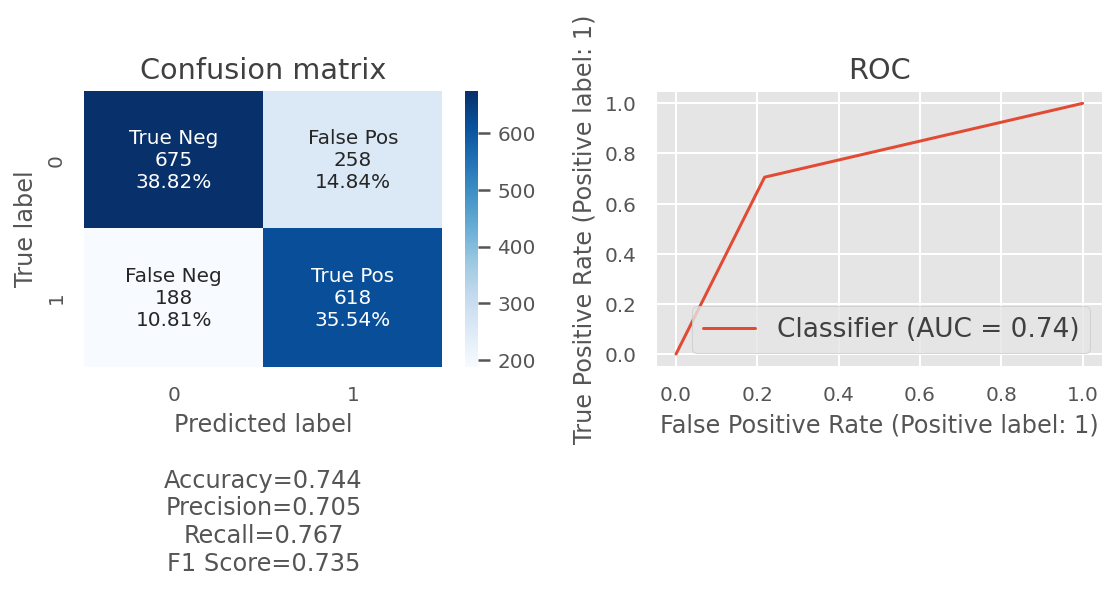

              precision    recall  f1-score   support

           0       0.72      0.78      0.75       863
           1       0.77      0.71      0.73       876

    accuracy                           0.74      1739
   macro avg       0.75      0.74      0.74      1739
weighted avg       0.75      0.74      0.74      1739



### Model `Logistic Regression`

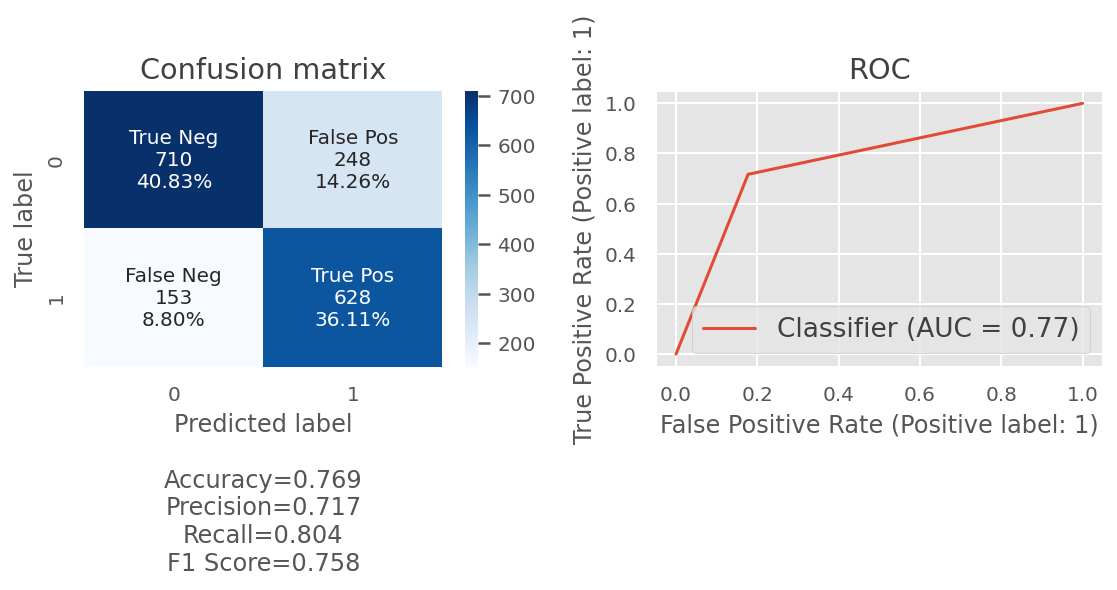

              precision    recall  f1-score   support

           0       0.74      0.82      0.78       863
           1       0.80      0.72      0.76       876

    accuracy                           0.77      1739
   macro avg       0.77      0.77      0.77      1739
weighted avg       0.77      0.77      0.77      1739



### Model `SGD Classifier`

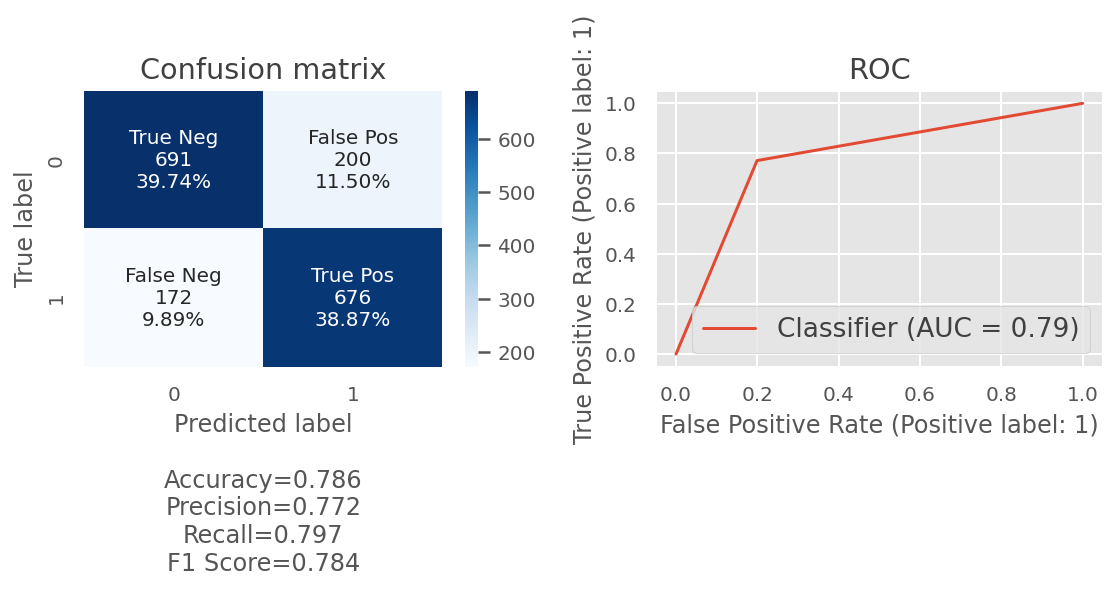

              precision    recall  f1-score   support

           0       0.78      0.80      0.79       863
           1       0.80      0.77      0.78       876

    accuracy                           0.79      1739
   macro avg       0.79      0.79      0.79      1739
weighted avg       0.79      0.79      0.79      1739



### Model `Decision Tree`

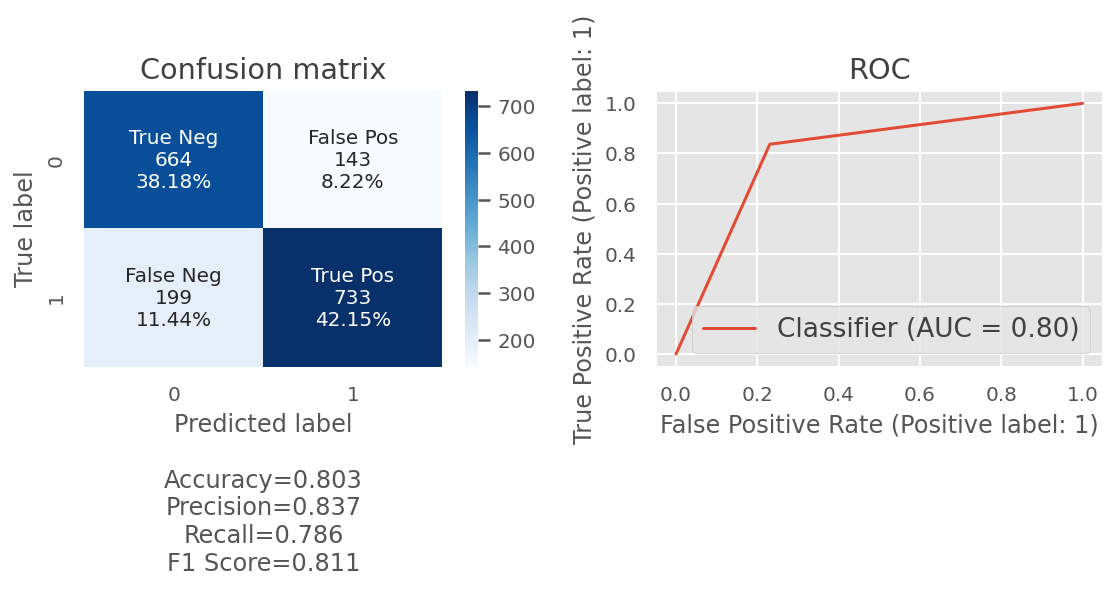

              precision    recall  f1-score   support

           0       0.82      0.77      0.80       863
           1       0.79      0.84      0.81       876

    accuracy                           0.80      1739
   macro avg       0.80      0.80      0.80      1739
weighted avg       0.80      0.80      0.80      1739



### Model `SVC`

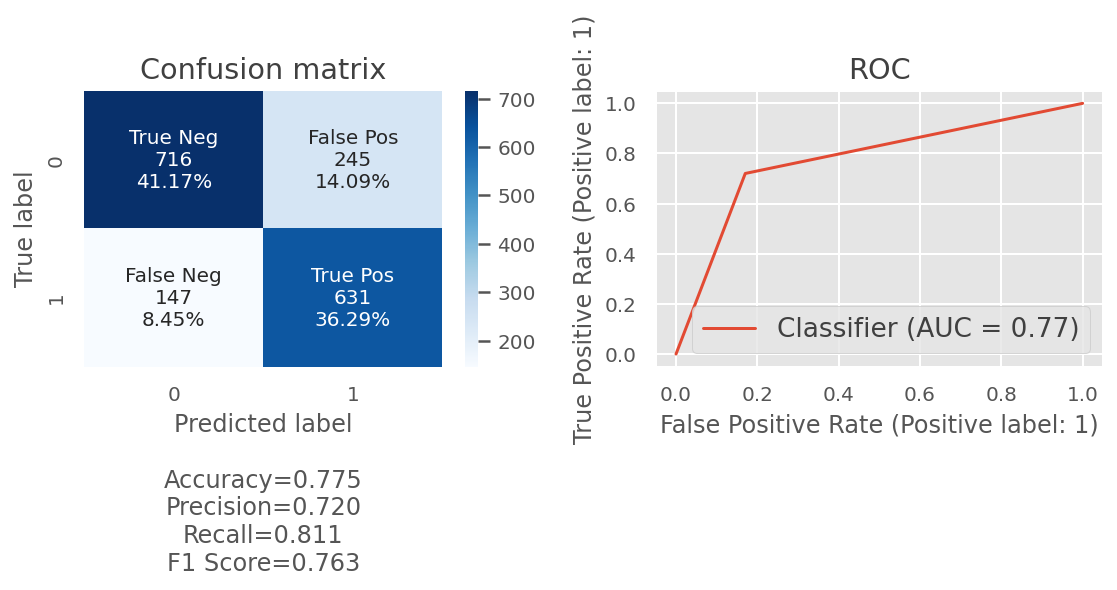

              precision    recall  f1-score   support

           0       0.75      0.83      0.79       863
           1       0.81      0.72      0.76       876

    accuracy                           0.77      1739
   macro avg       0.78      0.77      0.77      1739
weighted avg       0.78      0.77      0.77      1739



### Model `Random Forest`

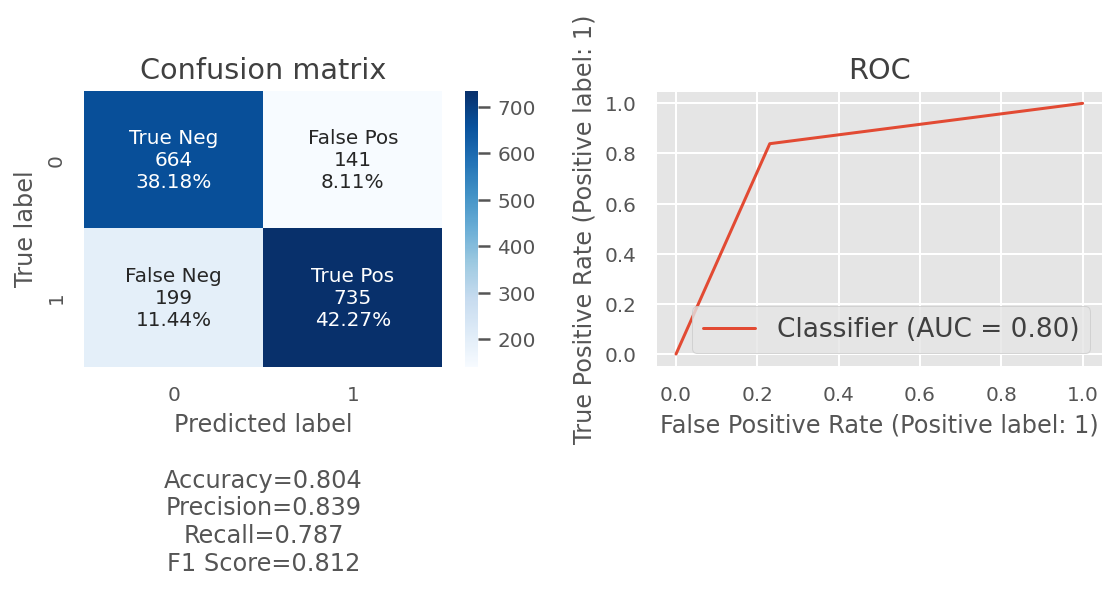

              precision    recall  f1-score   support

           0       0.82      0.77      0.80       863
           1       0.79      0.84      0.81       876

    accuracy                           0.80      1739
   macro avg       0.81      0.80      0.80      1739
weighted avg       0.81      0.80      0.80      1739



### Model `AdaBoost`

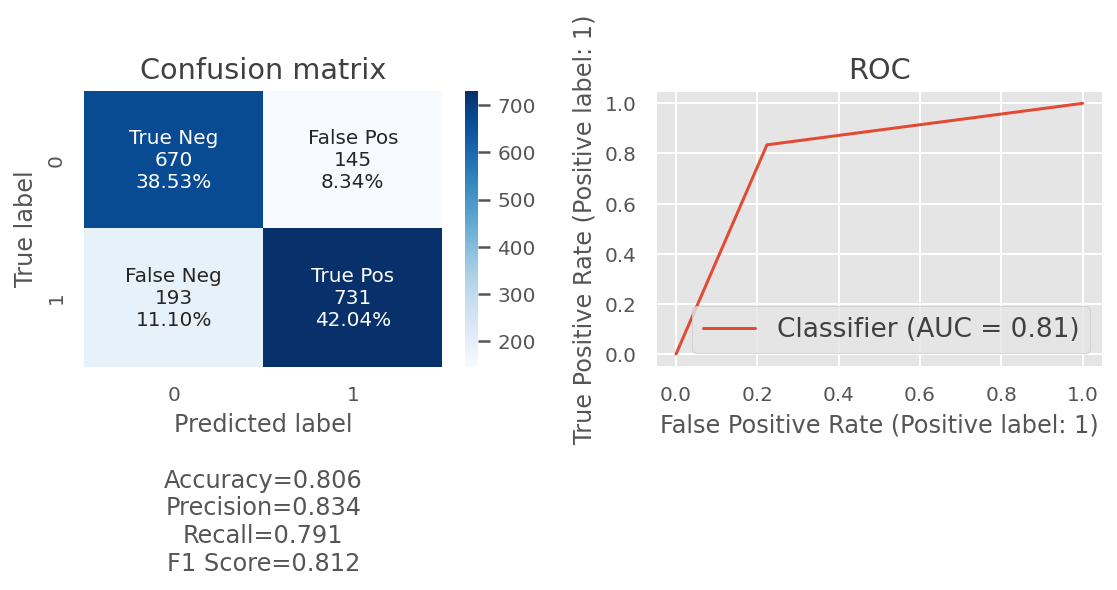

              precision    recall  f1-score   support

           0       0.82      0.78      0.80       863
           1       0.79      0.83      0.81       876

    accuracy                           0.81      1739
   macro avg       0.81      0.81      0.81      1739
weighted avg       0.81      0.81      0.81      1739



### Model `CatBoost`

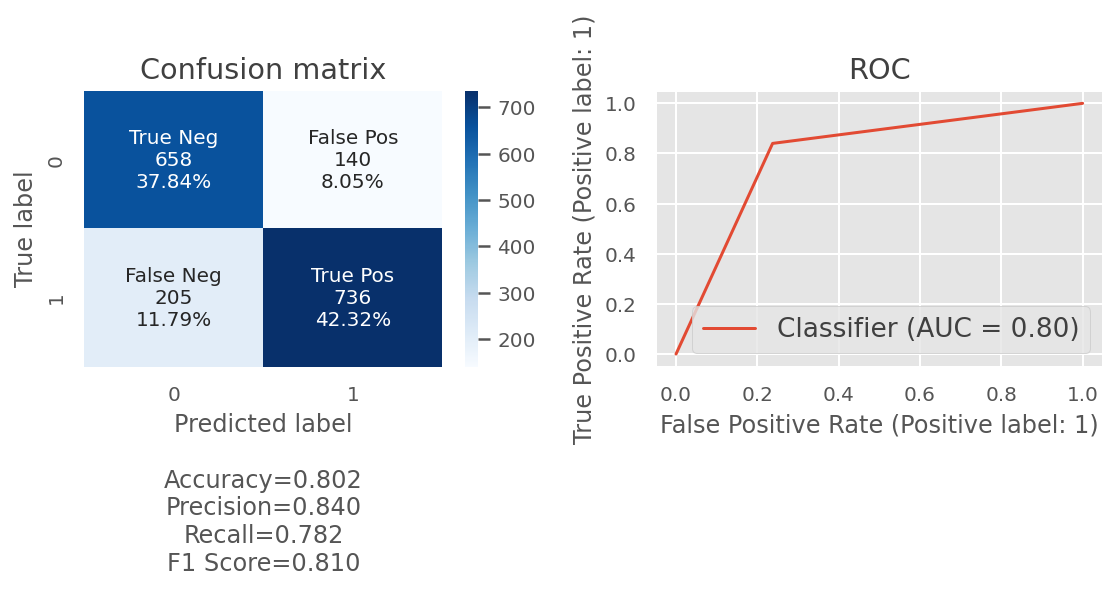

              precision    recall  f1-score   support

           0       0.82      0.76      0.79       863
           1       0.78      0.84      0.81       876

    accuracy                           0.80      1739
   macro avg       0.80      0.80      0.80      1739
weighted avg       0.80      0.80      0.80      1739



### Model `LightGBM`

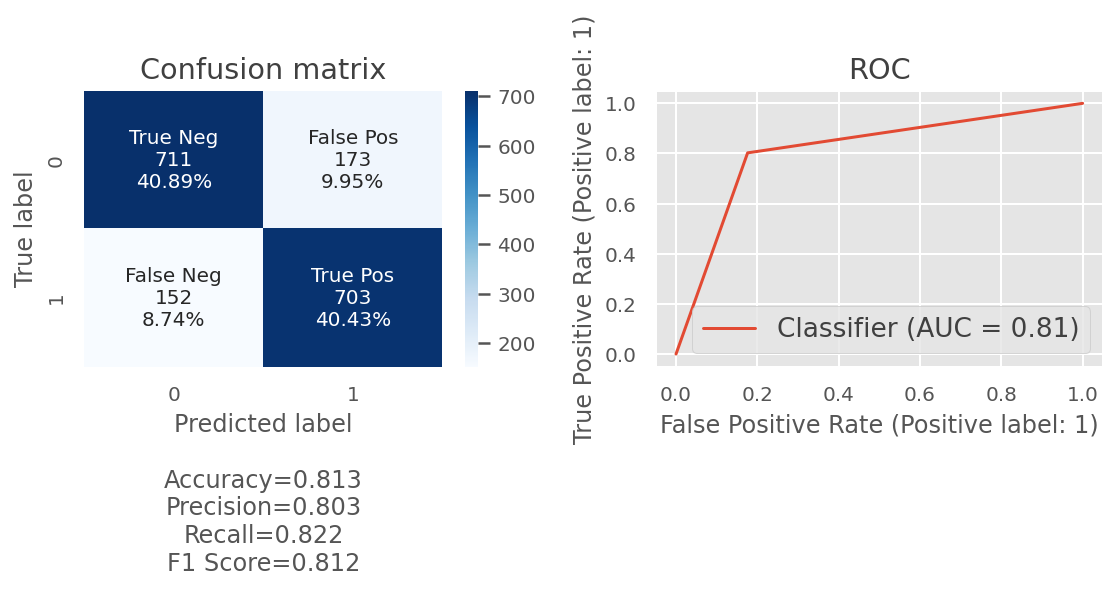

              precision    recall  f1-score   support

           0       0.80      0.82      0.81       863
           1       0.82      0.80      0.81       876

    accuracy                           0.81      1739
   macro avg       0.81      0.81      0.81      1739
weighted avg       0.81      0.81      0.81      1739



### Model `XGBoost`

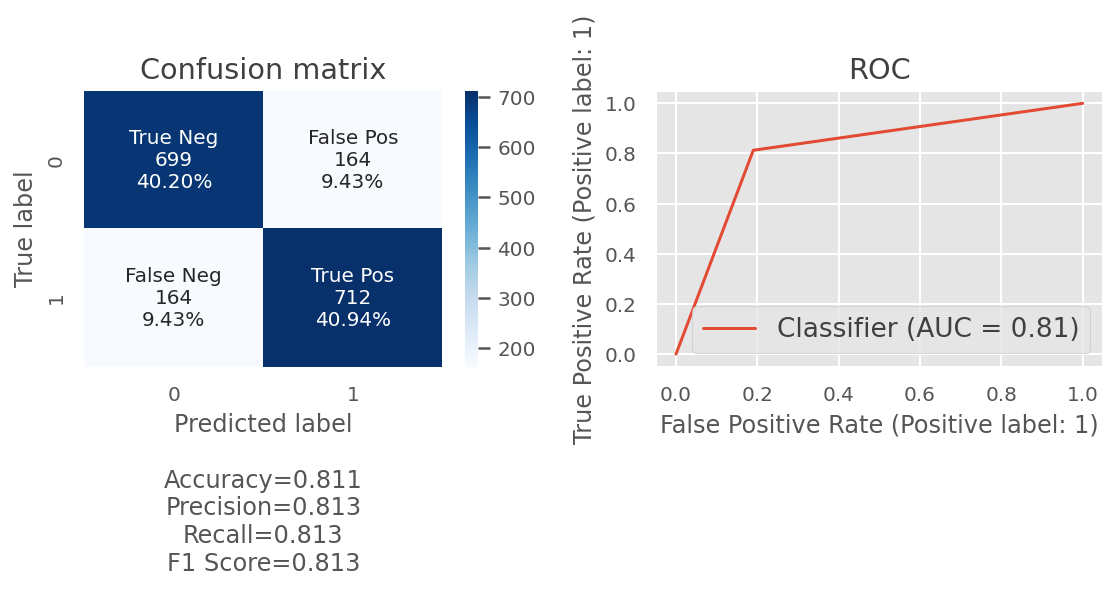

              precision    recall  f1-score   support

           0       0.81      0.81      0.81       863
           1       0.81      0.81      0.81       876

    accuracy                           0.81      1739
   macro avg       0.81      0.81      0.81      1739
weighted avg       0.81      0.81      0.81      1739



### Model `KNN`

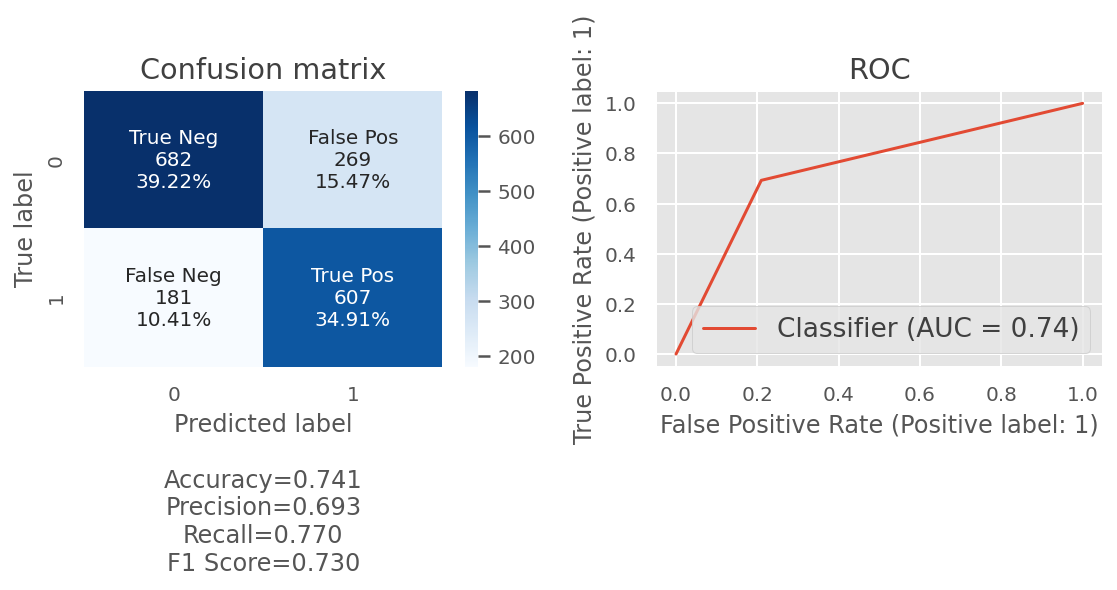

              precision    recall  f1-score   support

           0       0.72      0.79      0.75       863
           1       0.77      0.69      0.73       876

    accuracy                           0.74      1739
   macro avg       0.74      0.74      0.74      1739
weighted avg       0.74      0.74      0.74      1739



In [ ]:
from IPython.display import display, Markdown, Latex
for name, cls in classifiers.items():
    display(Markdown('### Model `{}`'.format(name)))
    
    models[name] = model = make_pipeline(
        preprocess_1,
        classifiers[name]
    ).fit(X_train.copy(), y_train)

    y_pred = model.predict(X_val.copy())
    plot_model_result(y_pred, y_val)
    
    X_trans = preprocess_1.fit_transform(X_train.copy())
    scores.loc[name] = cross_val_score(
        classifiers[name], 
        X_trans.copy(), y_train, cv=NUM_FOLDS)

In [ ]:
params = {
    'text.color': (0.25, 0.25, 0.25),
    'figure.figsize': [18, 6],
   }
plt.rcParams.update(params)


plt.rc('font', size=15)
plt.rc('axes', titlesize=18)  
plt.rc('xtick', labelsize=10)  
plt.rc('ytick', labelsize=10)
plt.style.use('ggplot')

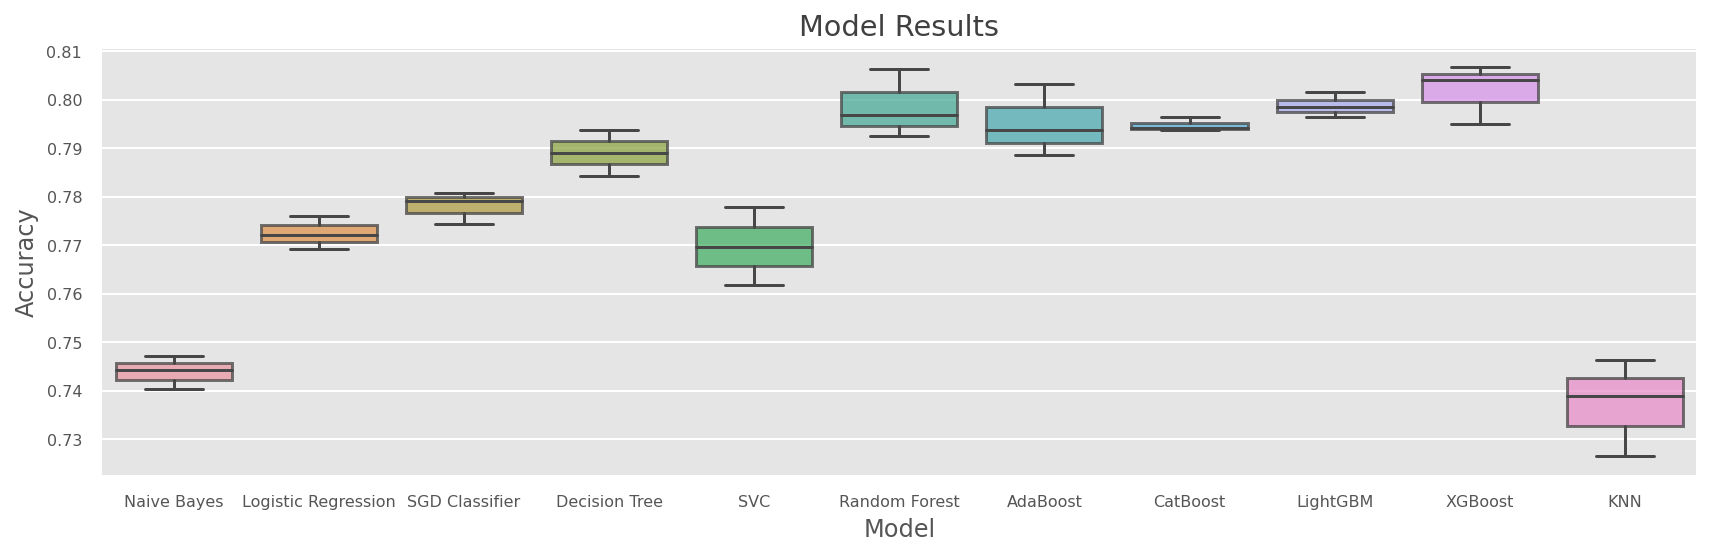

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))    
sns.boxplot(
    data=scores.T, 
    ax=ax,
    boxprops=dict(alpha=.75),
    #palette='Set2'
    )

ax.set_title(f'Model Results')
ax.set_xlabel('Model')
ax.set_ylabel('Accuracy')
ax.tick_params(labelsize = 8,axis = 'both')



plt.tight_layout()
plt.show()

In [ ]:
pd.DataFrame({
    'Model': scores.index,
    'Score': scores.mean(axis=1).round(4),
    'Std': scores.std(axis=1).round(4)
}).set_index('Model').sort_values(by='Score', ascending=False)

Score     Std
Model                              
XGBoost              0.8020  0.0061
LightGBM             0.7988  0.0026
Random Forest        0.7985  0.0071
AdaBoost             0.7952  0.0074
CatBoost             0.7948  0.0014
Decision Tree        0.7890  0.0047
SGD Classifier       0.7781  0.0034
Logistic Regression  0.7725  0.0035
SVC                  0.7698  0.0080
Naive Bayes          0.7439  0.0035
KNN                  0.7373  0.0100

# 7. Feature Engineering

## Log Expense Features Pipeline

**FunctionTransformer to convert Binary cools to int**

In [ ]:
def to_bool(series):
  return series.astype('bool').astype(int)

bool_transformer = FunctionTransformer(to_bool)

**FunctionTransformer to Log Expense Features**

In [ ]:
def log1p(feature):
  return np.log1p(feature)
log_transformer = FunctionTransformer(log1p)

**Feature Engineering Pipeline**

In [ ]:
y=df_train['Transported'].astype('bool').astype(int)
X=df_train.drop(columns='Transported')

X_test=df_test

print(y.shape)
print(X.shape)
print(X_test.shape)

(8693,)
(8693, 33)
(4277, 33)


In [ ]:
X_train, X_val, y_train, y_val = train_test_split(
            X, y, test_size=0.20, random_state=42,stratify=y)
print("The shape of validation data:{} and {} ".format(X_val.shape,y_val.shape))
print("The shape of training data:{} and {} ".format(X_train.shape,y_train.shape))

The shape of validation data:(1739, 33) and (1739,) 
The shape of training data:(6954, 33) and (6954,) 


In [ ]:
dropped_features = ['CabinNumber','PassengerGroup',
             'GroupSize','Name', 'Firstname', 'Surname', 'AgeClass']

categorical_features = ['HomePlanet','Destination','CabinDeck','CabinSide']

log_features = ['RoomService','FoodCourt','ShoppingMall','Spa','Total_Expenditure','Luxury_Expenditure','Basic_Expenditure']

preprocess_2 = make_column_transformer(
    ("drop",dropped_features),
    (OneHotEncoder(handle_unknown="ignore", sparse=False),categorical_features),
    (bool_transformer,['CryoSleep','VIP']),
    (log_transformer,log_features),
     remainder = MinMaxScaler(),
   

)

#X_train = preprocess_2.fit_transform(X_train)
#X_val = preprocess_2.transform(X_val)


### Logistic Regression with Log Expense Features

In [ ]:
logistic_pipe2 = make_pipeline(preprocess_2,LogisticRegression())

**Tran Valid Split**

In [ ]:
logistic_pipe2.fit(X_train, y_train)

accuracy_score(y_val, logistic_pipe2.predict(X_val)).round(3)

0.803

**Cross Validation**

In [ ]:
print("Accuracy using Cross Validation Logistic Regression = {0:.3f}".format(
    np.mean(cross_val_score(logistic_pipe2, X, y, scoring = 'accuracy'))))

Accuracy using Cross Validation Logistic Regression = 0.790


In [ ]:
target_names = ['Transported','Not Transported']
labels = [1,0]
report = classification_report(y_val,logistic_pipe2.predict(X_val),target_names=target_names,labels = labels)
print(report)

                 precision    recall  f1-score   support

    Transported       0.80      0.81      0.81       876
Not Transported       0.81      0.79      0.80       863

       accuracy                           0.80      1739
      macro avg       0.80      0.80      0.80      1739
   weighted avg       0.80      0.80      0.80      1739



In [ ]:
cm = confusion_matrix(y_val,logistic_pipe2.predict(X_val))
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
cm.diagonal().round(3)

array([0.793, 0.813])

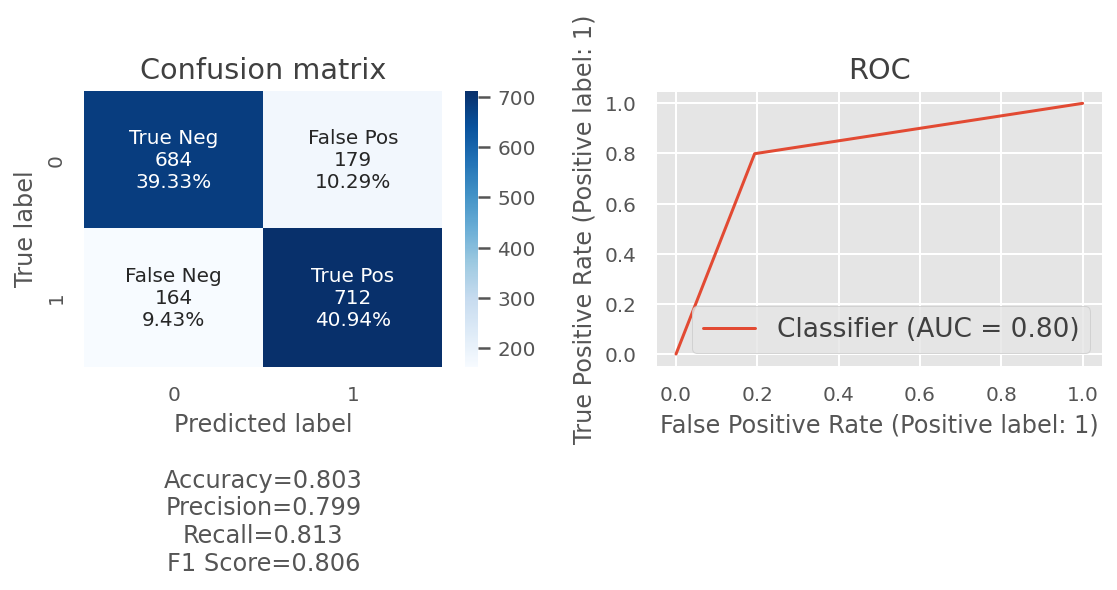

              precision    recall  f1-score   support

           0       0.79      0.81      0.80       848
           1       0.81      0.80      0.81       891

    accuracy                           0.80      1739
   macro avg       0.80      0.80      0.80      1739
weighted avg       0.80      0.80      0.80      1739



In [ ]:
plot_confusion_matrix(y_val, logistic_pipe2.predict(X_val))

https://github.com/DTrimarchi10/confusion_matrix/blob/master/cf_matrix.py

In [ ]:
preds = logistic_pipe2.predict(X_val)

In [ ]:
# Proportion (in test set) we get from rounding
print(np.round(100*np.round(preds).sum()/len(preds),2))

51.24


Text(0.5, 1.0, 'Target distribution')

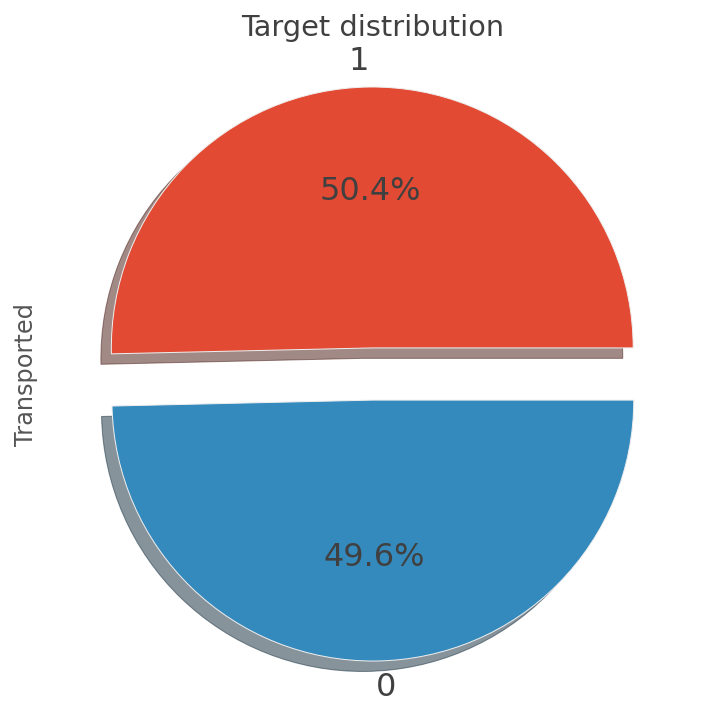

In [ ]:
plt.figure(figsize=(6,6))

# Pie plot
y.value_counts().plot.pie(explode=[0.1,0.1], autopct='%1.1f%%', shadow=True, textprops={'fontsize':16}).set_title("Target distribution")

Our models seem to (potentially) overestimate the number of transported passengers in the test set. Let's try to bring that proportion down a bit

In [ ]:
scores2 = pd.DataFrame(
    np.zeros((len(classifiers), NUM_FOLDS)), 
    index=classifiers.keys(), 
    columns=range(1, NUM_FOLDS+1))

models = dict()

In [ ]:
for name, cls in classifiers.items():
    display(Markdown('### Model `{}`'.format(name)))
    
    models[name] = model = make_pipeline(
        preprocess_2,
        classifiers[name]
    ).fit(X_train.copy(), y_train)

    y_pred = model.predict(X_val.copy())
    plot_model_result(y_pred, y_val)
    
    X_trans = preprocess_2.fit_transform(X_train.copy())
    scores2.loc[name] = cross_val_score(
        classifiers[name], 
        X_trans.copy(), y_train, cv=NUM_FOLDS)

In [ ]:
pd.DataFrame({
    'Model': scores.index,
    'Model': scores2.index,
    'Score no Log': scores.mean(axis=1).round(4),
    'Score Log': scores2.mean(axis=1).round(4),
    'Std no Log': scores.std(axis=1).round(4),
    'Std Log': scores2.std(axis=1).round(4)
}).set_index('Model').sort_values(by='Score Log', ascending=False)

Score no Log  Score Log  Std no Log  Std Log
Model                                                            
XGBoost                    0.8020     0.8020      0.0061   0.0061
Random Forest              0.7985     0.8011      0.0071   0.0046
LightGBM                   0.7988     0.7988      0.0026   0.0026
CatBoost                   0.7948     0.7977      0.0014   0.0043
Logistic Regression        0.7725     0.7962      0.0035   0.0061
SVC                        0.7698     0.7959      0.0080   0.0060
AdaBoost                   0.7952     0.7952      0.0074   0.0074
Decision Tree              0.7890     0.7900      0.0047   0.0053
KNN                        0.7373     0.7738      0.0100   0.0085
SGD Classifier             0.7781     0.7731      0.0034   0.0087
Naive Bayes                0.7439     0.7508      0.0035   0.0066

In [ ]:


LR_grid = {'penalty': ['l1','l2'],
           'C': [0.25, 0.5, 0.75, 1, 1.25, 1.5],
           'max_iter': [50, 100, 150]}

SGD_grid = {'loss': ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'],
            'penalty': ['l1', 'l2', 'elasticnet'],
            'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
            'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
            'class_weight': [{1: 0.5, 0: 0.5},{1: 0.4, 0: 0.6},{1: 0.6, 0: 0.4},{1: 0.7, 0: 0.3}],
            'eta0': [1, 10, 100]}

DT_grid = {'max_depth': [2, 3, 5, 10, 20],
            'min_samples_leaf': [5, 10, 20, 50, 100],
            'criterion': ["gini", "entropy"]}

SVC_grid = {'C': [0.25, 0.5, 0.75, 1, 1.25, 1.5],
            'kernel': ['linear', 'rbf'],
            'gamma': ['scale', 'auto']}

RF_grid = {'n_estimators': [50, 100, 150, 200, 250, 300],
           'max_depth': [4, 6, 8, 10, 12]}

ADA_grid = {
    'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 20, 30],
    'learning_rate': [(0.97 + x / 100) for x in range(0, 8)],
    'algorithm': ['SAMME', 'SAMME.R']
    }

CAT_grid =  {
    'n_estimators':[100, 200, 300],
    "learning_rate": np.linspace(0,0.2,5),
    "max_depth": np.random.randint(3, 10)
    }
LGBM_grid = {
    'n_estimators': [400, 700, 1000],
    'colsample_bytree': [0.7, 0.8],
    'max_depth': [15,20,25],
    'num_leaves': [50, 100, 200],
    'reg_alpha': [1.1, 1.2, 1.3],
    'reg_lambda': [1.1, 1.2, 1.3],
    'min_split_gain': [0.3, 0.4],
    'subsample': [0.7, 0.8, 0.9],
    'subsample_freq': [20]
}

KNN_grid = {'n_neighbors': list(range(1,31)),
           'weights': ['uniform','distance'],
            'p': [1,2]
            }

XGB_grid = {
    'n_estimators': [400, 700, 1000],
    'colsample_bytree': [0.7, 0.8],
    'max_depth': [15,20,25],
    'reg_alpha': [1.1, 1.2, 1.3],
    'reg_lambda': [1.1, 1.2, 1.3],
    'subsample': [0.7, 0.8, 0.9]
}


grid = {
    'Naive Bayes': NB_grid,
    'Logistic Regression': LR_grid,
    'SGD Classifier':SGD_grid,
    'Decision Tree': DT_grid,
    "SVC" : SVC_grid,
    'Random Forest': RF_grid,
    'AdaBoost': ADA_grid,
    'CatBoost': CAT_grid,
    'LightGBM': LGBM_grid,
    'XGBoost': XGB_grid,
    'KNN':KNN_grid
}
      





In [ ]:
classifiers = {
    'Naive Bayes': make_pipeline(preprocess_2,MultinomialNB()),
    'Logistic Regression': make_pipeline(preprocess_2,LogisticRegression(C=0.2, solver='liblinear')),
    'SGD Classifier':make_pipeline(preprocess_2,SGDClassifier(loss='log')),
    'Decision Tree': make_pipeline(preprocess_2,DecisionTreeClassifier(max_depth=7)),
    "SVC" : make_pipeline(preprocess_2,SVC(random_state=0, probability=True)),
    'Random Forest': make_pipeline(preprocess_2,RandomForestClassifier(max_depth=7, n_estimators=100)),
    'AdaBoost': make_pipeline(preprocess_2,AdaBoostClassifier(n_estimators=100)),
    'CatBoost': make_pipeline(preprocess_2,CatBoostClassifier(iterations=10, learning_rate=0.1, verbose=False)),
    'LightGBM': make_pipeline(preprocess_2,lgb.LGBMClassifier(learning_rate=0.05, n_estimators=500,reg_lambda = 1)),
    'XGBoost': make_pipeline(preprocess_2,XGBClassifier( n_estimators=500,use_label_encoder=False,eval_metric='rmse')),
    'KNN':make_pipeline(preprocess_2,KNeighborsClassifier())
}


In [ ]:
for name, cls in classifiers.items():
    display(Markdown('### Model `{}`'.format(name)))
    
    models[name] = model = make_pipeline(
        preprocess_2,
        classifiers[name]
    ).fit(X_train.copy(), y_train)

    y_pred = model.predict(X_val.copy())
    plot_model_result(y_pred, y_val)
    
    X_trans = preprocess_2.fit_transform(X_train.copy())
    scores2.loc[name] = cross_val_score(
        classifiers[name], 
        X_trans.copy(), y_train, cv=NUM_FOLDS

In [ ]:
i=0
clf_best_params=classifiers.copy()
valid_scores=pd.DataFrame({'Classifer':classifiers.keys(), 'Validation accuracy': np.zeros(len(classifiers)), 'Training time': np.zeros(len(classifiers))})
for key, classifier in classifiers.items():
  display(Markdown('### Model `{}`'.format(name)))
  start = time.time()
  models[name] = model = make_pipeline(
        preprocess_2,
        classifiers[name]
    )
  
  clf = GridSearchCV(estimator=model, param_grid=grid[key], n_jobs=-1, cv=None)


Classifer  Validation accuracy  Training time
0  Logistic Regression                  0.0            0.0
1       SGD Classifier                  0.0            0.0
2        Decision Tree                  0.0            0.0
3                  SVC                  0.0            0.0
4        Random Forest                  0.0            0.0
5             AdaBoost                  0.0            0.0
6             CatBoost                  0.0            0.0
7             LightGBM                  0.0            0.0
8              XGBoost                  0.0            0.0
9                  KNN                  0.0            0.0

In [ ]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                            test_size=0.1, random_state=42)

In [ ]:
mean_scores = []
for model in classifiers.values():
  mean_score = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=5).mean() # mean cv score for each model
  mean_scores.append(round(mean_score,4))



 

In [ ]:
# create new dataframe to display scores
scores_df = pd.DataFrame({'Model': classifiers.keys(),'MeanCV_Score': mean_scores})
scores_df.sort_values('MeanCV_Score', ascending=False) # sort values from high to low

Model  MeanCV_Score
9               XGBoost        0.8090
8              LightGBM        0.8089
1   Logistic Regression        0.8035
5         Random Forest        0.8030
4                   SVC        0.8019
7              CatBoost        0.8005
6              AdaBoost        0.7960
3         Decision Tree        0.7929
10                  KNN        0.7800
2        SGD Classifier        0.7547
0           Naive Bayes        0.7512

In [ ]:
# add validation score to the dataframe
for name, model in classifiers.items():
    model.fit(X_train, y_train) # fit model
    y_pred = model.predict(X_val) # make prediction
    scores_df.loc[scores_df.Model==name, 'ValidationScore'] = \
        round(accuracy_score(y_val, y_pred),4) # create new column 'ValidationScore'
        
    scores_df.loc[scores_df.Model==name, 'ScoreDiff'] = \
        round(scores_df['MeanCV_Score'] - scores_df['ValidationScore'],4) # create new column 'ScoreDiff' for score differences

scores_df.sort_values('ValidationScore', ascending=False)

Model  MeanCV_Score  ValidationScore  ScoreDiff
8              LightGBM        0.8089           0.9350    -0.1261
9               XGBoost        0.8090           0.8666    -0.0576
10                  KNN        0.7800           0.8505    -0.0705
3         Decision Tree        0.7929           0.8286    -0.0357
5         Random Forest        0.8030           0.8171    -0.0141
4                   SVC        0.8019           0.8091    -0.0072
6              AdaBoost        0.7960           0.8091    -0.0131
1   Logistic Regression        0.8035           0.8074    -0.0039
7              CatBoost        0.8005           0.8068    -0.0063
2        SGD Classifier        0.7547           0.7786    -0.0239
0           Naive Bayes        0.7512           0.7539    -0.0027

# 7. Feature Selection

**FunctionTransformer to Log Expense Features**

In [ ]:
def log1p(feature):
    def func(data):
        data[f'Log{feature}'] = np.log1p(data[feature])
        data = data.drop(columns = feature)
        return data
        
    return func 

In [ ]:
log_transformer = make_pipeline(
    FunctionTransformer(log1p(feature='RoomService')),
    FunctionTransformer(log1p(feature='FoodCourt')),
    FunctionTransformer(log1p(feature='ShoppingMall')),
    FunctionTransformer(log1p(feature='Spa')),
    FunctionTransformer(log1p(feature='VRDeck')),
    FunctionTransformer(log1p(feature='Total_Expenditure')),
    FunctionTransformer(log1p(feature='Luxury_Expenditure')),
    FunctionTransformer(log1p(feature='Basic_Expenditure'))
)

In [ ]:
def drop_unused_features(data):
    droped_features = [
        'PassengerId',
        'Cabin', 
        'CabinNumber',
        'PassengerGroup',
        'GroupSize',
        'Name', 
        'Firstname', 
        'Surname', 
         'AgeClass']
    
    data.drop(droped_features,  errors='ignore', inplace=True, axis=1) 
    return data
drop_transformer = FunctionTransformer(drop_unused_features)

In [ ]:
def cyro_vip_bool(data):
  data[['CryoSleep','VIP']] = data[['CryoSleep','VIP']].astype('bool').astype(int)
  return data

cyro_vip_transformer = FunctionTransformer(cyro_vip_bool)

In [ ]:
def object_to_category(data):

  obj_cols = ['HomePlanet','Destination','CabinDeck','CabinSide']
  for col in obj_cols:
    data[col] = pd.Categorical(data[col],ordered=False)
  return data

convert_obj_transformer = FunctionTransformer(object_to_category)

# Working

In [ ]:
feature_engineering_pipeline = make_pipeline(
    log_transformer,
    drop_transformer,
    cyro_vip_transformer,
    convert_obj_transformer,
    
    

)
X = feature_engineering_pipeline.fit_transform(X)

X_test = feature_engineering_pipeline.transform(X_test)

print('Training set shape:', X.shape)
print('Training y shape',y.shape)
print('Test set shape:', X_test.shape)


Training set shape: (8693, 26)
Training y shape (8693,)
Test set shape: (870, 26)


In [ ]:
numerical = X.select_dtypes(exclude = ['object', 'category']).columns.to_list()
numerical

['CryoSleep',
 'Age',
 'VIP',
 'Cabin_region1',
 'Cabin_region2',
 'Cabin_region3',
 'Cabin_region4',
 'Cabin_region5',
 'Cabin_region6',
 'Cabin_region7',
 'PassengerNumber',
 'Solo',
 'FamilySize',
 'No_Expenditure',
 'LogRoomService',
 'LogFoodCourt',
 'LogShoppingMall',
 'LogSpa',
 'LogVRDeck',
 'LogTotal_Expenditure',
 'LogLuxury_Expenditure',
 'LogBasic_Expenditure']

In [ ]:
categorical = X.select_dtypes(include = ['object', 'category']).columns.to_list()
categorical

['HomePlanet', 'Destination', 'CabinDeck', 'CabinSide']

In [ ]:
base_features = list(X.columns)
base_features

['HomePlanet',
 'CryoSleep',
 'Destination',
 'Age',
 'VIP',
 'CabinDeck',
 'CabinSide',
 'Cabin_region1',
 'Cabin_region2',
 'Cabin_region3',
 'Cabin_region4',
 'Cabin_region5',
 'Cabin_region6',
 'Cabin_region7',
 'PassengerNumber',
 'Solo',
 'FamilySize',
 'No_Expenditure',
 'LogRoomService',
 'LogFoodCourt',
 'LogShoppingMall',
 'LogSpa',
 'LogVRDeck',
 'LogTotal_Expenditure',
 'LogLuxury_Expenditure',
 'LogBasic_Expenditure']

In [ ]:
def identify_collinear(X, correlation_threshold, one_hot = False):
  base_features = list(X.columns)

  if one_hot:
    features = pd.get_dummies(X)
    one_hot_features = [column for column in features.columns if column not in base_features]
    data_all = pd.concat([features[one_hot_features], X], axis = 1)
    corr_matrix = pd.get_dummies(features).corr()
  else:
    corr_matrix = X.corr()

  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k = 1).astype(np.bool))
  to_drop = [column for column in upper.columns if any(upper[column].abs() > correlation_threshold)]

  record_collinear = pd.DataFrame(columns = ['drop_feature', 'corr_feature', 'corr_value'])
  # Iterate through the columns to drop to record pairs of correlated features
  for column in to_drop:
    corr_features = list(upper.index[upper[column].abs() > correlation_threshold])
    corr_values = list(upper[column][upper[column].abs() > correlation_threshold])
    drop_features = [column for _ in range(len(corr_features))]    

    # Record the information (need a temp df for now)
    temp_df = pd.DataFrame.from_dict({'drop_feature': drop_features,
                                      'corr_feature': corr_features,
                                      'corr_value': corr_values})

    # Add to dataframe
    record_collinear = record_collinear.append(temp_df, ignore_index = True)

    
        
  print('%d features with a correlation magnitude greater than %0.2f.\n' % (len(self.ops['collinear']), self.correlation_threshold))


In [ ]:
one_hot_features

['HomePlanet_Earth',
 'HomePlanet_Europa',
 'HomePlanet_Mars',
 'Destination_55 Cancri e',
 'Destination_PSO J318.5-22',
 'Destination_TRAPPIST-1e',
 'CabinDeck_A',
 'CabinDeck_B',
 'CabinDeck_C',
 'CabinDeck_D',
 'CabinDeck_E',
 'CabinDeck_F',
 'CabinDeck_G',
 'CabinDeck_T',
 'CabinSide_P',
 'CabinSide_S',
 'CabinSide_Z']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                            test_size=0.1, random_state=42)

In [ ]:
i=0
clf_best_params=classifiers.copy()
valid_scores=pd.DataFrame({'Classifer':classifiers.keys(), 'Validation accuracy': np.zeros(len(classifiers)), 'Training time': np.zeros(len(classifiers))})
for key, classifier in classifiers.items():
  display(Markdown('### Model `{}`'.format(name)))
  start = time.time()
  clf = GridSearchCV(estimator=classifier, param_grid=grid[key], n_jobs=-1, cv=None)

  # Train and score
  clf.fit(X_train, y_train)
  valid_scores.iloc[i,1]=clf.score(X_val, y_val)

  # Save trained model
  clf_best_params[key]=clf.best_params_
  
  # Print iteration and training time
  stop = time.time()
  valid_scores.iloc[i,2]=np.round((stop - start)/60, 2)
  
  print('Model:', key)
  print('Training time (mins):', valid_scores.iloc[i,2])
  print('')
  i+=1

In [ ]:
def make_full_pipeline(continuous_cols, categorical_cols, boolean_cols, imputer_strategy_continuous, 
                       imputer_strategy_categorical, imputer_strategy_boolean, fill_value, classifier):
    
    # Preprocessing for continuous data
    continuous_transformer = Pipeline(steps=[
        ("imputer", SimpleImputer(strategy=imputer_strategy_continuous)),
        ("scaler", StandardScaler())
    ])

    # Preprocessing for categorical data
    categorical_transformer = Pipeline(steps=[
        ("imputer", SimpleImputer(strategy=imputer_strategy_categorical, fill_value=fill_value)),
        ("onehot", OneHotEncoder(handle_unknown="error", drop="first"))
    ])

    # Preprocessing for boolean data
    boolean_transformer = Pipeline(steps=[
        ("imputer", SimpleImputer(strategy=imputer_strategy_boolean)),
        # ("onehot", OneHotEncoder(handle_unknown="ignore"))
    ])

    preprocessor = ColumnTransformer(
        transformers=[
            ("num", continuous_transformer, continuous_cols),
            ("cat", categorical_transformer, categorical_cols),
            ("bool", boolean_transformer, boolean_cols),   
        ])

    clf = Pipeline(steps=[("preprocessor", preprocessor),
                          ("classifier", classifier)
                         ])
    
    return clf

In [ ]:
def get_new_feature_names_from_ohe(continuous_cols, boolean_cols, ohe):
    
    new_features = continuous_cols + list(ohe.get_feature_names()) + boolean_cols
    
    return new_features

In [ ]:
def transform_dataframe(df, continuous_cols, boolean_cols, clf):
    
    ohe = clf["preprocessor"].transformers_[1][1]["onehot"]
    new_features = get_new_feature_names_from_ohe(continuous_cols, boolean_cols, ohe)
    df_transformed = pd.DataFrame(clf["preprocessor"].transform(df), columns=new_features)
    df_transformed.index = df.index
    
    return df_transformed

In [ ]:
def evaluate_model(model, X_train, X_valid, y_train, y_valid):
    
    y_valid_pred = model.predict(X_valid)

    print(classification_report(y_valid, y_valid_pred))
    
    xgb_roc_auc = roc_auc_score(y_valid, y_valid_pred)
    fpr, tpr, thresholds = roc_curve(y_valid, model.predict_proba(X_valid)[:,1])
    plt.figure()
    plt.plot(fpr, tpr, label = "AUC (area = %0.2f)" % xgb_roc_auc)
    plt.plot([0, 1], [0, 1],"g--")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC AUC")
    plt.show()
    
    plot_confusion_matrix(model,
                      X_valid,
                      y_valid,
                      cmap = CMAP,
                      normalize = "true")

# 6. Feature Engineering Pipeline

## FE Pipeline until object transformer

In [ ]:
def log1p(feature):
    def func(data):
        data[f'Log{feature}'] = np.log1p(data[feature])
        data = data.drop(columns = feature)
        return data
        
    return func 

In [ ]:
log_transformer = make_pipeline(
    FunctionTransformer(log1p(feature='RoomService')),
    FunctionTransformer(log1p(feature='FoodCourt')),
    FunctionTransformer(log1p(feature='ShoppingMall')),
    FunctionTransformer(log1p(feature='Spa')),
    FunctionTransformer(log1p(feature='VRDeck')),
    FunctionTransformer(log1p(feature='Total_Expenditure')),
    FunctionTransformer(log1p(feature='Luxury_Expenditure')),
    FunctionTransformer(log1p(feature='Basic_Expenditure'))
)

In [ ]:
def drop_unused_features(data):
    droped_features = [
        'PassengerId',
        'Cabin', 
        'CabinNumber',
        'PassengerGroup',
        'GroupSize',
        'Name', 
        'Firstname', 
        'Surname', 
         'AgeClass']
    
    data.drop(droped_features,  errors='ignore', inplace=True, axis=1) 
    return data

In [ ]:
drop_transformer = FunctionTransformer(drop_unused_features)

In [ ]:
numerical = data.select_dtypes(exclude = ['object', 'category']).columns.to_list()
numerical

['Age',
 'RoomService',
 'FoodCourt',
 'ShoppingMall',
 'Spa',
 'VRDeck',
 'CabinNumber',
 'Cabin_region1',
 'Cabin_region2',
 'Cabin_region3',
 'Cabin_region4',
 'Cabin_region5',
 'Cabin_region6',
 'Cabin_region7',
 'PassengerGroup',
 'PassengerNumber',
 'GroupSize',
 'Solo',
 'FamilySize',
 'Total_Expenditure',
 'No_Expenditure',
 'Luxury_Expenditure',
 'Basic_Expenditure']

In [ ]:
categorical = data.select_dtypes(include = ['object', 'category']).columns.to_list()
categorical

['PassengerId',
 'HomePlanet',
 'CryoSleep',
 'Destination',
 'VIP',
 'Name',
 'CabinDeck',
 'CabinSide',
 'Firstname',
 'Surname',
 'AgeClass']

In [ ]:
def cyro_vip_bool(data):
  data[['CryoSleep','VIP']] = data[['CryoSleep','VIP']].astype('bool').astype(int)
  return data

In [ ]:
cyro_vip_transformer = FunctionTransformer(cyro_vip_bool)

In [ ]:
def object_to_category(data):

  obj_cols = ['HomePlanet','Destination','CabinDeck','CabinSide']
  for col in obj_cols:
    data[col] = pd.Categorical(data[col],ordered=False)
  return data
  

In [ ]:
convert_obj_transformer = FunctionTransformer(object_to_category)

In [ ]:
y=df_train['Transported'].astype('bool').astype(int)
X=data[data.index.isin(df_train.index)].copy()
X_test=data[data.index.isin(df_test.index)].copy()

feature_engineering_pipeline = make_pipeline(
    log_transformer,
    drop_transformer,
    cyro_vip_transformer,
    convert_obj_transformer,
    
    

)
X = feature_engineering_pipeline.fit_transform(X)

X_test = feature_engineering_pipeline.transform(X_test)

print('Training set shape:', X.shape)
print('Test set shape:', X_test.shape)


Training set shape: (0, 26)
Test set shape: (0, 26)


Correlation Matrix of new features

In [ ]:
data_train_vis = feature_engineering_pipeline.fit_transform(data_train)

num_corr = data_train_vis.corr()

fig, ax = plt.subplots(1, 1, figsize=(30, 30))
mask = np.triu(np.ones_like(num_corr, dtype=bool))
sns.heatmap(
    num_corr, 
    mask=mask, 
    cmap='rocket', 
    vmax=.3, 
    center=0,
    square=True, 
    linewidths=.1,
    ax=ax,
    alpha=0.85,
    annot = True,
    fmt='.1g',
    cbar_kws={"shrink": .5})

plt.tight_layout()
plt.show()

NameError: ignored

In [ ]:
X.drop(columns='Transported',inplace=True)

In [ ]:
y

PassengerId
0001_01    0
0002_01    1
0003_01    0
0003_02    0
0004_01    1
          ..
9276_01    0
9278_01    0
9279_01    1
9280_01    0
9280_02    1
Name: Transported, Length: 8693, dtype: int64

# Modeling

## First trial

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(
            X, y, test_size=0.20, random_state=42,stratify=y)
print("The shape of validation data:{} and {} ".format(X_val.shape,y_val.shape))
print("The shape of training data:{} and {} ".format(X_train.shape,y_train.shape))
# Added the label temporariliy for EDA
#X_train['Transported'] = y_train

The shape of validation data:(1739, 26) and (1739,) 
The shape of training data:(6954, 26) and (6954,) 


In [ ]:
num_transform = make_pipeline(
    RobustScaler()
)

cat_transform = make_pipeline(
    OneHotEncoder(handle_unknown="ignore", sparse=False)
)

preprocessor = make_pipeline(
    make_column_transformer(
        (num_transform, make_column_selector(dtype_include='number')),
        (cat_transform, make_column_selector(dtype_include=['category', 'bool']))
    )
)

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay
from IPython.display import display, Markdown, Latex
from IPython.display import display, Markdown, Latex

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import lightgbm as lgb
from xgboost import XGBClassifier
from pandas.api.types import is_numeric_dtype, is_categorical_dtype
from scipy.stats import chi2_contingency
from catboost import CatBoostClassifier

from sklearn import set_config
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.compose import make_column_selector 
from sklearn.preprocessing import FunctionTransformer
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.metrics import classification_report, accuracy_score
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier, RidgeClassifier
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.ensemble import StackingClassifier

from IPython.display import display, Markdown, Latex

In [ ]:
def plot_model_result(y_pred, y_true):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

    ConfusionMatrixDisplay.from_predictions(
        y_true, 
        y_pred, 
        ax=ax1, 
        cmap='Reds',
        normalize='true',
        colorbar=False)
    ax1.set_title('Confusion matrix')

    RocCurveDisplay.from_predictions(
        y_true, 
        y_pred, 
        ax=ax2)
    ax2.set_title('ROC')

    plt.tight_layout()
    plt.show()

    print(classification_report(y_true, y_pred))

In [ ]:
classifiers = {
    'lr': LogisticRegression(C=0.2, solver='liblinear'),
    'sgd': SGDClassifier(loss='log'),
    'ride': RidgeClassifier(),
    'dt': DecisionTreeClassifier(
        max_depth=7),
    'rf': RandomForestClassifier(
        max_depth=7, 
        n_estimators=100),
    'ada': AdaBoostClassifier(
        n_estimators=100),
    'cat': CatBoostClassifier(
        iterations=10, 
        learning_rate=0.1, verbose=False),
    'lgb': lgb.LGBMClassifier(
        learning_rate=0.05,
        n_estimators=500,
        reg_lambda = 1),
    'xgb': XGBClassifier(
        n_estimators=500,
        use_label_encoder=False,
        eval_metric='rmse')
}

classifiers['stack'] = StackingClassifier(
    [(k, m) for k,m in classifiers.items()], 
    final_estimator=LogisticRegression())

In [ ]:
scores = pd.DataFrame(
    np.zeros((len(classifiers), NUM_FOLDS)), 
    index=classifiers.keys(), 
    columns=range(1, NUM_FOLDS+1))

models = dict()

### Model `lr`

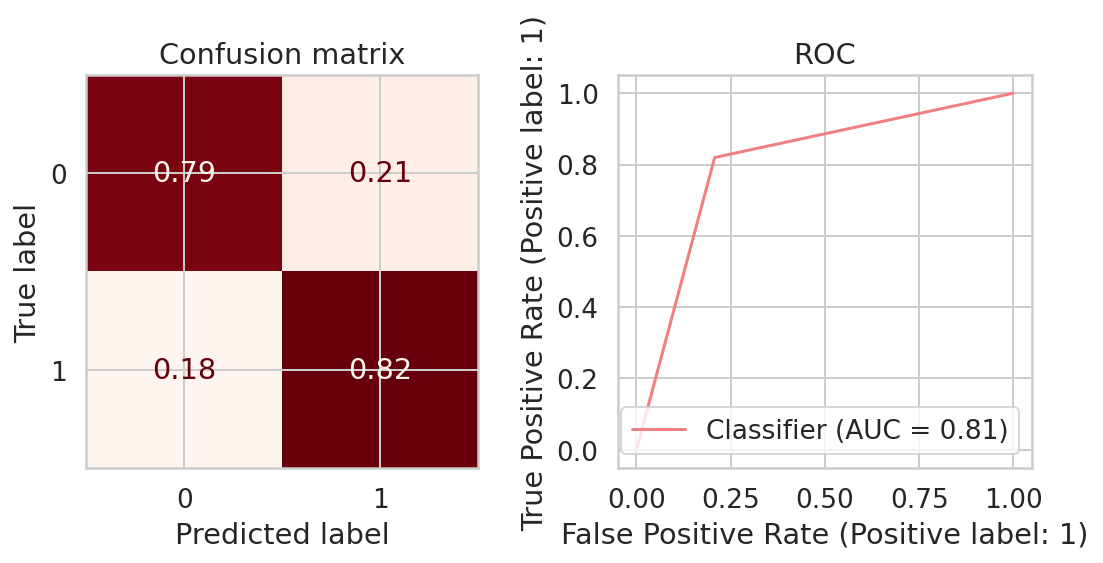

              precision    recall  f1-score   support

           0       0.81      0.79      0.80       863
           1       0.80      0.82      0.81       876

    accuracy                           0.81      1739
   macro avg       0.81      0.81      0.81      1739
weighted avg       0.81      0.81      0.81      1739



### Model `sgd`

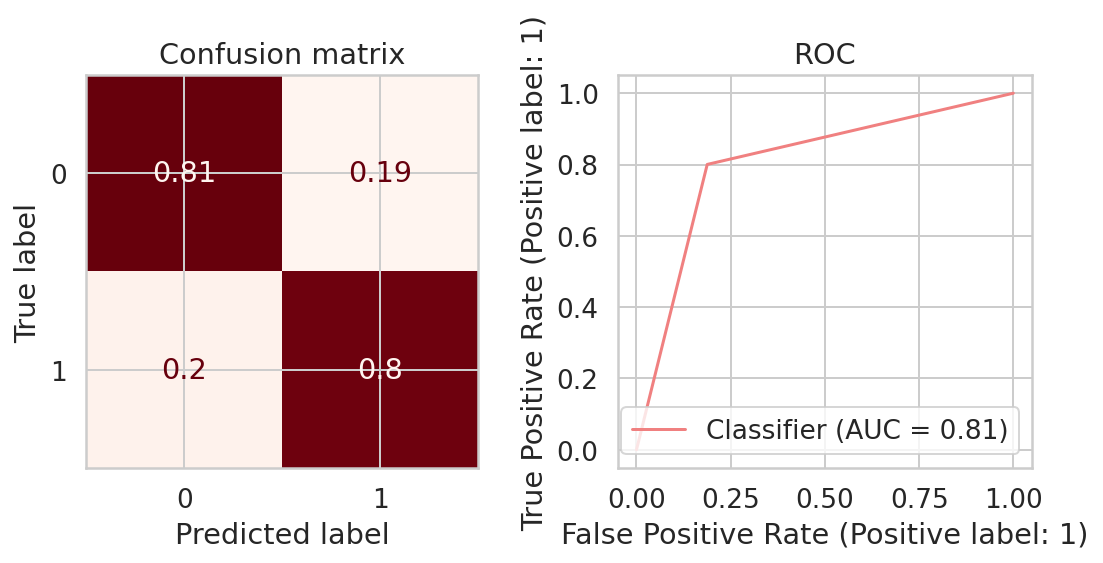

              precision    recall  f1-score   support

           0       0.80      0.81      0.81       863
           1       0.81      0.80      0.81       876

    accuracy                           0.81      1739
   macro avg       0.81      0.81      0.81      1739
weighted avg       0.81      0.81      0.81      1739



### Model `ride`

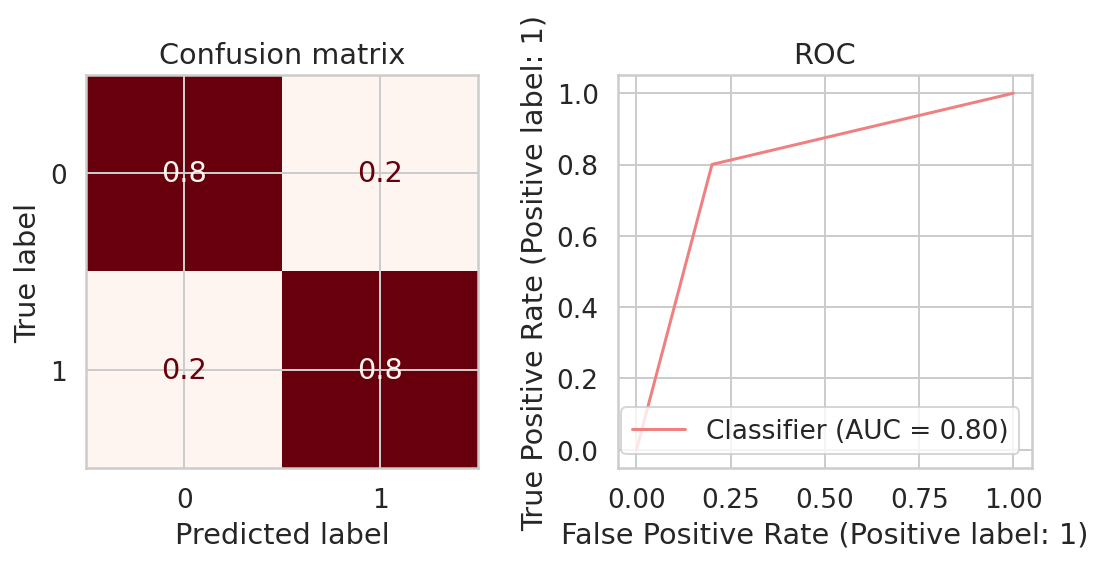

              precision    recall  f1-score   support

           0       0.80      0.80      0.80       863
           1       0.80      0.80      0.80       876

    accuracy                           0.80      1739
   macro avg       0.80      0.80      0.80      1739
weighted avg       0.80      0.80      0.80      1739



### Model `dt`

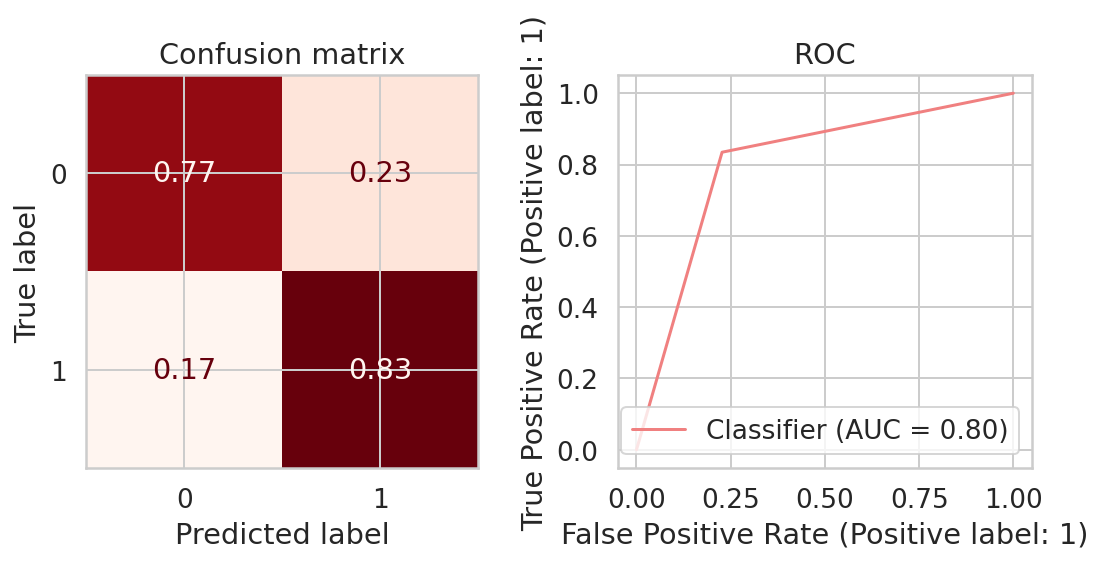

              precision    recall  f1-score   support

           0       0.82      0.77      0.80       863
           1       0.79      0.83      0.81       876

    accuracy                           0.80      1739
   macro avg       0.80      0.80      0.80      1739
weighted avg       0.80      0.80      0.80      1739



### Model `rf`

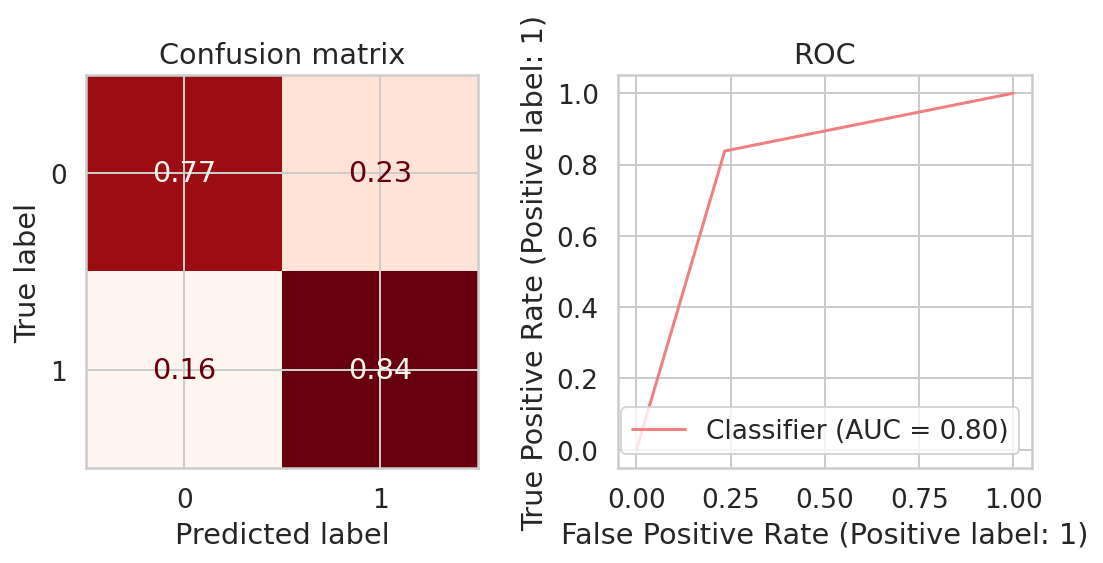

              precision    recall  f1-score   support

           0       0.82      0.77      0.79       863
           1       0.78      0.84      0.81       876

    accuracy                           0.80      1739
   macro avg       0.80      0.80      0.80      1739
weighted avg       0.80      0.80      0.80      1739



### Model `ada`

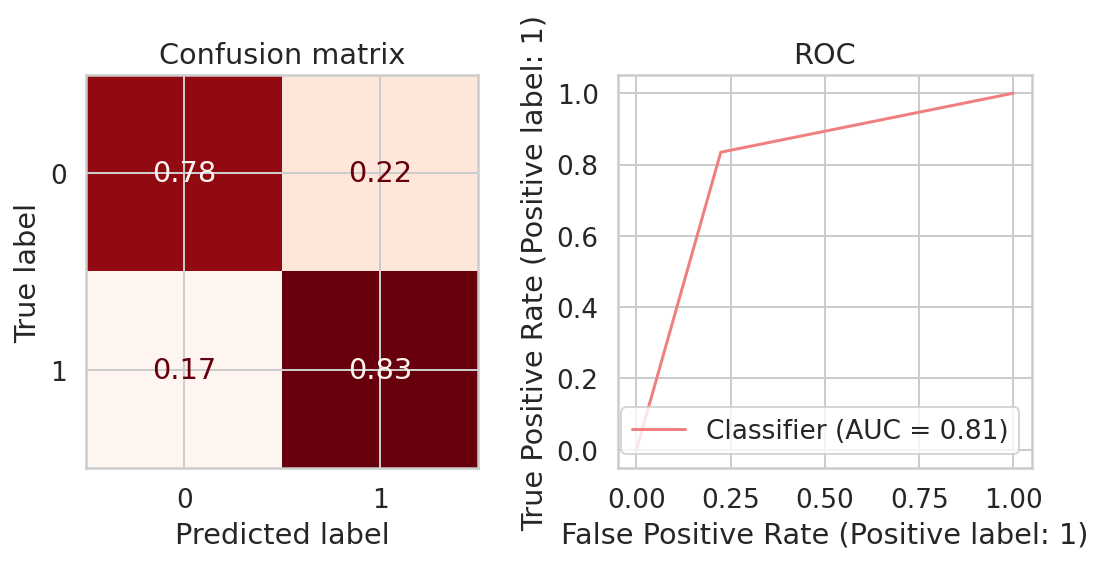

              precision    recall  f1-score   support

           0       0.82      0.78      0.80       863
           1       0.79      0.83      0.81       876

    accuracy                           0.81      1739
   macro avg       0.81      0.81      0.81      1739
weighted avg       0.81      0.81      0.81      1739



### Model `cat`

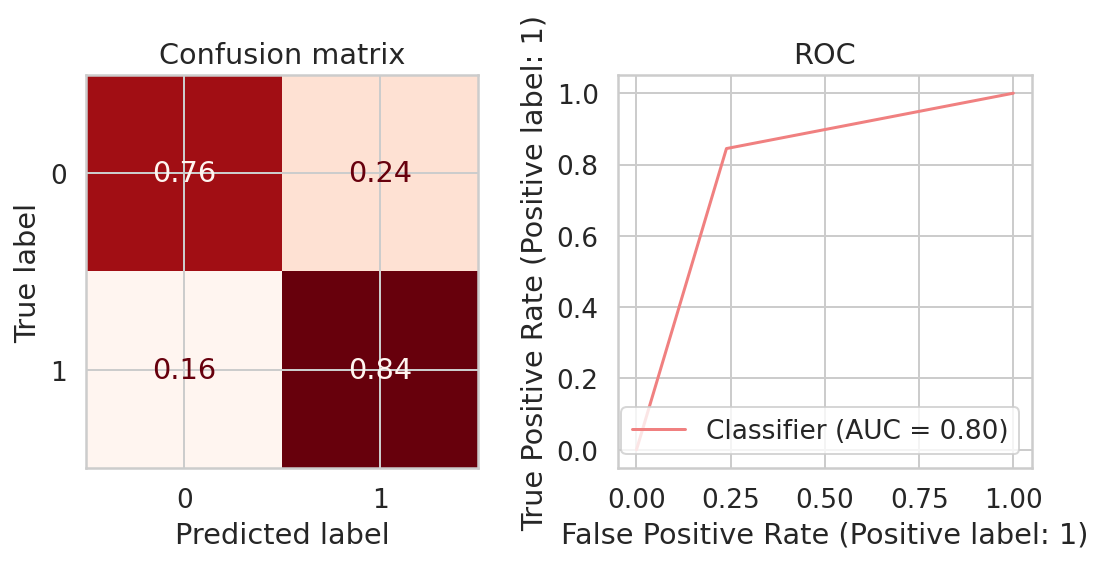

              precision    recall  f1-score   support

           0       0.83      0.76      0.79       863
           1       0.78      0.84      0.81       876

    accuracy                           0.80      1739
   macro avg       0.81      0.80      0.80      1739
weighted avg       0.81      0.80      0.80      1739



### Model `lgb`

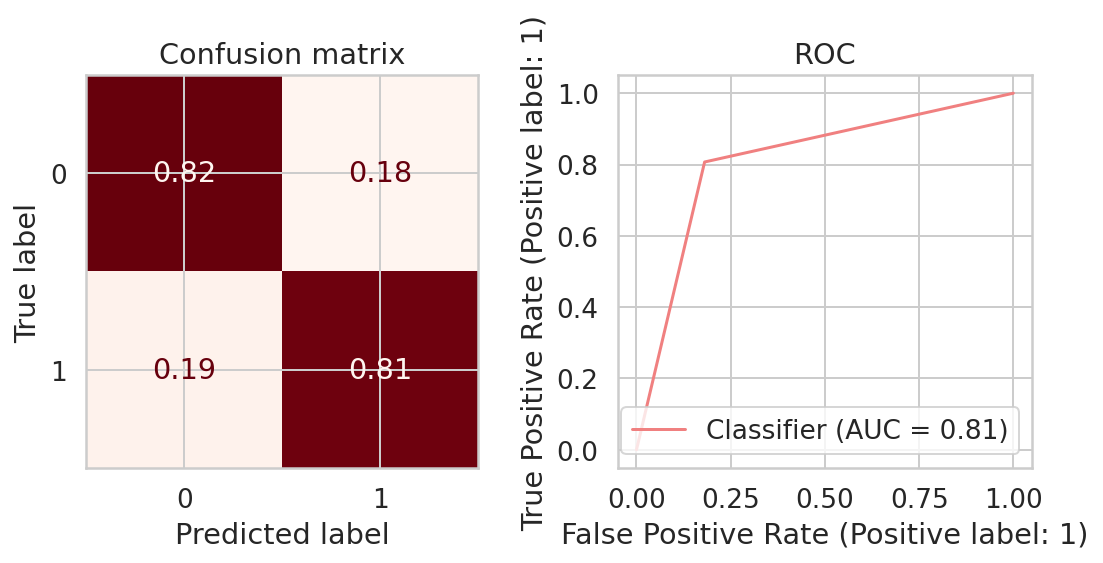

              precision    recall  f1-score   support

           0       0.81      0.82      0.81       863
           1       0.82      0.81      0.81       876

    accuracy                           0.81      1739
   macro avg       0.81      0.81      0.81      1739
weighted avg       0.81      0.81      0.81      1739



### Model `xgb`

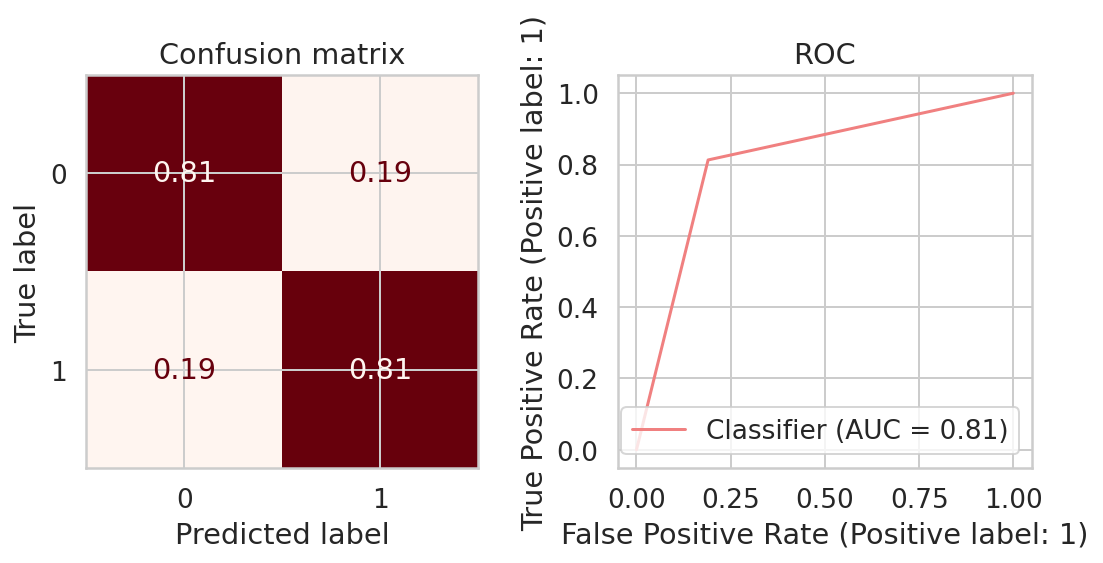

              precision    recall  f1-score   support

           0       0.81      0.81      0.81       863
           1       0.81      0.81      0.81       876

    accuracy                           0.81      1739
   macro avg       0.81      0.81      0.81      1739
weighted avg       0.81      0.81      0.81      1739



### Model `stack`

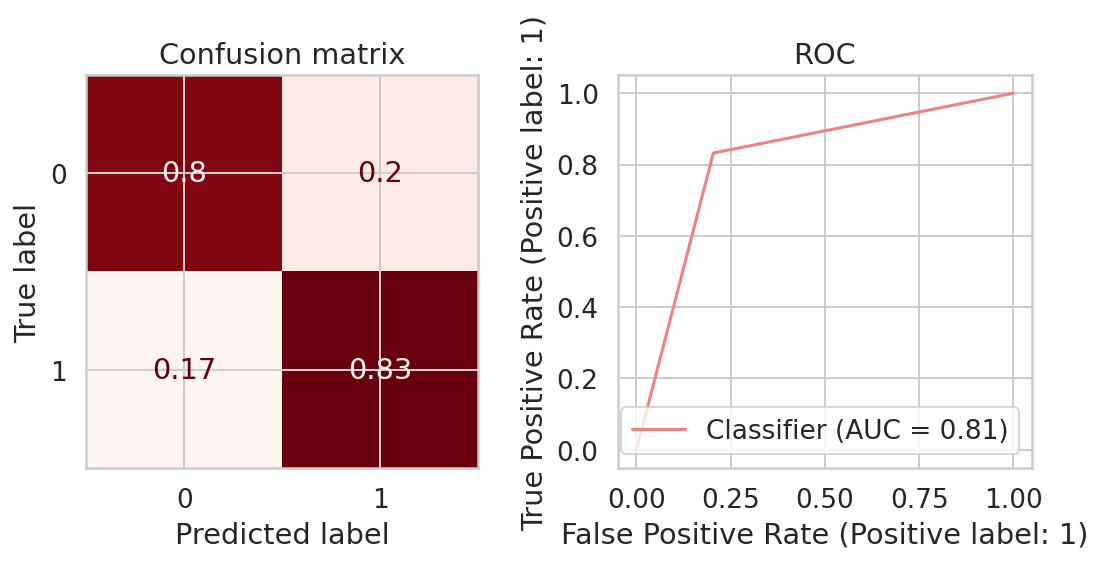

              precision    recall  f1-score   support

           0       0.82      0.80      0.81       863
           1       0.81      0.83      0.82       876

    accuracy                           0.81      1739
   macro avg       0.81      0.81      0.81      1739
weighted avg       0.81      0.81      0.81      1739



In [ ]:
for name, cls in classifiers.items():
    display(Markdown('### Model `{}`'.format(name)))
    
    models[name] = model = make_pipeline(
        preprocessor,
        classifiers[name]
    ).fit(X_train.copy(), y_train)

    y_pred = model.predict(X_val.copy())
    plot_model_result(y_pred, y_val)
    
    X_trans = preprocessor.fit_transform(X_train.copy())
    scores.loc[name] = cross_val_score(
        classifiers[name], 
        X_trans.copy(), y_train, cv=NUM_FOLDS)

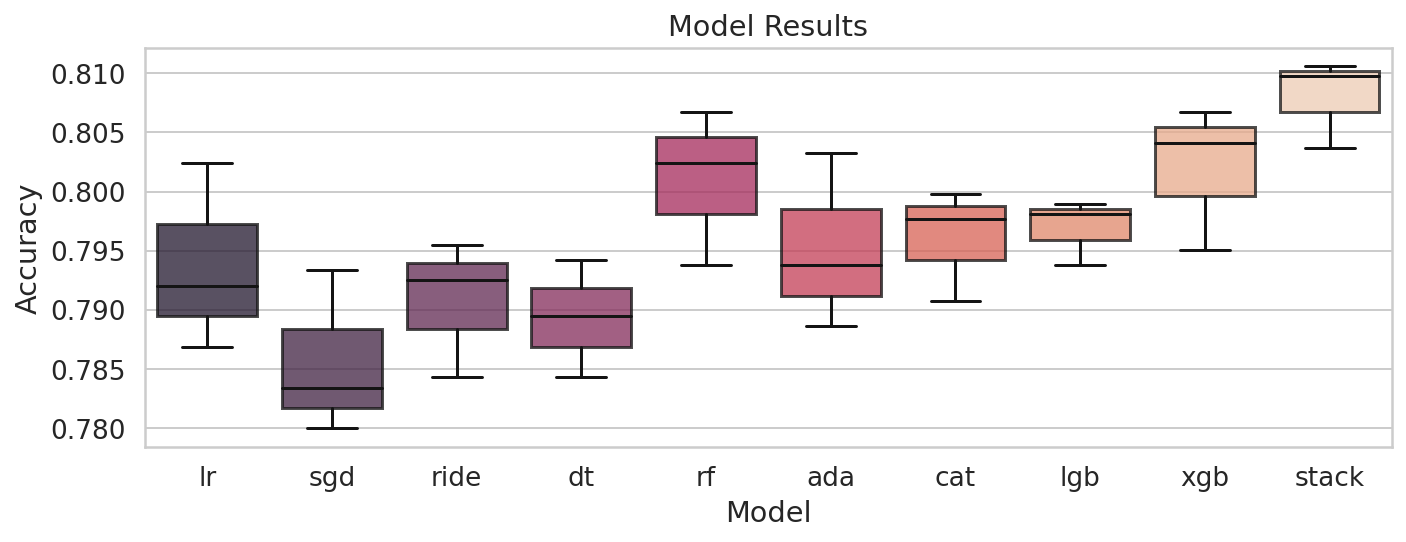

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))    
sns.boxplot(
    data=scores.T, 
    ax=ax,
    boxprops=dict(alpha=.75),
    palette='rocket')

ax.set_title(f'Model Results')
ax.set_xlabel('Model')
ax.set_ylabel('Accuracy')

plt.tight_layout()
plt.show()

In [ ]:
pd.DataFrame({
    'Model': scores.index,
    'Score': scores.mean(axis=1).round(2),
    'Std': scores.std(axis=1).round(2)
}).set_index('Model').sort_values(by='Score', ascending=False)

Score   Std
Model             
stack   0.81  0.00
rf      0.80  0.01
ada     0.80  0.01
cat     0.80  0.00
lgb     0.80  0.00
xgb     0.80  0.01
lr      0.79  0.01
sgd     0.79  0.01
ride    0.79  0.01
dt      0.79  0.00

In [ ]:
best_model = models[scores.mean(axis=1).idxmax()]
best_model.fit(X, y);

In [ ]:
y_pred_submission = best_model.predict(X_test).astype(bool)

In [ ]:
submission_data = pd.DataFrame({
    INDEX: X_test.index,
    TARGET: y_pred_submission,
}).set_index(INDEX)

submission_data

Transported
PassengerId             
0013_01             True
0018_01            False
0019_01             True
0021_01             True
0023_01             True
...                  ...
9266_02             True
9269_01            False
9271_01             True
9273_01             True
9277_01             True

[4277 rows x 1 columns]

In [ ]:
# save submission file
submission_data.to_csv(SUBMISSION_FILE)

## Trial 2

In [ ]:
y=df_train['Transported'].astype('bool').astype(int)
X=data[data.index.isin(df_train.index)].copy()
X_test=data[data.index.isin(df_test.index)].copy()

feature_engineering_pipeline = make_pipeline(
    log_transformer,
    drop_transformer,
    cyro_vip_transformer,
    convert_obj_transformer,
    
    
    

)
X = feature_engineering_pipeline.fit_transform(X)
X_test = feature_engineering_pipeline.transform(X_test)

print('Training set shape:', X.shape)
print('Test set shape:', X_test.shape)

Training set shape: (8693, 26)
Test set shape: (4277, 26)


In [ ]:
categorical = X.select_dtypes(include =['object', 'category']).columns.to_list()
categorical

['HomePlanet', 'Destination', 'CabinDeck', 'CabinSide']

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(
            X, y, test_size=0.20, random_state=42,stratify=y)
print("The shape of validation data:{} and {} ".format(X_val.shape,y_val.shape))
print("The shape of training data:{} and {} ".format(X_train.shape,y_train.shape))
# Added the label temporariliy for EDA
#X_train['Transported'] = y_train

The shape of validation data:(1739, 26) and (1739,) 
The shape of training data:(6954, 26) and (6954,) 


In [ ]:
from catboost import CatBoostClassifier, Pool
train_dataset = Pool(X_train,y_train, cat_features=categorical)
val_dataset = Pool(X_val,y_val,cat_features=categorical)

In [ ]:
cb_clf = CatBoostClassifier(random_state=101,
                          n_estimators=10000,
                          loss_function='CrossEntropy',  
                          eval_metric="Accuracy",
                          task_type="CPU")

In [ ]:
cb_clf.fit(train_dataset,
    eval_set=[(X_val, y_val)],
    early_stopping_rounds=150,
    verbose=False)

Text(0.5, 1.0, 'Feature Importance')

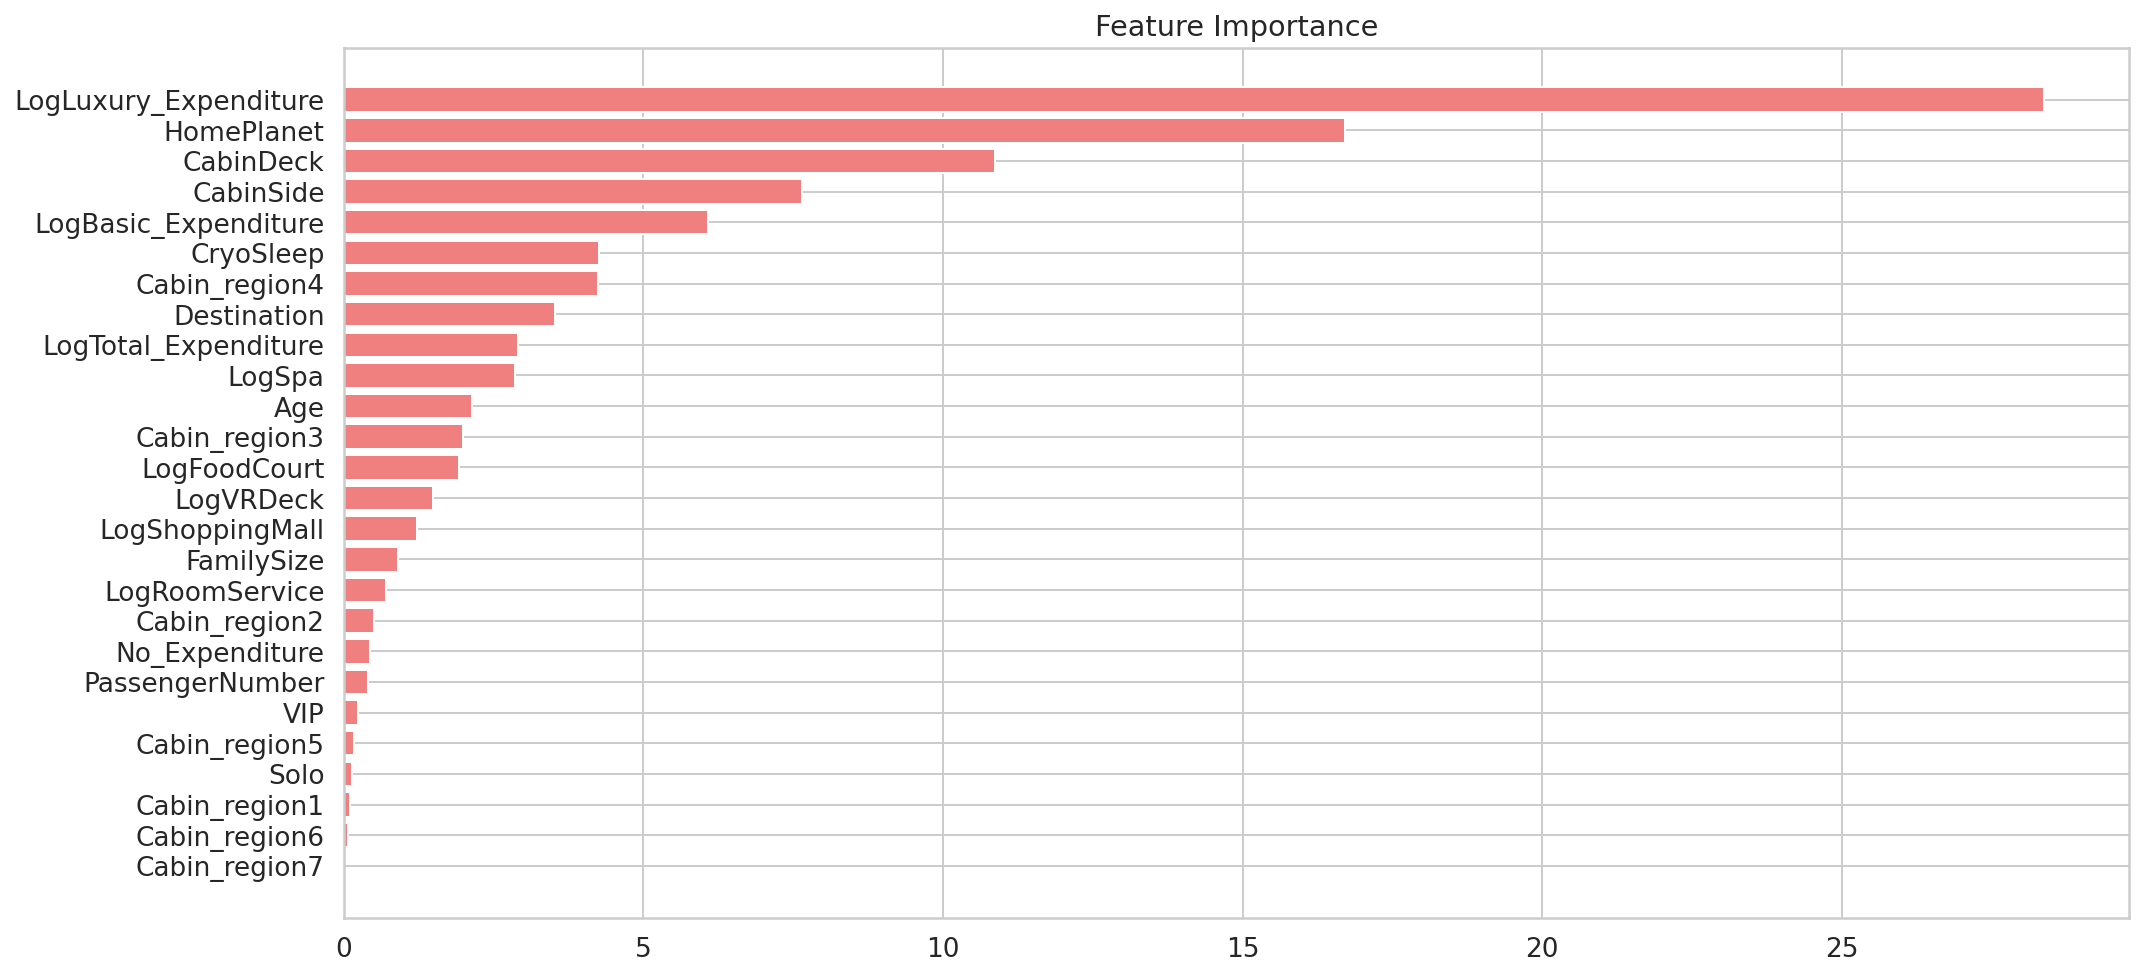

In [ ]:
feature_importance = cb_clf.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(16,8))
plt.barh(range(len(sorted_idx)),feature_importance[sorted_idx],align = 'center')
plt.yticks(range(len(sorted_idx)), np.array(X_val.columns)[sorted_idx])
plt.title('Feature Importance')




Text(0.5, 1.0, 'Permutation Importance')

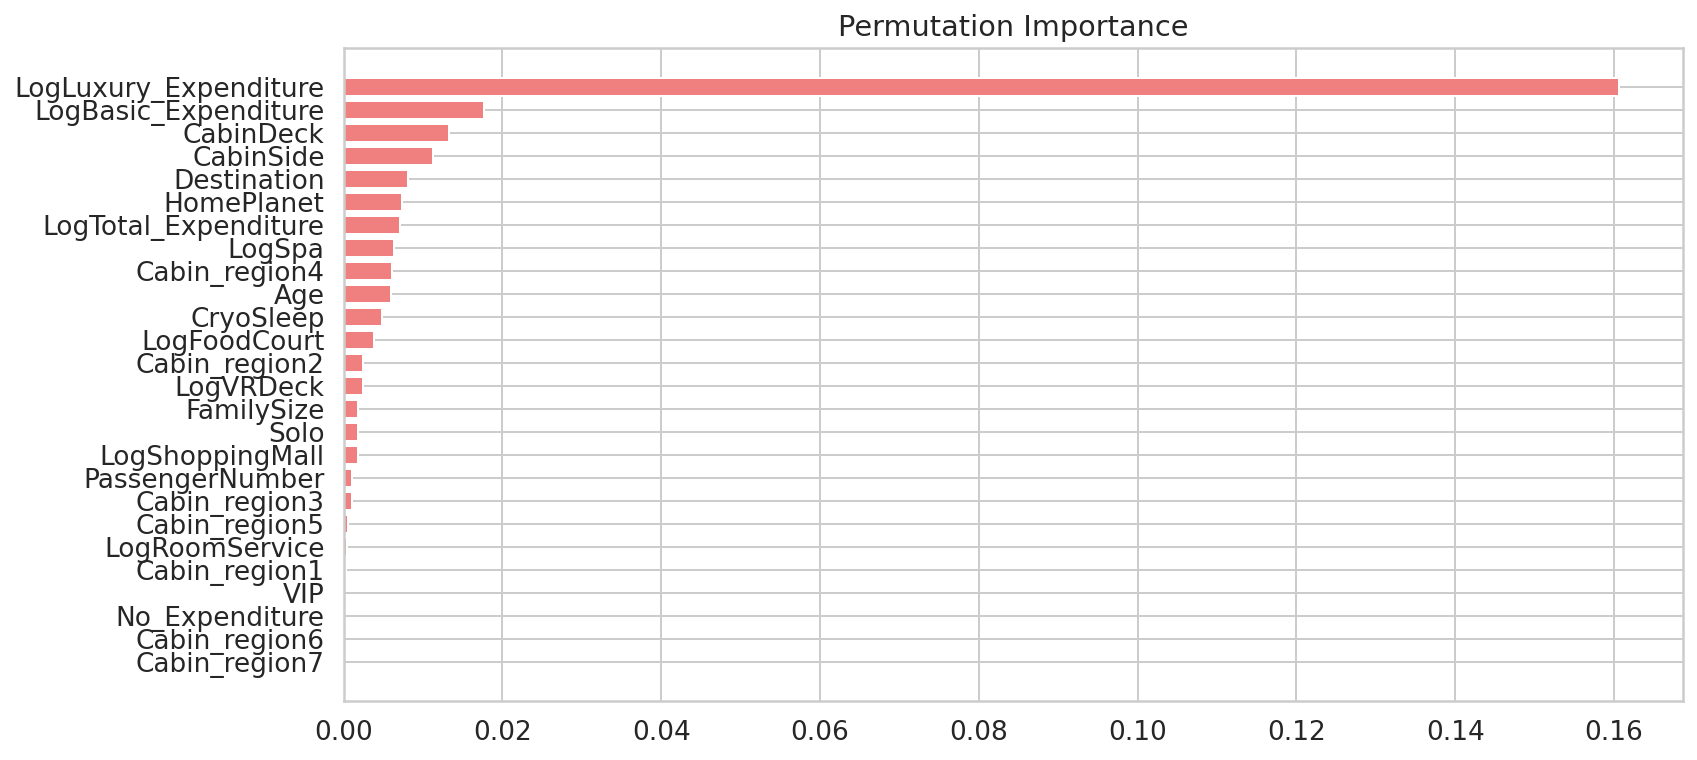

In [ ]:

perm_importance = permutation_importance(cb_clf, X_val, y_val, n_repeats=10, random_state=1066)
sorted_idx = perm_importance.importances_mean.argsort()
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), perm_importance.importances_mean[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_val.columns)[sorted_idx])
plt.title('Permutation Importance')


Text(0.5, 1.0, 'SHAP Importance')

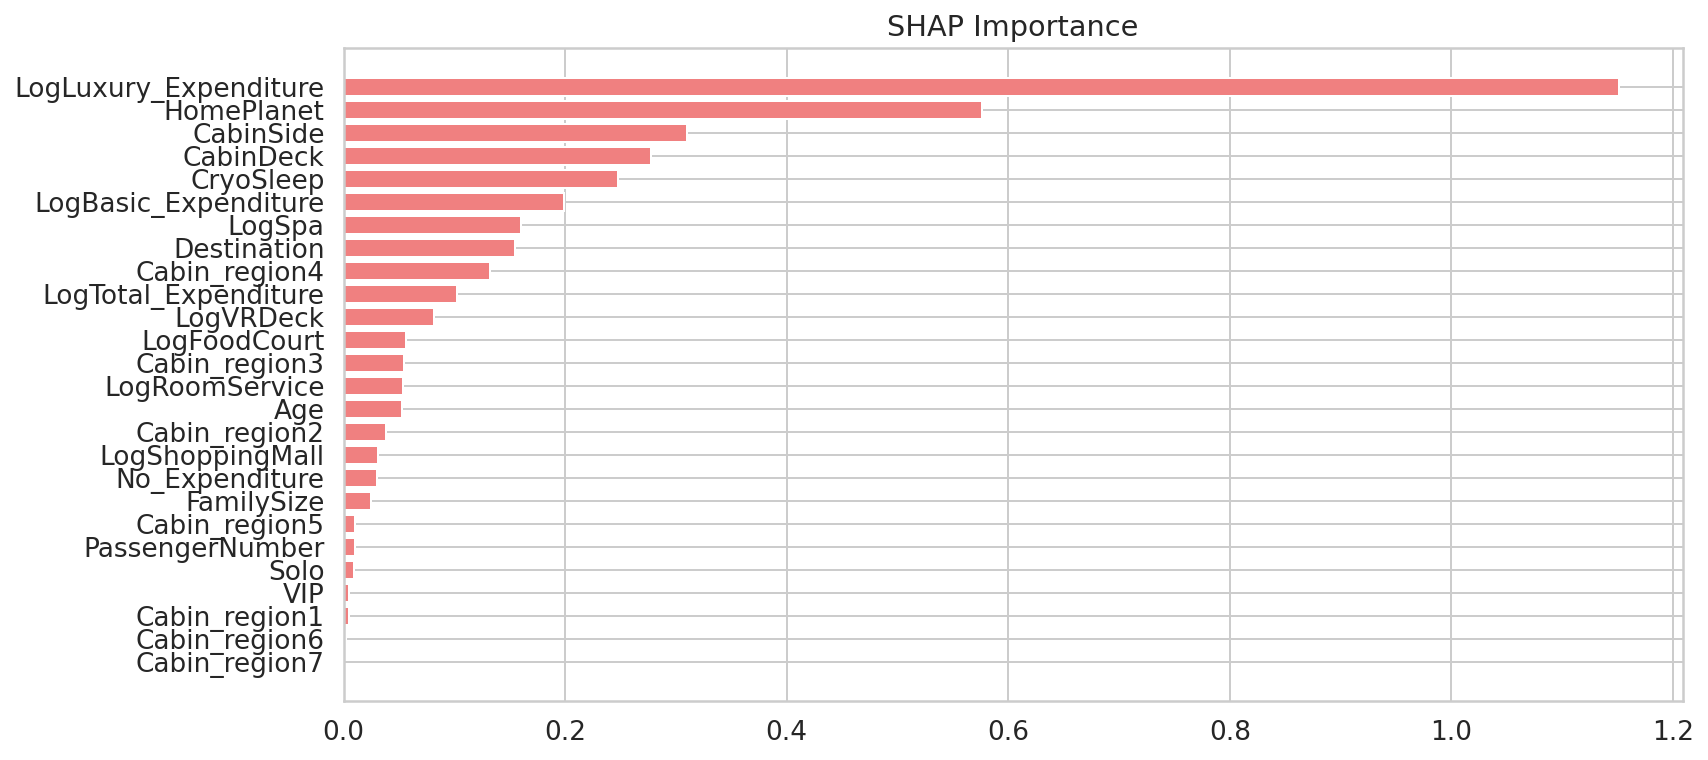

In [ ]:

explainer = shap.Explainer(cb_clf)
shap_values = explainer(X_val)
shap_importance = shap_values.abs.mean(0).values
sorted_idx = shap_importance.argsort()
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), shap_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('SHAP Importance')


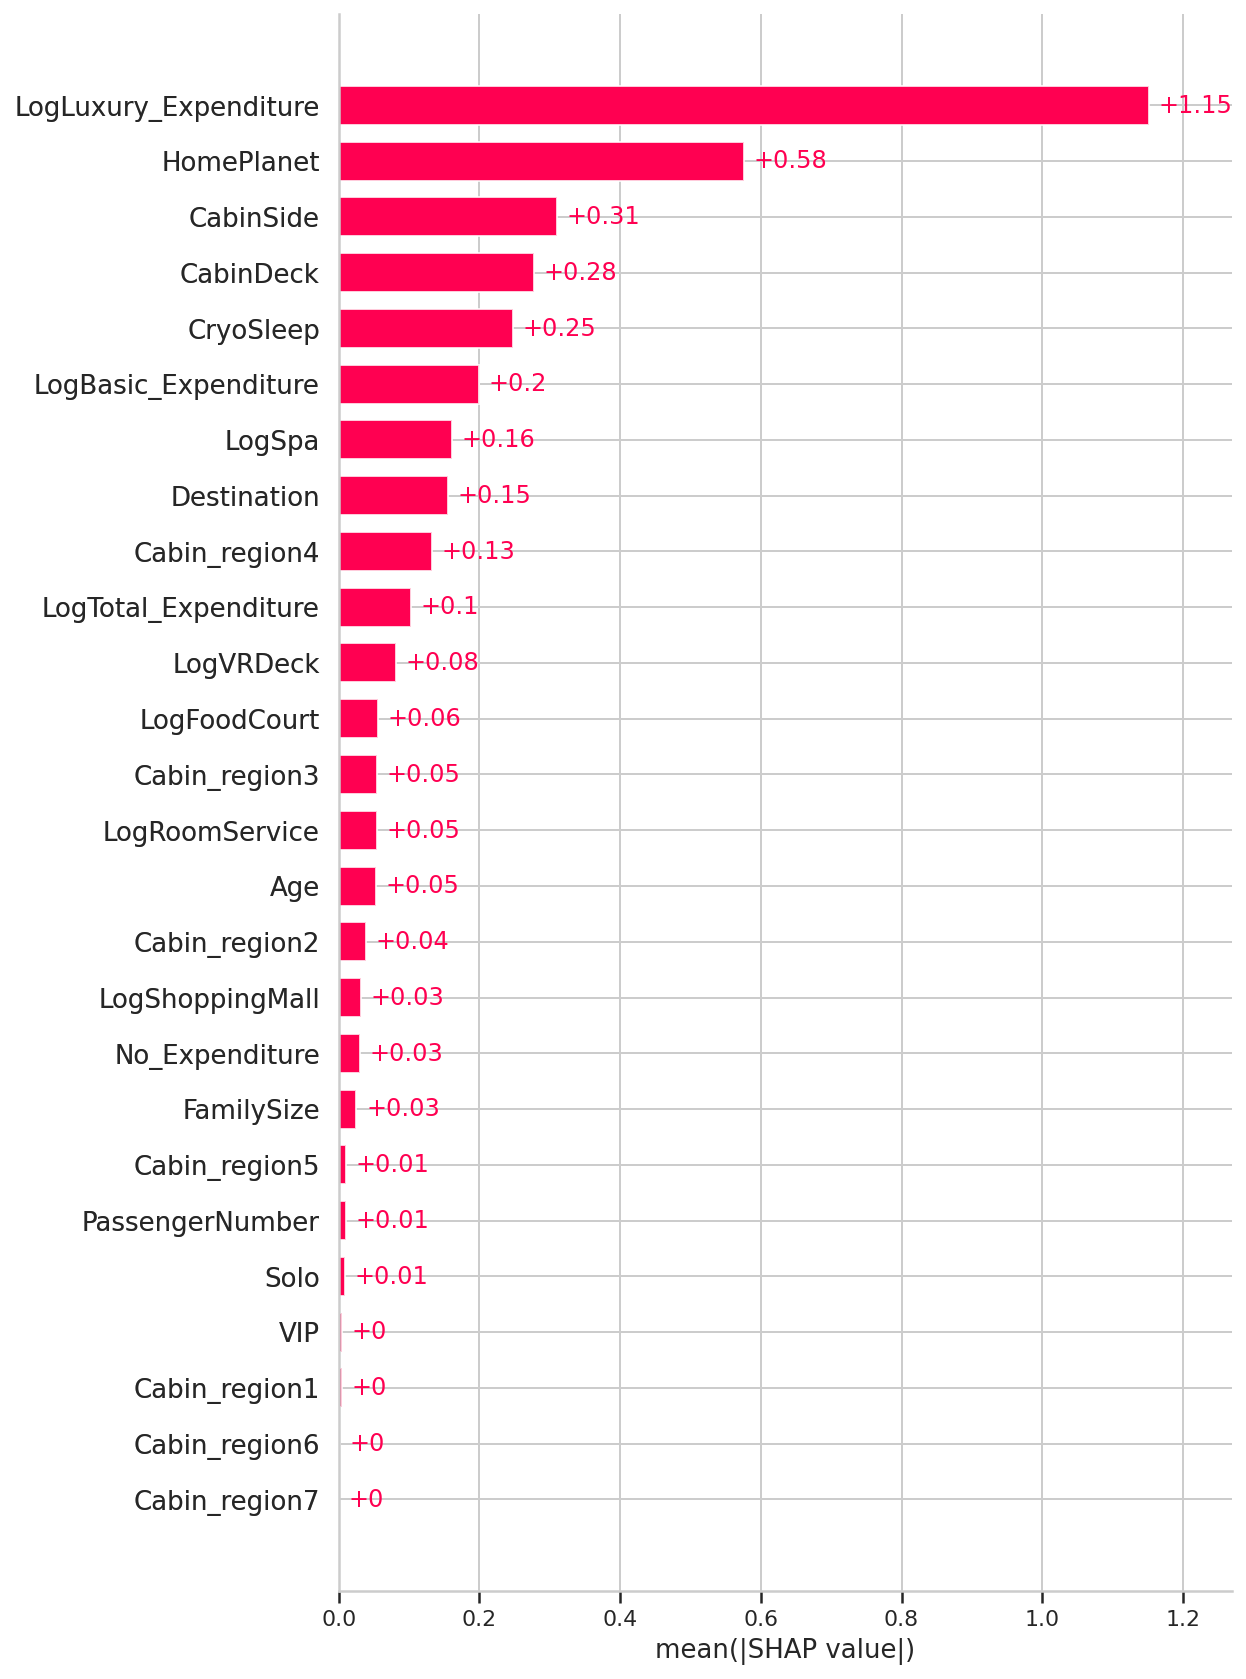

In [ ]:

shap.plots.bar(shap_values, max_display=X_test.shape[0])


In [ ]:
preds = cb_clf.predict(X_val)
preds

array([1, 1, 0, ..., 1, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score
cat_acc = accuracy_score(y_val, preds)
cat_acc

0.8148361127084531

In [ ]:
from catboost import Pool, CatBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold

N_SPLITS = 5
strat_kf = StratifiedKFold(n_splits=N_SPLITS, shuffle=True, random_state=101)

scores = np.empty(N_SPLITS)

for idx, (train_idx, val_idx) in enumerate(strat_kf.split(X, y)):
    
    print("=" * 12 + f" Training fold {idx} " + 12 * "=")

    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y[train_idx], y[val_idx]
    
    categorical = X_train.select_dtypes(include=['object', 'category']).columns.to_list()
    
    train_dataset = Pool(X_train,y_train, 
                         cat_features=categorical
                        )
    val_dataset = Pool(X_val,y_val,
                        cat_features=categorical
                       )

    cb_clf = CatBoostClassifier(random_state=101,
                          n_estimators=10000,
                          loss_function='CrossEntropy',  
                          eval_metric="Accuracy",
                          task_type="CPU")
    cb_clf.fit(train_dataset,
                eval_set=[(X_val, y_val)],
                early_stopping_rounds=150,
                verbose=False)
    
    preds = cb_clf.predict(X_val)
    loss = accuracy_score(y_val, preds)
    scores[idx] = loss
    print(f"Fold {idx} finished with score: {loss:.5f}.\n")
    
print(f"mean score: {scores.mean():.5f}.\n")

============ Training fold 0 ============
Fold 0 finished with score: 0.81426.

============ Training fold 1 ============
Fold 1 finished with score: 0.81484.

============ Training fold 2 ============
Fold 2 finished with score: 0.81541.

============ Training fold 3 ============
Fold 3 finished with score: 0.81818.

============ Training fold 4 ============
Fold 4 finished with score: 0.81588.

mean score: 0.81571.



In [ ]:
import shap
from catboost import CatBoostClassifier, Pool
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


class FSwithShap():

    def __init__(self, X, y):
        self.X = X
        self.y = y 
        self.acc = []

    def build_model(self, X, y):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
        # Identify the categorical features
        categorical_features = X_train.select_dtypes(exclude=[np.number]).columns.to_list()
        # Create training and test pools for catboost
        train_pool = Pool(X_train, y_train, categorical_features)
        test_pool = Pool(X_test, y_test, categorical_features)
        # Fit the model and calculate RMSE
        model = CatBoostClassifier(random_state=101,
                              n_estimators=10000,
                              loss_function='CrossEntropy',  
                              eval_metric="Accuracy",
                              task_type="CPU", verbose = False)
        
        model.fit(X_train, y_train, eval_set=test_pool, cat_features=categorical_features, use_best_model=True, early_stopping_rounds=100)
        cat_acc = accuracy_score(y_test, model.predict(X_test))
        return cat_acc, model, X_test

    def get_dropped_feature(self, model, X_test):
        explainer = shap.Explainer(model)
        shap_values = explainer(X_test)
        feature_importance = shap_values.abs.mean(0).values
        importance_df = pd.DataFrame({'features': X_test.columns,
                                      'importance': feature_importance})
        importance_df.sort_values(by='importance', ascending=False, inplace=True)
        return importance_df['features'].iloc[-1]
        
    def backward_selection(self, X, y, max_features=None):

        # get baseline RMSE
        select_df = X.copy()
        total_features = X.shape[1]
        cat_acc, model, X_test = self.build_model(select_df, y)
        self.acc.append(cat_acc)
        print(f"{cat_acc} with {select_df.shape[1]}")
        last_cat_acc = cat_acc
         
        # Drop least important feature and recalculate model peformance
        if max_features is None:
            max_features = total_features-1
            
        for num_features in range(total_features-1, 1, -1):
            dropped_feature = self.get_dropped_feature(model, X_test)
            tmp_df = select_df.drop(columns=[dropped_feature])

            cat_acc, model, X_test = self.build_model(tmp_df, y)
            print(f"{cat_acc} with {tmp_df.shape[1]}")
            if (num_features < max_features) and (cat_acc > last_cat_acc):
                return select_df
            if (cat_acc < 0.81387 * 0.99):
                break
            else:
                last_cat_acc = cat_acc
                select_df = tmp_df
        return select_df

In [ ]:
P = FSwithShap(X, y)
X_ = P.backward_selection(X, y)

0.824036802760207 with 26
0.8246118458884416 with 25
0.8246118458884416 with 24
0.824036802760207 with 23
0.8217366302472685 with 22
0.824036802760207 with 21


In [ ]:
col = X_.columns 
col

Index(['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'CabinDeck',
       'CabinSide', 'Cabin_region1', 'Cabin_region2', 'Cabin_region3',
       'Cabin_region4', 'Cabin_region5', 'PassengerNumber', 'FamilySize',
       'No_Expenditure', 'LogRoomService', 'LogFoodCourt', 'LogShoppingMall',
       'LogSpa', 'LogVRDeck', 'LogTotal_Expenditure', 'LogLuxury_Expenditure',
       'LogBasic_Expenditure'],
      dtype='object')

In [ ]:
X_

HomePlanet  CryoSleep    Destination   Age CabinDeck CabinSide  \
PassengerId                                                                  
0001_01         Europa          0    TRAPPIST-1e  39.0         B         P   
0002_01          Earth          0    TRAPPIST-1e  24.0         F         S   
0003_01         Europa          0    TRAPPIST-1e  58.0         A         S   
0003_02         Europa          0    TRAPPIST-1e  33.0         A         S   
0004_01          Earth          0    TRAPPIST-1e  16.0         F         S   
...                ...        ...            ...   ...       ...       ...   
9276_01         Europa          0    55 Cancri e  41.0         A         P   
9278_01          Earth          1  PSO J318.5-22  18.0         G         S   
9279_01          Earth          0    TRAPPIST-1e  26.0         G         S   
9280_01         Europa          0    55 Cancri e  32.0         E         S   
9280_02         Europa          0    TRAPPIST-1e  44.0         E         S   

             Cabin_region1  Cabin_region2  Cabin_region3  Cabin_region4  ...  \
PassengerId                                                              ...   
0001_01                  1              0              0              0  ...   
0002_01                  1              0              0              0  ...   
0003_01                  1              0              0              0  ...   
0003_02                  1              0              0              0  ...   
0004_01                  1              0              0              0  ...   
...                    ...            ...            ...            ...  ...   
9276_01                  1              0              0              0  ...   
9278_01                  0              0              0              0  ...   
9279_01                  0              0              0              0  ...   
9280_01                  0              0              1              0  ...   
9280_02                  0              0              1              0  ...   

             FamilySize  No_Expenditure  LogRoomService  LogFoodCourt  \
PassengerId                                                             
0001_01               4               1        0.000000      0.000000   
0002_01               4               0        4.700480      2.302585   
0003_01               7               0        3.784190      8.182280   
0003_02               7               0        0.000000      7.157735   
0004_01               9               0        5.717028      4.262680   
...                 ...             ...             ...           ...   
9276_01               3               0        0.000000      8.827615   
9278_01               5               1        0.000000      0.000000   
9279_01               8               0        0.000000      0.000000   
9280_01               7               0        0.000000      6.956545   
9280_02               7               0        4.844187      8.452975   

             LogShoppingMall    LogSpa  LogVRDeck  LogTotal_Expenditure  \
PassengerId                                                               
0001_01             0.000000  0.000000   0.000000              0.000000   
0002_01             3.258097  6.309918   3.806662              6.602588   
0003_01             0.000000  8.812248   3.912023              9.248021   
0003_02             5.918894  8.110728   5.267858              8.551981   
0004_01             5.023881  6.338594   1.098612              6.995766   
...                      ...       ...        ...                   ...   
9276_01             0.000000  7.404888   4.317488              9.052165   
9278_01             0.000000  0.000000   0.000000              0.000000   
9279_01             7.535297  0.693147   0.000000              7.535830   
9280_01             0.000000  5.869297   8.082093              8.442039   
9280_02             0.000000  0.000000   2.564949              8.481980   

             LogLuxury_Expendi

In [ ]:
!pip install optuna

In [ ]:
categorical

['HomePlanet', 'Destination', 'CabinDeck', 'CabinSide']

In [ ]:
import optuna


def cat_roc_objective(trial):
    param = {
      'max_leaves': trial.suggest_int('max_leaves', 20, 150),
      'max_depth': trial.suggest_int('max_depth', 5, 30),
      'learning_rate': trial.suggest_loguniform("learning_rate", 0.001, 0.1),
      'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 1, 30),
      'iterations': trial.suggest_int('n_estimators', 800, 5000)
    }

    fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=2202)
    cv_scores = []
    for train_idx, val_idx in fold.split(X_, y):
        X_tr, X_val = X_.iloc[train_idx], X_.iloc[val_idx]
        y_tr, y_val = y.iloc[train_idx], y.iloc[val_idx]
        
        categorical = X_tr.select_dtypes(include=['object', 'category']).columns.to_list()
        train_dataset = Pool(X_tr,y_tr, cat_features=categorical)
        test_dataset = Pool(X_val,y_val, cat_features=categorical)

        model = CatBoostClassifier(**param, grow_policy='Lossguide', task_type='CPU', random_state=42, silent=True)
        model.fit(train_dataset, eval_set=[(X_val, y_val)], early_stopping_rounds=50, verbose=False)
        y_pred_proba = model.predict(X_val)
        score = accuracy_score(y_val, y_pred_proba)

        cv_scores.append(score)

    return np.mean(cv_scores)

cat_roc_study = optuna.create_study(direction='maximize', sampler=optuna.samplers.TPESampler(seed=42))
cat_roc_study.optimize(cat_roc_objective, n_trials=20)

cat_roc_best = cat_roc_study.best_trial
cat_roc_best_params = cat_roc_best.params
print('score: {0}, params: {1}'.format(cat_roc_best.value, cat_roc_best_params))


[I 2022-09-29 14:34:28,350] A new study created in memory with name: no-name-badc8638-8ccb-4d3c-aec6-f749d4e54e98
[I 2022-09-29 14:35:05,266] Trial 0 finished with value: 0.8156006752290083 and parameters: {'max_leaves': 69, 'max_depth': 29, 'learning_rate': 0.029106359131330698, 'min_data_in_leaf': 18, 'n_estimators': 1455}. Best is trial 0 with value: 0.8156006752290083.
[I 2022-09-29 14:35:21,774] Trial 1 finished with value: 0.8120346137582872 and parameters: {'max_leaves': 40, 'max_depth': 6, 'learning_rate': 0.05399484409787434, 'min_data_in_leaf': 19, 'n_estimators': 3774}. Best is trial 0 with value: 0.8156006752290083.
[I 2022-09-29 14:35:45,462] Trial 2 finished with value: 0.8152555831790952 and parameters: {'max_leaves': 22, 'max_depth': 30, 'learning_rate': 0.04622589001020832, 'min_data_in_leaf': 7, 'n_estimators': 1563}. Best is trial 0 with value: 0.8156006752290083.
[I 2022-09-29 14:37:00,695] Trial 3 finished with value: 0.8159456349329768 and parameters: {'max_leaves

score: 0.8159456349329768, params: {'max_leaves': 44, 'max_depth': 12, 'learning_rate': 0.01120760621186057, 'min_data_in_leaf': 13, 'n_estimators': 2023}


In [ ]:
cat_roc_best_params

{'max_leaves': 44,
 'max_depth': 12,
 'learning_rate': 0.01120760621186057,
 'min_data_in_leaf': 13,
 'n_estimators': 2023}

In [ ]:
N_SPLITS = 5
strat_kf = StratifiedKFold(n_splits=N_SPLITS, shuffle=True, random_state=101)

scores = np.empty(N_SPLITS)

for idx, (train_idx, val_idx) in enumerate(strat_kf.split(X_, y)):
    
    print("=" * 12 + f" Training fold {idx} " + 12 * "=")

    X_train, X_val = X_.iloc[train_idx], X_.iloc[val_idx]
    y_train, y_val = y[train_idx], y[val_idx]
    
    categorical = X_train.select_dtypes(include = ['object', 'category']).columns.to_list()
    
    train_dataset = Pool(X_train,y_train, 
                         cat_features=categorical
                        )
    val_dataset = Pool(X_val,y_val,
                        cat_features=categorical
                       )

    cb_clf = CatBoostClassifier(grow_policy='Lossguide', 
                               task_type='CPU', random_state=42, silent=True,
                                 **cat_roc_best_params)
    
    
    cb_clf.fit(train_dataset, eval_set=[(X_val, y_val)],
               early_stopping_rounds=50, verbose=False)
    
    
    preds = cb_clf.predict(X_val)
    loss = accuracy_score(y_val, preds)
    scores[idx] = loss
    print(f"Fold {idx} finished with score: {loss:.5f}.\n")
    
print(f"mean score: {scores.mean():.5f}.\n")

============ Training fold 0 ============
Fold 0 finished with score: 0.81311.

============ Training fold 1 ============
Fold 1 finished with score: 0.81196.

============ Training fold 2 ============
Fold 2 finished with score: 0.81254.

============ Training fold 3 ============
Fold 3 finished with score: 0.81991.

============ Training fold 4 ============
Fold 4 finished with score: 0.81473.

mean score: 0.81445.



In [ ]:
subb = pd.read_csv('data/sample_submission.csv')
subb

PassengerId  Transported
0        0013_01        False
1        0018_01        False
2        0019_01        False
3        0021_01        False
4        0023_01        False
...          ...          ...
4272     9266_02        False
4273     9269_01        False
4274     9271_01        False
4275     9273_01        False
4276     9277_01        False

[4277 rows x 2 columns]

In [ ]:
test = X_test[col]

In [ ]:
preds = cb_clf.predict(test)
preds

array([1, 0, 1, ..., 1, 1, 1])

In [ ]:
preds = preds.astype('bool')
preds

array([ True, False,  True, ...,  True,  True,  True])

In [ ]:
subb.Transported = preds
subb

PassengerId  Transported
0        0013_01         True
1        0018_01        False
2        0019_01         True
3        0021_01         True
4        0023_01        False
...          ...          ...
4272     9266_02         True
4273     9269_01        False
4274     9271_01         True
4275     9273_01         True
4276     9277_01         True

[4277 rows x 2 columns]

In [ ]:
subb.to_csv('subb_cat.csv', index = None)

In [ ]:
y_pred_submission = cb_clf.predict(X_test).astype(bool)

In [ ]:
submission_data = pd.DataFrame({
    INDEX: X_test.index,
    TARGET: y_pred_submission,
}).set_index(INDEX)

submission_data

Transported
PassengerId             
0002_01            False
0007_01            False
0008_02             True
0015_01            False
0017_01             True
...                  ...
9253_01             True
9254_01             True
9270_01             True
9272_02            False
9275_02             True

[1738 rows x 1 columns]

In [ ]:
# save submission file
submission_data.to_csv(SUBMISSION_FILE)

In [ ]:
data_train = data_X_train
data_train['Transported'] = y

In [ ]:
X.head()

HomePlanet  CryoSleep  Destination   Age  VIP CabinDeck CabinSide  \
PassengerId                                                                     
0001_01         Europa          0  TRAPPIST-1e  39.0    0         B         P   
0002_01          Earth          0  TRAPPIST-1e  24.0    0         F         S   
0003_01         Europa          0  TRAPPIST-1e  58.0    1         A         S   
0003_02         Europa          0  TRAPPIST-1e  33.0    0         A         S   
0004_01          Earth          0  TRAPPIST-1e  16.0    0         F         S   

             Cabin_region1  Cabin_region2  Cabin_region3  ...  FamilySize  \
PassengerId                                               ...               
0001_01                  1              0              0  ...           4   
0002_01                  1              0              0  ...           4   
0003_01                  1              0              0  ...           7   
0003_02                  1              0              0  ...           7   
0004_01                  1              0              0  ...           9   

             No_Expenditure  LogRoomService  LogFoodCourt  LogShoppingMall  \
PassengerId                                                                  
0001_01                   1        0.000000      0.000000         0.000000   
0002_01                   0        4.700480      2.302585         3.258097   
0003_01                   0        3.784190      8.182280         0.000000   
0003_02                   0        0.000000      7.157735         5.918894   
0004_01                   0        5.717028      4.262680         5.023881   

               LogSpa  LogVRDeck  LogTotal_Expenditure  LogLuxury_Expenditure  \
PassengerId                                                                     
0001_01      0.000000   0.000000              0.000000               0.000000   
0002_01      6.309918   3.806662              6.602588               6.555357   
0003_01      8.812248   3.912023              9.248021               8.825854   
0003_02      8.110728   5.267858              8.551981               8.167068   
0004_01      6.338594   1.098612              6.995766               6.769642   

             LogBasic_Expenditure  
PassengerId                        
0001_01                  0.000000  
0002_01                  3.555348  
0003_01                  8.182280  
0003_02                  7.411556  
0004_01                  5.402677  

[5 rows x 26 columns]

In [ ]:
X.columns.difference(X_.columns)

Index(['Cabin_region6', 'Cabin_region7', 'Solo', 'VIP'], dtype='object')

In [ ]:
y=df_train['Transported'].astype('bool').astype(int)
X=data[data.index.isin(df_train.index)].copy()

X_test=data[data.index.isin(df_test.index)].copy()

feature_engineering_pipeline = make_pipeline(
    log_transformer,
    drop_transformer,
    cyro_vip_transformer,
    convert_obj_transformer,
    

)
X = feature_engineering_pipeline.fit_transform(X)
X_test = feature_engineering_pipeline.transform(X_test)

print('Training set shape:', X.shape)
print('Test set shape:', X_test.shape)

Training set shape: (8693, 26)
Test set shape: (4277, 26)


In [ ]:
# Indentify numerical and categorical columns
categorical_cols = X.select_dtypes(include =['object', 'category']).columns.to_list()
numerical_cols = X.select_dtypes(exclude =['object', 'category']).columns.to_list()



# Scale numerical data to have mean=0 and variance=1
numerical_transformer = Pipeline(steps=[('scaler', StandardScaler())])

# One-hot encode categorical data
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(drop='if_binary', handle_unknown='error',sparse=False))])


ct = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)],
        remainder='passthrough')

# Apply preprocessing
X = ct.fit_transform(X)
X_test = ct.transform(X_test)

# Print new shape
print('Training set shape:', X.shape)
print('Test set shape:', X_test.shape)

# Train-validation split
X_train, X_valid, y_train, y_valid = train_test_split(X,y,stratify=y,train_size=0.8,test_size=0.2,random_state=0)

Training set shape: (8693, 39)
Test set shape: (4277, 39)


In [ ]:
# Classifiers
classifiers = {
    "LogisticRegression" : LogisticRegression(random_state=0),
    "KNN" : KNeighborsClassifier(),
    "SVC" : SVC(random_state=0, probability=True),
    "RandomForest" : RandomForestClassifier(random_state=0),
    "XGBoost" : XGBClassifier(random_state=0, use_label_encoder=False, eval_metric='logloss'), # XGBoost takes too long
    "LGBM" : LGBMClassifier(random_state=0),
    "CatBoost" : CatBoostClassifier(random_state=0, verbose=False),
    "NaiveBayes": GaussianNB()
}

# Grids for grid search
LR_grid = {'penalty': ['l1','l2'],
           'C': [0.25, 0.5, 0.75, 1, 1.25, 1.5],
           'max_iter': [50, 100, 150]}

KNN_grid = {'n_neighbors': [3, 5, 7, 9],
            'p': [1, 2]}

SVC_grid = {'C': [0.25, 0.5, 0.75, 1, 1.25, 1.5],
            'kernel': ['linear', 'rbf'],
            'gamma': ['scale', 'auto']}

RF_grid = {'n_estimators': [50, 100, 150, 200, 250, 300],
        'max_depth': [4, 6, 8, 10, 12]}

boosted_grid = {'n_estimators': [50, 100, 150, 200],
        'max_depth': [4, 8, 12],
        'learning_rate': [0.05, 0.1, 0.15]}

NB_grid={'var_smoothing': [1e-10, 1e-9, 1e-8, 1e-7]}

# Dictionary of all grids
grid = {
    "LogisticRegression" : LR_grid,
    "KNN" : KNN_grid,
    "SVC" : SVC_grid,
    "RandomForest" : RF_grid,
    "XGBoost" : boosted_grid,
    "LGBM" : boosted_grid,
    "CatBoost" : boosted_grid,
    "NaiveBayes": NB_grid
}

In [ ]:
#!pip install scikit-learn==1.0

In [ ]:
i=0
clf_best_params=classifiers.copy()
valid_scores=pd.DataFrame({'Classifer':classifiers.keys(), 'Validation accuracy': np.zeros(len(classifiers)), 'Training time': np.zeros(len(classifiers))})
for key, classifier in classifiers.items():
    start = time.time()
    clf = GridSearchCV(estimator=classifier, param_grid=grid[key], n_jobs=-1, cv=None)

    # Train and score
    clf.fit(X_train, y_train)
    valid_scores.iloc[i,1]=clf.score(X_valid, y_valid)

    # Save trained model
    clf_best_params[key]=clf.best_params_
    
    # Print iteration and training time
    stop = time.time()
    valid_scores.iloc[i,2]=np.round((stop - start)/60, 2)
    
    print('Model:', key)
    print('Training time (mins):', valid_scores.iloc[i,2])
    print('')
    i+=1




Model: LogisticRegression
Training time (mins): 0.02

Model: KNN
Training time (mins): 0.03

Model: SVC
Training time (mins): 1.35

Model: RandomForest
Training time (mins): 0.13

Model: XGBoost
Training time (mins): 0.34

Model: LGBM
Training time (mins): 0.06

Model: CatBoost
Training time (mins): 3.24

Model: NaiveBayes
Training time (mins): 0.02



In [ ]:
valid_scores

Classifer  Validation accuracy  Training time
0  LogisticRegression             0.792984           0.02
1                 KNN             0.760207           0.03
2                 SVC             0.797010           1.35
3        RandomForest             0.795860           0.13
4             XGBoost             0.809086           0.34
5                LGBM             0.807361           0.06
6            CatBoost             0.799885           3.24
7          NaiveBayes             0.751006           0.02

In [ ]:
# Show best parameters from grid search
clf_best_params

{'LogisticRegression': {'C': 0.5, 'max_iter': 50, 'penalty': 'l2'},
 'KNN': {'n_neighbors': 9, 'p': 1},
 'SVC': {'C': 1.5, 'gamma': 'auto', 'kernel': 'rbf'},
 'RandomForest': {'max_depth': 12, 'n_estimators': 100},
 'XGBoost': {'learning_rate': 0.15, 'max_depth': 4, 'n_estimators': 100},
 'LGBM': {'learning_rate': 0.05, 'max_depth': 8, 'n_estimators': 200},
 'CatBoost': {'learning_rate': 0.15, 'max_depth': 8, 'n_estimators': 100},
 'NaiveBayes': {'var_smoothing': 1e-07}}

In [ ]:
# Classifiers
best_classifiers = {
    "LGBM" : LGBMClassifier(**clf_best_params["LGBM"], random_state=0),
    "CatBoost" : CatBoostClassifier(**clf_best_params["CatBoost"], verbose=False, random_state=0),
}

In [ ]:
# Number of folds in cross validation
FOLDS=10

preds=np.zeros(len(X_test))
for key, classifier in best_classifiers.items():
    start = time.time()
    
    # 10-fold cross validation
    cv = StratifiedKFold(n_splits=FOLDS, shuffle=True, random_state=0)
    
    score=0
    for fold, (train_idx, val_idx) in enumerate(cv.split(X, y)):
        # Get training and validation sets
        X_train, X_valid = X[train_idx], X[val_idx]
        y_train, y_valid = y[train_idx], y[val_idx]

        # Train model
        clf = classifier
        clf.fit(X_train, y_train)

        # Make predictions and measure accuracy
        preds += clf.predict_proba(X_test)[:,1]
        score += clf.score(X_valid, y_valid)

    # Average accuracy    
    score=score/FOLDS
    
    # Stop timer
    stop = time.time()

    # Print accuracy and time
    print('Model:', key)
    print('Average validation accuracy:', np.round(100*score,2))
    print('Training time (mins):', np.round((stop - start)/60,2))
    print('')
    
# Ensemble predictions
preds=preds/(FOLDS*len(best_classifiers))

Model: LGBM
Average validation accuracy: 81.42
Training time (mins): 0.08

Model: CatBoost
Average validation accuracy: 80.92
Training time (mins): 0.14



Text(0.5, 0, 'Probability')

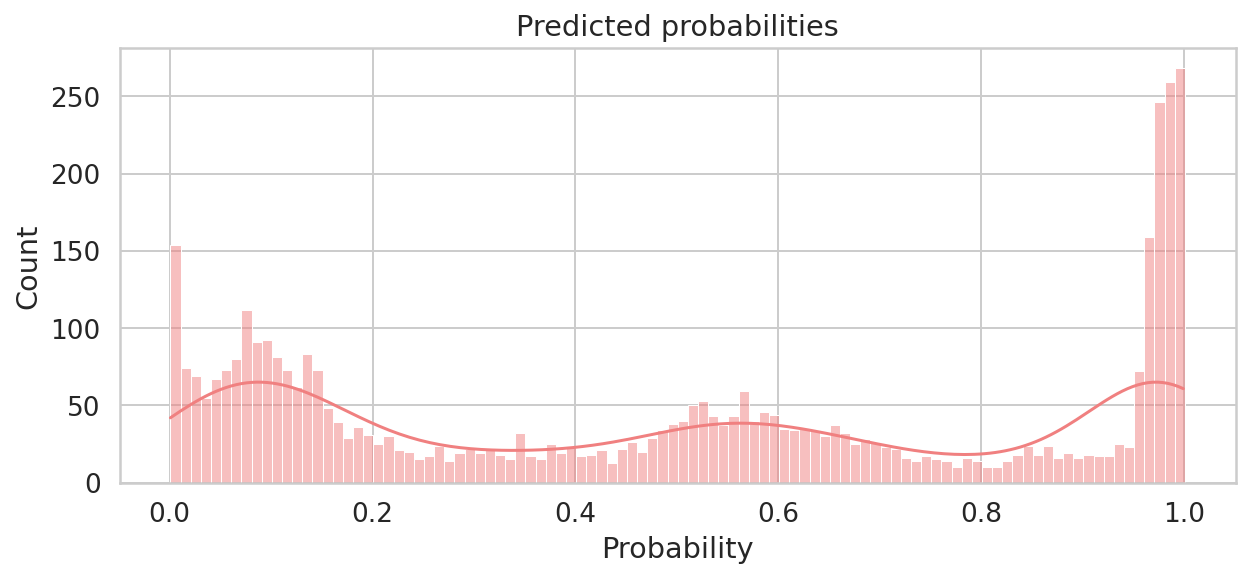

In [ ]:
plt.figure(figsize=(10,4))
sns.histplot(preds, binwidth=0.01, kde=True)
plt.title('Predicted probabilities')
plt.xlabel('Probability')

In [ ]:
# Proportion (in test set) we get from rounding
print(np.round(100*np.round(preds).sum()/len(preds),2))

51.62


Optimal threshold: 0.498


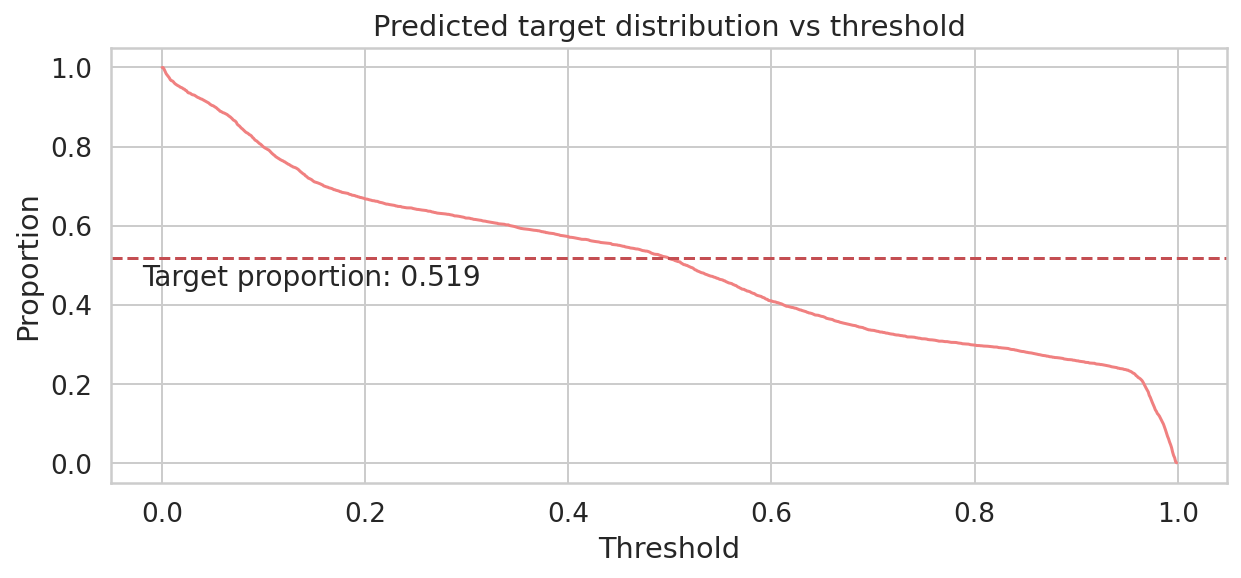

In [ ]:
# Proportion of predicted positive (transported) classes
def preds_prop(preds_arr, thresh):
    pred_classes=(preds_arr>=thresh).astype(int)
    return pred_classes.sum()/len(pred_classes)

# Plot proportions across a range of thresholds
def plot_preds_prop(preds_arr):
    # Array of thresholds
    T_array=np.arange(0,1,0.001)
    
    # Calculate proportions
    prop=np.zeros(len(T_array))
    for i, T in enumerate(T_array):
        prop[i]=preds_prop(preds_arr, T)
        
    # Plot proportions
    plt.figure(figsize=(10,4))
    plt.plot(T_array, prop)
    target_prop=0.519         # Experiment with this value
    plt.axhline(y=target_prop, color='r', linestyle='--')
    plt.text(-0.02,0.45,f'Target proportion: {target_prop}', fontsize=14)
    plt.title('Predicted target distribution vs threshold')
    plt.xlabel('Threshold')
    plt.ylabel('Proportion')
    
    # Find optimal threshold (the one that leads to the proportion being closest to target_prop)
    T_opt=T_array[np.abs(prop-target_prop).argmin()]
    print('Optimal threshold:', T_opt)
    return T_opt
    
T_opt=plot_preds_prop(preds)

In [ ]:
# Classify test set using optimal threshold
preds_tuned=(preds>=T_opt).astype(int)

Text(0.5, 1.0, 'Prediction distribution')

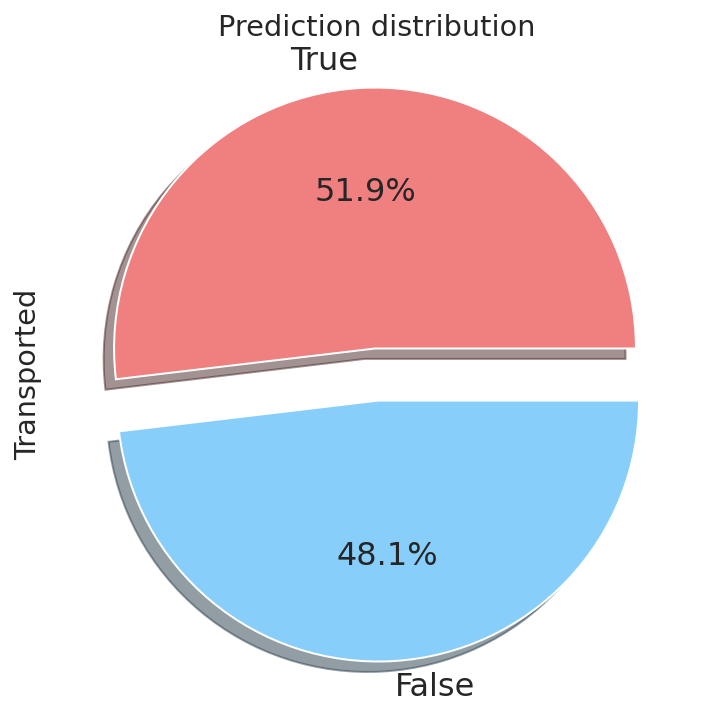

In [ ]:
# Sample submission (to get right format)
sub=pd.read_csv('data/sample_submission.csv')

# Add predictions
sub['Transported']=preds_tuned

# Replace 0 to False and 1 to True
sub=sub.replace({0:False, 1:True})

# Prediction distribution
plt.figure(figsize=(6,6))
sub['Transported'].value_counts().plot.pie(explode=[0.1,0.1], autopct='%1.1f%%', shadow=True, textprops={'fontsize':16}).set_title("Prediction distribution")

In [ ]:
# Output to csv
sub.to_csv('submissions/submission10.csv', index=False)

In [ ]:
model.estimator_, model.best_params_, model.best_score_, model.n_features_

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
# Build a forest and compute the feature importances
n_estimators = list(range(50, 250,5))
criterion=['gini','entropy']
param_grid = dict(n_estimators=n_estimators, criterion=criterion)

forest = ExtraTreesClassifier(random_state=0)
grid_etc = RandomizedSearchCV(forest, param_grid, cv=5, scoring="accuracy" ,return_train_score=False)
grid_etc.fit(X_train, y_train)
print("The best score: ",grid_etc.best_score_.round(4))
#Parameter setting that gave the best results on the hold out data.
print("The best parameter: ",grid_etc.best_params_)
grid_etc.best_estimator_

The best score:  0.8013
The best parameter:  {'n_estimators': 120, 'criterion': 'gini'}


ExtraTreesClassifier(n_estimators=120, random_state=0)

In [ ]:
etc_final = ExtraTreesClassifier(n_estimators=grid_etc.best_params_['n_estimators'],
                            criterion=grid_etc.best_params_['criterion'],random_state=0)
etc_final.fit(X_train, y_train)
etc_acc = etc_final.score(X_valid,y_valid)
print("The accuracy score of the ExtraTreesClassifier: ",round(etc_acc,2))
importances = etc_final.feature_importances_

The accuracy score of the ExtraTreesClassifier:  0.78


In [ ]:
importances = pd.DataFrame(etc_final.feature_importances_,index = data.columns,columns=['importance']).sort_values('importance',ascending=False)
    

ValueError: ignored

In [ ]:
np.argsort(importances)[::-1]

array([18,  0, 10, 17, 11, 19, 23, 15, 12, 16, 13,  8, 14, 20,  9, 21,  4,
       32, 34, 37, 33, 36,  1, 26,  2, 24,  3, 22,  5, 30, 25, 29,  6, 31,
       27, 28,  7, 38, 35])

In [ ]:
#Find Feature importance
etc_final = ExtraTreesClassifier(n_estimators=grid_etc.best_params_['n_estimators'],
                            criterion=grid_etc.best_params_['criterion'],random_state=0)
etc_final.fit(X_train, y_train)
etc_acc = etc_final.score(X_valid,y_valid)
print("The accuracy score of the ExtraTreesClassifier: ",round(etc_acc,2))
importances = etc_final.feature_importances_
indices = np.argsort(importances)[::-1]
getImportance(etc_final,X_train.columns,"The most important features from ExtraTrees Classifier")

The accuracy score of the ExtraTreesClassifier:  0.78


AttributeError: ignored

In [ ]:
feature_engineering_pipeline = make_pipeline(
    log_transformer,
    drop_transformer,
    object_category_transformer
  
)


In [ ]:
train = df_train.copy()
test = df_test.copy()

In [ ]:
data_train = df_train.copy()
data_test = df_test.copy()

In [ ]:
data.dtypes

HomePlanet              object
CryoSleep               object
Destination             object
Age                    float64
VIP                     object
RoomService            float64
FoodCourt              float64
ShoppingMall           float64
Spa                    float64
VRDeck                 float64
Name                    object
Transported               bool
CabinDeck               object
CabinNumber              Int64
CabinSide               object
Cabin_region1            Int32
Cabin_region2            Int32
Cabin_region3            Int32
Cabin_region4            Int32
Cabin_region5            Int32
Cabin_region6            Int32
Cabin_region7            Int32
PassengerGroup           int64
PassengerNumber          int64
GroupSize                int64
Solo                     int64
Firstname               object
Surname                 object
FamilySize             float64
Total_Expenditure      float64
No_Expenditure           int64
Luxury_Expenditure     float64
Basic_Ex

In [ ]:
data = object_to_categ(data)

In [ ]:
dtypes_transformer = FunctionTransformer(convert_dtypes)

In [ ]:
nums =['age', 
       'roomservice', 'foodcourt', 'shoppingmall', 'spa', 'vrdeck', 
       'spent_total', "group_size"]

cats_ohe = ['homeplanet', 'destination', 'cabin_deck', 'cabin_side']
cats_bool = ['cryosleep', "vip"]
all_cols = [*nums, *cats_ohe, *cats_bool]

X_df_train = df_train[all_cols]
y_df_train = df_train.transported.astype(int)
X_df_test = df_test[all_cols]

In [ ]:
classifiers = [
    DummyClassifier(),
    LogisticRegression(max_iter=1e4, n_jobs=-1),
    RidgeClassifier(max_iter=1e4),
    LinearDiscriminantAnalysis(),
    KNeighborsClassifier(n_jobs=-1),
    SVC(kernel="rbf"),
    RandomForestClassifier(n_jobs=-1),
    lgb.LGBMClassifier(n_jobs=-1)
]

In [ ]:
%%time
baseline_results = []
for clf in tqdm(classifiers):
    pipe = make_pipeline(create_preprocess(nums, cats_ohe, cats_bool), clf)
    score = np.mean(cross_val_score(pipe, 
                                    X_df_train, 
                                    y_df_train, 
                                    scoring="accuracy", 
                                    cv=5,
                                    n_jobs=-1,
                                   ))
    baseline_results.append((clf, np.round(score, 4)))

  0%|          | 0/8 [00:00<?, ?it/s]

CPU times: user 894 ms, sys: 839 ms, total: 1.73 s
Wall time: 14.9 s


In [ ]:
results = pd.DataFrame(baseline_results, columns=["clf", "accuracy"])
results.clf = results.clf.apply(lambda x: str(x).split("(")[0])
display(results.sort_values("accuracy", ascending=False).style.hide_index())

In [ ]:
clf = lgb.LGBMClassifier(n_jobs=-1)
pipe = make_pipeline(create_preprocess(nums, cats_ohe, cats_bool), clf)
_ = pipe.fit(X_df_train, y_df_train)

In [ ]:
def make_submission(pipe=pipe, file_name="submission07.csv"):
    labels = pipe.predict(X_df_test)
    labels = [True if x==1 else False for x in labels]
    submission = df[df.transported.isna()]["passengerid"].to_frame()
    submission["labels"] = labels
    submission.columns = ["PassengerId", "Transported"]
    submission.to_csv(file_name, index=False)

In [ ]:
make_submission(pipe)

In [ ]:
nums =['age', "group_size", "cabin_size",
       'roomservice', 'foodcourt', 'shoppingmall', 'spa', 'vrdeck', 
       "spent_total", ]

cats_ohe = ['homeplanet', 'destination', "cabin_deck", "cabin_side", "age_bins"]
cats_bool = ["cryosleep", "vip", "can_spend"]

all_cols = [*nums, *cats_ohe, *cats_bool]

X_df_train = df[df.transported.notna()][all_cols]
y_df_train = df[df.transported.notna()].transported.astype(int)
X_df_test = df[df.transported.isna()][all_cols]

In [ ]:
clf = lgb.LGBMClassifier(n_jobs=-1)
pipe = make_pipeline(create_preprocess(nums, cats_ohe, cats_bool), clf)

In [ ]:
clf = lgb.LGBMClassifier(num_leaves=24, n_estimators=395, learning_rate=0.015, n_jobs=-1)

pipe = make_pipeline(create_preprocess(nums, cats_ohe, cats_bool), clf)
print(f"{np.mean(cross_val_score(pipe, X_df_train, y_df_train)):.4f}")
_ = pipe.fit(X_df_train, y_df_train)

0.8044


In [ ]:
make_submission(pipe, file_name="submission08.csv")

In [ ]:
%%time
result = permutation_importance(pipe, 
                                X_df_train, y_df_train,
                                scoring="accuracy", 
                                n_repeats=10,
                                random_state=0)

In [ ]:
df_results = pd.DataFrame(result["importances_mean"])
df_results.columns = ["importance_mean"]
df_results.sort_values(by="importance_mean", ascending=True, inplace=True)
feature_labels = X_df_train.columns[df_results.index]

df_results.plot.barh(figsize=(12,8))
plt.yticks(ticks=range(0,len(df_results)), labels=feature_labels)
plt.title("Permutation importance of features", size=TITLE_SIZE, pad=TITLE_PAD)
plt.ylabel("Features, importance mean > 0.005")
plt.xlabel("Contribution of feature to accuracy")
plt.tight_layout()
plt.show()